# 2 - Activisim - EDA - R

In [2]:
library(DBI)
library(odbc)
#if(!require(mechkar)) {install.packages("mechkar");require(mechkar)}
library(dplyr)
if(!require(ggplot2)) {install.packages("ggplot2");require(ggplot2)}
if (!require("car")) install.packages("car")
if (!require("tibble")) install.packages("tibble")
if (!require("gridExtra")) install.packages("gridExtra")
if (!require("gtools")) install.packages("gtools")
if (!require("chron")) install.packages("chron")
if(!require(naniar)) {install.packages("naniar");require(naniar)}
if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
if(!require(mice)) {install.packages("mice");require(mice)}
if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}
if(!require(lubridate)) {install.packages("lubridate");require(lubridate)}


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.2"
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Loading required package: tibble

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: gtools


Attaching package: 'gtools'


The following object is masked from 'package:car':

    logit


Loading required package: chron

Loading required package: naniar

Warning message:
"package 'naniar' was built under R version 3.6.2"
Loading required package: mvoutl

In [3]:
con <- dbConnect(odbc(), 
                 Driver = "SQL Server", 
                 Server = "DESKTOP-AAGNMGA\\SQLEXPRESS", 
                 Database = "Activism", 
                 Trusted_Connection = "True")

In [4]:
df <- dbReadTable(con,"activist_holdings_v")
head(df)

,Investor.ID,Activist,ActivistHQ,ActivistRegion,Founded,FirstDateInvestedByActivisit,CurrentHolding,StatusCurrent,StatusExisted,DateExited,...,SeatsGained,SeatsGainedMethod,Ongoing,WithdrewDemands,PartiallySuccessful,Successful,Unsuccessful,CompromiseOrSettlement,Unresolved,Buyer
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,...,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,Aberdeen Asset Management PLC,UK,WestEurope,1983,2017-01-03,NA,1,0,NA,...,NA,N/A,No,No,No,No,Yes,No,No,NA
2,2,Aberdeen Asset Management PLC,UK,WestEurope,1983,2010-09-10,11,1,0,NA,...,NA,N/A,No,No,No,Yes,No,No,No,NA
3,2,Aberdeen Asset Management PLC,UK,WestEurope,1983,2015-09-17,NA,0,1,2016-10-10,...,NA,N/A,No,No,No,Yes,No,No,No,AB InBev
4,2,Aberdeen Asset Management PLC,UK,WestEurope,1983,2013-08-15,NA,1,0,NA,...,NA,NA,No,No,No,No,No,No,No,NA
5,14,AFL-CIO,US,NorthAmerica,1955,2013-03-25,NA,1,0,NA,...,NA,N/A,No,No,No,No,Yes,No,No,NA
6,14,AFL-CIO,US,NorthAmerica,1955,2016-02-23,NA,1,0,NA,...,NA,N/A,No,No,No,No,Yes,No,No,NA


In [250]:
#df %>% group_by(time_booked) %>% slice(which.min(time_booked))

In [198]:
summary(df)

  Investor.ID     Activist          ActivistHQ        ActivistRegion    
 Min.   : 449   Length:2184        Length:2184        Length:2184       
 1st Qu.:5155   Class :character   Class :character   Class :character  
 Median :5760   Mode  :character   Mode  :character   Mode  :character  
 Mean   :5383                                                           
 3rd Qu.:6118                                                           
 Max.   :8982                                                           
                                                                        
    Founded     FirstDateInvestedByActivisit CurrentHolding    StatusCurrent   
 Min.   :1975   Length:2184                  Min.   : 0.0000   Min.   :0.0000  
 1st Qu.:1992   Class :character             1st Qu.: 0.2275   1st Qu.:0.0000  
 Median :1999   Mode  :character             Median : 2.3600   Median :0.0000  
 Mean   :1998                                Mean   : 4.8012   Mean   :0.2271  
 3rd Qu.:2008   

In [252]:
##names(df)[names(df) == "Current.Holding...."] <- "Current.Holding"
##names(df)[names(df) == "X.ofInvByMC"] <- "NoOfInvByMC"

In [284]:
df$SeatsProposed <- as.numeric(df$SeatsProposed)
df$SeatsGained <- as.numeric(df$SeatsGained)
df$Investor.ID <- factor(df$Investor.ID)
df$FirstDateInvestedByActivisit <- as.Date(df$FirstDateInvestedByActivisit,"%Y-%m-%d")
df$DateExited <- as.Date(df$DateExited,"%Y-%m-%d")
df$LastInv <- as.Date(df$LastInv,"%Y-%m-%d")
df$ActivistAUMDate <- as.Date(df$ActivistAUMDate,"%Y-%m-%d")
df$ThirteenD <- as.Date(df$ThirteenD,"%Y-%m-%d")

for (i in 74:177 & 180:187){
    df[[i]] <- factor(df[[i]])
}

In [5]:
df <- df %>% filter (Investor.ID == 449  | Investor.ID == 1521 | Investor.ID == 1731 | Investor.ID == 4356 | 
                     Investor.ID == 4846 | Investor.ID == 4923 | Investor.ID == 5124 | Investor.ID == 5155 | 
                     Investor.ID == 5172 | Investor.ID == 5300 | Investor.ID == 5404 | Investor.ID == 5565 | 
                     Investor.ID == 5618 | Investor.ID == 5687 | Investor.ID == 5760 | Investor.ID == 5877 | 
                     Investor.ID == 5936 | Investor.ID == 5938 | Investor.ID == 6071 | Investor.ID == 6118 | 
                     Investor.ID == 6245 | Investor.ID == 6471 | Investor.ID == 6517 | Investor.ID == 6611 | 
                     Investor.ID == 6683 | Investor.ID == 7318 | Investor.ID == 7524 | Investor.ID == 7642 | 
                     Investor.ID == 7722 | Investor.ID == 8982)

In [6]:
summary(df)

  Investor.ID     Activist          ActivistHQ        ActivistRegion    
 Min.   : 449   Length:2184        Length:2184        Length:2184       
 1st Qu.:5155   Class :character   Class :character   Class :character  
 Median :5760   Mode  :character   Mode  :character   Mode  :character  
 Mean   :5383                                                           
 3rd Qu.:6118                                                           
 Max.   :8982                                                           
                                                                        
    Founded     FirstDateInvestedByActivisit CurrentHolding    StatusCurrent   
 Min.   :1975   Length:2184                  Min.   : 0.0000   Min.   :0.0000  
 1st Qu.:1992   Class :character             1st Qu.: 0.2275   1st Qu.:0.0000  
 Median :1999   Mode  :character             Median : 2.3600   Median :0.0000  
 Mean   :1998                                Mean   : 4.8012   Mean   :0.2271  
 3rd Qu.:2008   

## Removing variables with less than 2 levels

In [8]:
#l1 <- c()
#for (v in names(df)){
#    if (length(unique(df[[v]]))==1){
#        l1<- c(l1,v)
#    }
#}
#df <- df[ , !names(df) %in% l1]


# Exploratory data analysis

In [7]:
vn <- names(df[,2:188])
Activism_continuous <- NULL
for(v in vn) {
        if((is.numeric(df[[v]])) & length(unique(df[[v]]))>3)
            {Activism_continuous <- c(Activism_continuous,v)}}

length (Activism_continuous)
Activism_continuous

[1] 50

[1] "Founded"                       "CurrentHolding"               
 [3] "PID"                           "AH_PricePerShareLocal"        
 [5] "AH_PruchaseValueMnLocal"       "FR_PriceStart"                
 [7] "FR_PriceEnd"                   "PriceChangeSinceExitByCamp"   
 [9] "SPChangeSinceExitByCamp"       "AvgChangeOverPeriodOfInvByAct"
[11] "AvgReturnAnnualisedByAct"      "AvgSPReturnByAct"             
[13] "AvgSPReturnAnnualisedByAct"    "ExcessReturnByAct"            
[15] "ReturnByCamp"                  "ReturnAnnualisedByCamp"       
[17] "SPChangeByCamp"                "SPChangeAnnualisedByCamp"     
[19] "NoOfCamp"                      "PositiveReturnByCamp"         
[21] "ExcessReturnByCamp"            "HitRatioByAct"                
[23] "NoOfCamp3Y"                    "PositiveReturnByCamp3Y"       
[25] "HitRatioByAct3Y"               "CampByIND"                    
[27] "PositiveReturnByIND"           "HitRatioByIND"                
[29] "CampByIND3Y"                   "PositiveReturnByIND3Y"        
[31] "HitRatioByIND3Y"               "NoOfInvByIND"                 
[33] "AvgChangeOverPeriodOfInvByIND" "AvgReturnAnnualisedByIND"     
[35] "AvgSPReturnByIND"              "AvgSPReturnAnnualisedByIND"   
[37] "MarketCap"                     "CampByMC"                     
[39] "PositiveReturnByMC"            "HitRatioByMC"                 
[41] "CampByMC3Y"                    "PositiveReturnByMC3Y"         
[43] "HitRatioByMC3Y"                "NoOfInvByMC"                  
[45] "AvgChangeOverPeriodOfInvByMC"  "AvgAnnualisedReturnByMC"      
[47] "AvgSPReturnByMC"               "ActivistAUM"                  
[49] "SeatsProposed"                 "SeatsGained"

In [8]:

Activism_continuousV <- df %>% select (colnames = Activism_continuous)
colnames (Activism_continuousV)  <- Activism_continuous


In [9]:
Activism_continuousV = subset(Activism_continuousV,select = -c(AH_PruchaseValueMnLocal,AH_PricePerShareLocal))

In [10]:
Activism_continuousV = subset(Activism_continuousV, select = -c(PID) )

In [288]:
#Activism_continuousV <- setdiff(Activism_continuous,c("Investor.ID","PID","ActivistYaers"))
#Activism_continuousV
#length(Activism_continuousV)

#Activism_continuousV2 <- df[,c(5,7:12,14,20,29:38,42,46,48,50:60,164:165)]
#Activism_continuousV2 
#length(Activism_continuousV2)

#NOSHOW_continuousV2 <-names( df[,c(3:8,10:56)])

In [289]:
#library(devtools)  
#install_github("karpatit/mechkar")

In [17]:
############################################################################
#####   Package mechkar                                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-01                                       ####
############################################################################

############################################################################
#####   DATA VISUALIZATION                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2014-03-12                                       ####
############################################################################

###########  Functions   ##############################################

###################################################

exploreData <- function(data=data, y=NULL, rn=NULL, factorSize=10, dir=tempdir(), debug=FALSE, ...) {

  whatVarType <- function(var) {
    suppressWarnings(if (var=="integer" | var=="numeric") {
      return(1)
    } else if (var=="factor" | var=="character") {
      return(2)
    } else if (var=="Date" | "POSIXct" %in% var[[1]]) {
      return(3)
    } else {
      return(0)
    })
  }

  drawHistogram <- function(imgname=imgname, x=x) {
    d=stats::density(x, kernel = "gaussian",na.rm=TRUE)
    breakstar=(max(x,na.rm=TRUE) -min(x,na.rm=TRUE))/d$bw
    h=graphics::hist(x, breaks=breakstar)
    graphics::plot(h,main="",xlab=imgname)
    yfit<-seq(min(x,na.rm=TRUE),max(x,na.rm=TRUE),length=40)
    ffit<-stats::dnorm(yfit,mean=mean(x,na.rm=TRUE),sd=stats::sd(x,na.rm=TRUE))
    ffit <- ffit*diff(h$mids[1:2])*length(x)
    lines(yfit, ffit, col="blue", lwd=2)
  }

  drawFakeGraph <- function(imgname=imgname) {
    graphics::plot.window(xlim = c(0,0),ylim = c(0,0))
  }

  drawBars <- function(imgname=imgname, x=x) {
    graphics::plot(x)
  }

  drawGraphOne <- function(imgname=imgname, numVar=x, vartype=1) {
    if(vartype==1) {
      drawHistogram(imgname,numVar)
    } else if(vartype==2) {
      drawBars(imgname,numVar)
    } else {
      drawFakeGraph(imgname)
    }
  }

  getContinuousStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    me <- formatC(stats::median(x, na.rm=TRUE))
    q1 <- formatC(stats::quantile(x,1/4, na.rm=TRUE))
    q3 <- formatC(stats::quantile(x,3/4, na.rm=TRUE))
    mn <- formatC(min(x, na.rm=TRUE))
    mx <- formatC(max(x, na.rm=TRUE))
    html <- paste("<div class='Cell' style='align: top;'> <u>Data type</u>: Continuous <p> <u>Data length</u>: ",n ,"/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%)<p> <u>Mean</u>: ", formatC(ma), "\t <u>StdDev</u>: ", formatC(s), "<br><u>Median</u>: ",me,
                  "\t <u>IQR</u>: ", q1, "-", q3, "<br><u>Min</u>: ", mn, "\t <u>Max</u>: ", mx, "</div>")
    return(html)
  }

  getCategortyStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    l <- levels(x)
    s <- summary(x)
    htm <- "<ul>"
    if (length(l) < 5) {
      for (lv in l) {
        htm <- paste(htm, "<li><u>", lv, "</u>: ", s[[lv]], "</li>")
      }
      htm <- paste(htm,"</ul>")
    }
    html <- paste("<div class='Cell'> <u>Data type</u>: Categorical Data <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Number of levels</u>: ", length(l), "<br>", htm, "</div>")
    return(html)
  }

  getDatesStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    s <- summary(x)
    html <- paste("<div class='Cell'> <u>Data type</u>: Date <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Min date</u>: ", min(x, na.rm=TRUE), "<br><u>Max date</u>:",max(x, na.rm=TRUE) , "</div>")
    return(html)
  }

  getStats <- function(numVar=x, vartype=1) {
    if(vartype==1) {
      html <- getContinuousStats(numVar)
    } else if(vartype==2) {
      html <- getCategortyStats(numVar)
    } else if (vartype==3) {
      html <- getDatesStats(numVar)
    } else {
      html <- "<div class='Cell'></div>"
    }
    return(html)
  }

  getOutliers <- function(x) {
    bp <- graphics::boxplot(x,plot=FALSE)
    return(bp$out)
  }

  getOutlierGraph <- function(x) {
    #  mod <- tryCatch({
    outl <- getOutliers(x)
    df <- data.frame(x=x, cl=1)
    if(length(outl)>0) {
      df$cl[which(df$x %in% outl)] <- 2
    }
    #pl <- stats::scatter.smooth(df$x,col=df$cl)
    pl <- tryCatch({
      stats::scatter.smooth(df$x,col=df$cl,xlab="index")
    }, warning = function(w) {
      suppressWarnings(w)
      #n <- "warning!"
    }, error = function(e) {
      n <- "error!"
    }, finally = {
      graphics::plot(df$x ~ row.names(df),col=df$cl,xlab="index")
    })
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    graphics::abline(h=ma-(2*s), col="red", lty=2)
    graphics::abline(h=ma+(2*s), col="red", lty=2)
    #  }, error = function(e) {
    #    pl <- drawFakeGraph("none")
    #  })
    return(pl)
  }

  getScatterGraph <- function(df=data,x,y,dtype=1) {
    #  mod <- tryCatch({
    if(dtype==1) {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_smooth(ggplot2::aes(x=data[[x]], y=data[[y]]), method="loess") + ggplot2::xlab(x) + ggplot2::ylab(y)
    } else {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_boxplot(ggplot2::aes(y=data[[x]], color=data[[y]])) + ggplot2::xlab(x) + ggplot2::ylab(y) + ggplot2::labs(color=y)
    }
    return(pl)
  }

  getOutliersHtml <- function(imgname=imgname, x=x, srcdir=srcdir) {
    bp <- getOutliers(x)
    if (length(unique(bp)) > 10) {
      xtrm <- paste("There are ", length(unique(bp)), " outlier values")
    } else if (length(unique(bp)) == 0) {
      xtrm <- "No outlier values found"
    } else {
      xtrm <- paste(formatC(unique(bp)), collapse=', ' )
    }
    #imgsrc = paste(paste0(srcdir,"/fig/"),imgname, "_2.png",sep="")
    imgsrc = paste(paste0("fig/"),imgname, "_2.png",sep="")
    html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='250'><br> <u>Outlier values</u>: <br> ", xtrm, "</div>")
    return(html)
  }
  ################## Prepare for the report ###################
  #report <- paste(mydir,"/report",sep="")

  ################## Check for values for rn ##################
  if(!is.null(rn)) {
    if(length(rn)!=ncol(data)) {
      message("the value of the 'rn' argument was avoided because it does not have the same number of columns of the dataframe")
      rn <- NULL
    }
    xname <- rn
    names(xname) <- names(data)
  } else {
    xname <- NULL
  }

  report <- dir
  if (!file.exists(report)) {
    dir.create(report)
  }
  fig <- paste(report,"/fig",sep="")
  if (!file.exists(fig)) {
    dir.create(fig)
  }
  srcdir <- report

  # determine which columns are integer
  int_col <- which(sapply(data, is.integer))
  int_col <- c(int_col,(which(sapply(data, is.numeric))))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in int_col) {
    if (length(unique(data[,li])) < factorSize) {
      mi <- c(mi,li)
      if (is.factor(data[,li]) == FALSE) {
        data[,li] <- factor(data[,li])
      }
    }
  }

  str_col <- which(sapply(data, is.character))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in str_col) {
    mi <- c(mi,li)
    data[,li] <- factor(data[,li])
  }

  # create the html report page
  myhtml <- paste(report,"/report.html",sep="")
  cat("<!DOCTYPE html>
      <html>
      <head>
      <title>Data Visualization</title>
      <meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
      <link rel='stylesheet' href='http://code.jquery.com/mobile/1.4.5/jquery.mobile-1.4.5.min.css'>
      <script src='http://code.jquery.com/jquery-1.10.2.js'></script>
      <script>
      $(document).ready(function(){
      $('.onetoone').hide();
      });
      $(function() {
      $('.origimg').click(function(e) {
      $('#popup_img').attr('src',$(this).attr('src'));
      $('#myContainer').hide();
      var pos = $(document).scrollTop();
      $('#myContainer').css({'top':pos+20,'left':250, 'position':'absolute', 'border':'1px solid black', 'padding':'0px'});
      $('#myContainer').show();
      });
      $('#myContainer').click(function(e) {
      $('#myContainer').hide();
      });
      $('#myform2').submit(function(e) {
      e.preventDefault();
      });
      $('#onetoone').on('click',function() {
      console.log('onetone button - 1');
      $('#onetoone').hide();
      $('#aslist').show();
      // To show only individual rows:
      $('.Row').hide();
      $('.onetoone').show();
      // then we iterate
      var i = $('.Row').length;
      // Then we iterate
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('onetone button - 2');
      });
      $('#aslist').on('click',function() {
      console.log('aslist button - 1');
      $('#onetoone').show();
      $('#aslist').hide();
      $('.onetoone').hide();
      $('.Row').show();
      console.log('aslist button - 2');
      });
      $('#less').on('click',function(){
      console.log('less button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) - 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('less button - 2');
      });
      $('#more').on('click',function(){
      console.log('more button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) + 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('more button - 2');
      });
      $('#idx').on('change', function(){
      console.log('idx changed - 1');
      var i = $('.Row').length;
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('idx changed - 2');
      });
      });
      </script>
      <style type='text/css'>
      .Table
      {
      display: table;
      }
      .Title
      {
      display: table-caption;
      text-align: center;
      font-weight: bold;
      font-size: larger;
      background-color:#4C6F50;
      color: #fff;
      }
      .Row
      {
      display: table-row;
      }
      .Row:nth-child(even) {
        background-color: #56882433;
      }
      .Cell
      {
      display: table-cell;
      border: solid;
      border-width: thin;
      padding-left: 5px;
      padding-right: 5px;
      vertical-align: top;
      font-family: Arial, Helvetica, sans-serif;
      font-size: 14px;
      }
      </style>
      </head>
      <body>
      <div id='pageone' data-role='main' class='ui-content'>
      ", file = myhtml, sep='\n',append=FALSE)

  html <- paste("<p><p><h1> Data Visualization & Exploration </h1>
                <form>
                <input type='button' id='onetoone' value='Show as Cards'>
                <input type='button' id='aslist' class='onetoone' value='Show as List'>
                </form>
                <p>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # begin table
  alt1 <- ifelse(is.null(y)== TRUE, "", "<div class='Cell Title'> Dependent <br> Variable <br> Distribution </div>")
  html <- paste("<p><p>
                <div class='Table'>
                <div class='Row'>
                <div class='Cell Title'> Variable </div>
                <div class='Cell Title'> Distribution </div>
                <div class='Cell Title'> Descriptive <br> Statistics</div>
                <div class='Cell Title'> Outliers </div>"
                , alt1,
                "</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)

  #### determinate the type of each variable...
  data_types <- sapply(sapply(data, class), whatVarType)
  ln <- length(data)
  ii <- 0
  pb <- utils::txtProgressBar(min=0,max=ln,style=3)
  for(x in names(data)) {

    ## check if the value has at least more than one unique value...
    if(length(unique(data[[x]])) < 2) {
      message(paste("The variable",x,"has less than two unique values, so will not be included"))
    } else {

      if(debug==TRUE) {
        message(x)
      } else {
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)
      }

      html <- paste("<div class='Row'><div class='Cell'><b>",x,"</b><p>",xname[x],"</p></div>")

      cat(html, file = myhtml, sep='\n', append=TRUE)
      #### initialize the first graph
      imgname = paste(fig,"/",x, "_1.png",sep="")
      #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_1.png",sep="")
      imgsrc = paste("fig/",x, "_1.png",sep="")
      ### send the data with the type to generate the correct graph..
      grDevices::png(imgname)
      drawGraphOne(x, data[[x]], data_types[x])
      grDevices::dev.off()
      html <- paste0("<div class='Cell'><img class='origimg'  src='",imgsrc,"' height='150' width='150'><br></div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # second, show the statistics
      html <- getStats(data[[x]],data_types[x])
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # third, determine the outliers
      imgname = paste(fig,"/",x, "_2.png",sep="")
      if(data_types[x]==1) {
        grDevices::png(imgname)
        getOutlierGraph(data[[x]])
        grDevices::dev.off()
        html <- getOutliersHtml(x,data[[x]],srcdir)
      } else {
        html <- "<div class='Cell'></div>"
      }
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # fourth, if y is assigned, make a corresponding plot
      if(is.null(y)==FALSE) {
        imgname = paste(fig,"/",x, "_3.png",sep="")
        #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_3.png",sep="")
        imgsrc = paste("fig/",x, "_3.png",sep="")
        grDevices::png(imgname)
        ### scatter.smooth(data[[x]] ~ data[[y]])
        #suppressWarnings(getScatterGraph(data,x,y,data_types[y]))
        plot(getScatterGraph(data,x,y,data_types[y]))
        grDevices::dev.off()
        html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='150'><br></div>")
        cat(html, file = myhtml, sep='\n', append=TRUE)
      }
      html <- paste("</div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      }
    }
  }
  html <- paste("</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # end table
  html <- paste("</div>
                <div data-role='popup' id='myContainer' style='display: none;'>
                <img id='popup_img' src='' />
                </div>
                </div>
                </div>
                </div>
                <p>
                <div class='onetoone'>
                <form id='myform2'>
                <span> <input type='button' id='less' value=' << '> </span>
                <span> <input id='idx' name='idx' value='1'></input></span>
                <span> <input type='button' id='more' value=' >> '> </span>
                </form>
                </div>
                <p>
                </body></html>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  ## call the default browser or the one which is open (if any)
  browseURL(myhtml)
}

###################### END exploreData ###############



############################################################################
#####   TABLE 1                                                         ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-12-19                                       ####
############################################################################

####################  FUNCTIONS  ###########################################
#### Usage:
####   x: character vector with the name of the variables
####   y: the name of the strata variable (optional)
####   rn: character vector with the text we want to replace the variable names
####   data: the dataset to be used
####   miss: include missing statistics: [0=none, 1=only for categorical variables, 2=for all variables]
####   excel: export the table to excel [0=no, 1=yes]
####   excel_file: the name of the excel file we want to save the table (optional)
####
###################

Table1 <- function(x=NULL, y=NULL, rn=NULL, data=NULL, miss=3, catmiss=TRUE, formatted=TRUE, categorize=FALSE,
                    factorVars=NULL, maxcat=10, delzero=TRUE, decimals=1, messages=TRUE, excel=0, excel_file=NULL,
                    debug=FALSE) {
  ### define sub-functions
  Del <- NULL
  Pop <- NULL
  n <- NULL
  g1 <- function(var)c(Mean=mean(var,na.rm=TRUE), SD=stats::sd(var,na.rm=TRUE))
  g2 <- function(var)c(Median=stats::median(var,na.rm=TRUE), IQR=stats::quantile(var,c(0.25,0.75),na.rm=TRUE))
  msg <- NULL

  ### function for transforming variables to factors
  setFactors <- function(data=data, factorVars=factorVars, catmiss=catmiss, maxcat=maxcat) {
    if(is.null(factorVars)==TRUE) {
      aa <- sapply(sapply(data, unique), length)
      factorVars <- names(which(aa <= maxcat))
    }
    for (v in factorVars) {
      ct <- ifelse( ((is.null(factorVars)==FALSE & (v %in% factorVars)) | (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
      if (ct == 1) {
        data[[v]] <- factor(data[[v]])
        if(catmiss == TRUE & sum(is.na(data[[v]])==TRUE) > 0) {
          data[[v]] <- factor(data[[v]],levels=c(levels(data[[v]]),"Missing"))
          data[[v]][which(is.na(data[[v]])==TRUE)] <- "Missing"
        }
      }
    }
    return(data)
  }
  ### proceed to convert varibles to factors
  if (categorize == TRUE | is.null(factorVars)==FALSE ) {
    data <- setFactors(data, factorVars, catmiss, maxcat)
  }

  getSimpleTable  <- function(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,
                              categorize=categorize,maxcat=maxcat, delzero=delzero) {
    if (is.null(x)==TRUE) { x <- names(data)}
    if (is.null(rn)==TRUE) { rn <- x}
    ln <- length(x)
    pb <- utils::txtProgressBar(min=0,max=ln,style=3)
    msg <- NULL
    ### define the column names
    tableaaaa <- cbind(Del="Del",V1="Variables",V2="Categories",n="n","Population")
    tablebbbb <- cbind(Del="Del",V1="Variables",V2="Categories",n="n",val1="val1",val2="val2",val3="val3")
    tbl1 <- cbind(0,"Individuals","n",n=1, nrow(data))
    tbl2 <- cbind(0,"Individuals","n",n=1, nrow(data),NA,NA)
    tableaaaa <- rbind(tableaaaa,tbl1)
    tablebbbb <- rbind(tablebbbb,tbl2)
    q <- 1
    n <- 1
    ii <- 1
    for (v in x)
    {
      if (v %in% names(data)) {
        ### define if the actual variable has to be treated as numeric or factor
        ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE &
                       ((is.null(factorVars)==FALSE & (v %in% factorVars)) |
                          (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
        ### treat as numeric
        if (length(unique(data[v]))==0) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"has no data... avoided"))
          }
        } else if (inherits(data[[v]], "Date")==TRUE) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"is a date. Dates are not allowed in Table1... avoided"))
          }
        } else if (is.numeric(data[[v]])==TRUE & ct==0) {
          ## report mean and standard deviation
          t_n <- g1(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),")",sep="")
          tbl1 <- cbind(0,rn[q],"Mean (SD)",n=1, tp)
          tbl2 <- cbind(0,rn[q],"Mean (SD)",n=1,t_n[1],t_n[2],NA)
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report median and Interquartile ranges (25%,75%)
          t_n <- g2(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),"-", format(round(t_n[3],decimals),nsmall=1,big.mark=","), ")",sep="")
          tbl1 <- cbind(0,rn[q],"Median (IQR)",n=2, format(tp,big.mark=","))
          tbl2 <- cbind(0,rn[q],"Median (IQR)",n=2,t_n[1],t_n[2],t_n[3])
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report number and percent of missing
          if (miss >= 1) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=3, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=3, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=3, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=3, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        } else {
          t_n <- table(data[[v]])
          ttotal <- sum(t_n)
          nm <- row.names(t_n)
          for (f in 1:length(nm)) {
            del1 <- ifelse(length(nm)==2 & (nm[f]=="No" | nm[f]=="no" | nm[f]==0 | nm[f]=="0" | nm[f]=="None" | nm[f]=="none"),1,0)
            tp <- t_n[f] / ttotal * 100
            pct <- paste(format(round(t_n[f],decimals),nsmall=0,big.mark=",")," (", format(round(tp,decimals),nsmall=1,big.mark=","), "%)",sep="")
            tbl1 <- cbind(del1,rn[q],nm[f],n=f, pct)             ########### delete rows 0/1 !!!!!!!!!
            tbl2 <- cbind(del1,rn[q],nm[f],n=f, t_n[f], tp, NA)  ########### delete rows 0/1 !!!!!!!!!
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
          if (miss >= 2 & catmiss==FALSE ) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=f, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=f, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=f, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=f, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        }
      } else {
        if (messages==TRUE) {
          msg <- c(msg, paste("The variable",v,"doesn't exists in the dataset... avoiding"))
        }
      }
      q <- q + 1
      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      } else {
        message(v)
      }
    }
    if(formatted==TRUE) {
      return(tableaaaa)
    } else {
      return(tablebbbb)
    }
    close(pb)
  }

  pvals <- function(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat) {
    ptab <- NULL
    if (is.null(y)==FALSE) {
      if (y %in% names(data)) {
        if (is.null(x)==TRUE) { x <- names(data)}
        if (is.null(rn)==TRUE | length(rn)<2) {rn <- x}
        q <- 1
        ptab <- cbind(V="Variables",pval="pval", n="n")

        ln <- length(x)
        ii <- 0
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)

        for (v in x) {
          if (v %in% names(data)) {
            ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE & length(unique(data[[v]])) <= maxcat,1,0)
            if (is.numeric(data[[y]])==TRUE & categorize==TRUE & length(unique(data[[y]])) <= maxcat) {
              data[[y]] <- as.factor(data[[y]])
            } else if (is.numeric(data[[y]])==TRUE) {
              if (messages==TRUE) {
                msg <- c(msg, paste("The variable",y,"is not a factor. Please convert to factor or change the 'categorize' flag to TRUE."))
              }
              pval <- "Please rerun!!!"
            }
            if (is.numeric(data[[v]])==TRUE & length(unique(data[[v]])) > 1 & ct == 0) {
              ### first check for homoscedasticity
              tryCatch({
                if (stats::bartlett.test(data[[v]], data[[y]])[3] >= 0.05) {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]])))[1, 4]), 3))
                } else {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]]), white.adjust = TRUE))[1, 3]), 3))
                }
              }, warning = function(w) {
                suppressWarnings(w)
                #ww <- "suppress warnings..."
              }, error = function(e) {
                pval <- "---"
              })
            } else if (length(unique(data[[v]]))==1) {
              pval <- NA
            } else {
              if(length(unique(data[[v]])) < 15) {
                if (min(table(data[[v]],data[[y]])) > 5) {
                  pval <- round(as.numeric(stats::chisq.test(data[[v]],data[[y]])$p.val),3)
                } else {
                  if(min(table(data[[v]],data[[y]]))==0) {
                    #in cases where there are cells with zero, we use Fisher's exact test
                    tryCatch(
                      pval <- round(as.numeric(stats::fisher.test(data[[v]],data[[y]], workspace=1e9)$p.val),3),
                      error = function(e) {msg <- c(msg,paste0("Unable to calcualte the Fisher test for variables ",v," and ",y))})
                  } else {
                    pval <- round(as.numeric(stats::kruskal.test(data[[v]],data[[y]], workspace=1e9)$p.val),3)
                  }
                }
              } else {
                pval <- NA
              }
            }
            ptab <- rbind(ptab,cbind(V=rn[q],pval=pval,n=2))
          }
          if(debug==FALSE) {
            utils::setTxtProgressBar(pb,ii)
            ii <- ii + 1
          }
          q <- q + 1
        }
      }
    }
    return(ptab)
  }
  ####################### Begin analysis
  ##### check for x's witch have one unique values...get them out...
  vv <- NULL
  j <- 0
  jj <- NULL
  for(v in x) {
    if(length(unique(data[[v]])) < 2) {
      vv <- c(vv,v)
      j <- j + 1
      jj <- c(jj,j)
    }
  }
  warning(paste("The following variables have unique values and will not be included in the analysis:",vv))
  x <- setdiff(x, vv)
  if(is.null(rn)==FALSE & length(jj)>0) {
    rn <- rn[-jj]
  }

  ##### if y is null then make a simple table
  tabaaa1 <- getSimpleTable(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
  tabaaa1 <- tibble::as_tibble(tabaaa1)
  ############################  CHANGE TO 5 !!!!!!!!!!!!!!
  if(length(tabaaa1) > 5) {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop","pop2","pop3")
  } else {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop")
  }
  ##### if y has two levels, then make a compound comparison
  if (is.null(y)==FALSE){
    if (y %in% names(data)) {
      if (is.factor(data[[y]])==FALSE) {
        if (length(levels(factor(data[[y]]))) > 8) {
          if (messages==TRUE) {
            message("The dependent variable has more than 8 levels, table too large!")
          }
        } else if(min(table(data[[y]]))==0) {
          message("The dependent variable has one or more levels with no individuals assigned!")
        } else {
          data[[y]] <- factor(data[[y]])
        }
      }
      if (length(levels(data[[y]])) >= 2) {
        for (lv in levels(data[[y]])) {
          dtsub <- subset(data, data[[y]]==lv)
          tab <- getSimpleTable(x=x, rn=rn, data=dtsub, miss=miss, catmiss=catmiss, formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
          tab <- data.frame(tab)
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          if(length(tab) > 5) {
            names(tab) <- c("Del","V1","V2","n",paste0(lv,"_1"),paste0(lv,"_2"),paste0(lv,"_3"))
          } else {
            names(tab) <- c("Del","V1","V2","n",lv)
          }
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          tab[1,5] <- lv
          tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, tab))
        }
        # what to do with dichotomous variables? We remove the "Zero" label...
        # clean unnecesary rows
        if (delzero == TRUE) {
          tabaaa1 <- dplyr::filter(tabaaa1,Del==0)
        }
        ### calculate the p-value
        ptab <- data.frame(pvals(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat))
        names(ptab) <- c("V1","pval","n")
        tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, ptab))
        tabaaa1 <- dplyr::filter(tabaaa1,Pop != " -- ") #%>%
      }
    }
  }

  tabaaa1 <- dplyr::select(tabaaa1,-n)
  tabaaa1 <- dplyr::select(tabaaa1,-Del)

  ##### Join the tables...
  #Sys.setenv(JAVA_HOME="")
  if (excel==1) {
    #wb <- xlsx::createWorkbook()
    #sheet1 <- xlsx::createSheet(wb, sheetName="Table 1")
    #xlsx::addDataFrame(tabaaa1,sheet1)
    #### save and close the workbook
    #xlsx::saveWorkbook(wb, excel_file)
    writexl::write_xlsx(tabaaa1,excel_file)
    return(tabaaa1)
  } else {
    return(tabaaa1)
  }
}

########################## END Table1 ###############

############################################################################
#####   TEST & TRAIN DATASET GENERATION                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = FALSE)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message(" ")
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab = checkTrainTest(get(train_name),get(test_name))
    return(tab)
  }
}


######################### END train_test ###############


############################################################################
#####   TABLE 2                                                         ####
#####   Description: calculates the Odds/Hazard ratios and their        ####
#####     confidence intervals from a given model
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-04-16                                       ####
############################################################################

Table2 <- function(mod, rv=NULL,level=0.95, decimals=3) {
  alpha <- 1-level
  msm <- suppressMessages(summary(mod))
  if(rlang::has_name(msm,"coefficients")==TRUE) {
    msm <- msm$coefficients
  } else if(rlang::has_name(msm,"coef")==TRUE) {
    msm <- msm$coef
  }
  if("coxph" %in% class(mod)) {
    exp_coef <- msm[,1]
    dd <- suppressMessages(exp(stats::confint(mod, level=level)))
    dd1 <- round(dd[,1],decimals)
    dd2 <- round(dd[,2],decimals)
    p_value <- round(msm[,ncol(msm)],decimals)
  } else {
    ciz <- stats::qnorm(1-(alpha/2))
    exp_coef <- exp(msm[, 1])
    se_exp_coef <- msm[,2] * exp_coef
    dd1 <- round(exp_coef - ciz * se_exp_coef, decimals)
    dd2 <- round(exp_coef + ciz * se_exp_coef, decimals)
    exp_coef <- round(exp_coef, decimals)
    z<- abs((exp_coef-1)/se_exp_coef)
    p_value <- round(2*(1-stats::pnorm(z)), decimals)
  }
  tb <- data.frame(cbind(Estimate=exp_coef,'CI_lo'=dd1,'CI_hi'=dd2,'p value'=p_value))
  if (is.null(rv)==FALSE) {
    row.names(tb) <- rv
  }
  return(tb)
}

############################################################################
#####   TABLE2 WITH FORESTPLOT                                          ####
#####   Description: Generates a publication ready version of a model   ####
#####      risk table with a forestplot graph inside it                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2018-05-17                                       ####
############################################################################
Table2.forestplot <- function(mod, nr=NULL) {
  opar <- graphics::par(no.readonly = TRUE)
  on.exit(graphics::par(opar))
  tryCatch({tbA <- Table2(mod)},
           error=function(cond) {
             message("This model type is not supported !")
             return(NA)
           })
  if(exists("tbA")) {
    ## max value for x axis
    xmax <- max(tbA[,3])
    if(xmax < 5) {
      #axis(1, seq(0,xmax,by=.5), cex.axis=.5)
     rh <- 12
    } else {
      rh <- 18
    }
    colnames(tbA) <- c("coef","ci_low","ci_high","p_value")
    j <- nrow(tbA)
    nm <- row.names(tbA)
    rowseq <- seq(nrow(tbA),1)
    graphics::par(mai=c(1,0,0,0),new=FALSE)
    graphics::plot(tbA$coef, rowseq, pch=15,
         xlim=c(-10,rh), ylim=c(0,j+3),
         xlab='', ylab='', yaxt='n', xaxt='n',
         bty='n')
    for (i in 1:j) {
      graphics::abline(h=i-0.5,lwd=1, lty=3, col="gray")
    }
    graphics::par(new=TRUE)
    graphics::plot(tbA$coef, rowseq, pch=15,
         xlim=c(-10,rh), ylim=c(0,j+3),
         xlab='', ylab='', yaxt='n', xaxt='n',
         bty='n')
    graphics::axis(1, seq(0,xmax,by=.5), cex.axis=.5)
    graphics::segments(1,-1,1,j, lty=3)
    graphics::segments(tbA$ci_low, rowseq, tbA$ci_hi, rowseq)
    graphics::mtext('Lower risk',1, line=2.5, at=0, cex=.5, font=2)
    graphics::mtext('Higher risk',1.5, line=2.5, at=2, cex=.5, font=2)
    if (is.null(nr)) {
      nr <- data.frame(vars=names(mod$coefficients))
      col2 <- as.character(gsub(x=nr$vars, pattern=paste(names(mod$xlevels),collapse="|"),replacement=" "))
      col3 <- data.frame(vars=as.character(NULL),col3=as.character(NULL))
      for(n in names(mod$xlevels)) {
        col3 <- rbind(col3, cbind(vars=paste(n,levels(mod$data[[n]])[2],sep=""),col3=n))
      }
      nr$col1 <- ifelse(nr$vars %nin% setdiff(names(mod$coefficients),names(mod$data)),as.character(nr$vars),'')
      nr$col2 <- ifelse(nr$vars %nin% col2, col2, " ")
      nr[1,"col1"] <- ifelse(nr[1,"vars"]=="(Intercept)","(Intercept)",nr[1,"vars"])
      nr$col1 <- ifelse(nr$vars %in% col3, col3, nr$col1)
      suppressWarnings(suppressMessages(nr <- dplyr::left_join(nr,col3)))
      nr$col1 <- ifelse(is.na(nr$col3)==TRUE,nr$col1,as.character(nr$col3))
      nr$col1 <- ifelse(grepl(":",nr$vars),nr$vars,nr$col1)
    } else {
      nr <- data.frame(vars=nr)
      if (length(nm)==nrow(nr)) {
        nr <- cbind(nm,nr)
        colnames(nr) <- c("vars","col1","col2")
      } else {
        return("The number of variables in the table of names (nr) you give is not equal to the number of variables in the model.
               Please check the names you entered in the table.")
      }
    }
    ### this part writes the variable titles
    graphics::text(-10,j+2, "Variables", cex=.75, font=2, pos=4)
    graphics::abline(h=j+1, col="gray", lwd=1.5, lty=1)
    graphics::text(-10,rowseq, nr[,2], cex=.75, pos=4, font=3)
    ### and this writes the categories for nominal variables
    graphics::text(-6,rowseq, nr[,3], cex=.75, pos=4)
    graphics::text(-3,j+2, "Odds Ratio (95% CI)", cex=.75, font=2, pos=4)
    t3 <- ifelse(!is.na(tbA$coef),
                 with(tbA, paste(format(coef,nsmall = 3,digits = 3),' (',format(ci_low,nsmall = 3,digits = 3),'-',format(ci_high,nsmall = 3,digits = 3),')',sep='')), '')
    graphics::text(xmax,rowseq, t3, cex=.75, pos=4, bg="lightgreen")
    graphics::text(xmax+5,j+2, "P Value", cex=.75, font=2, pos=4)
    t4 <- ifelse(!tbA$p_value==0, paste0(" ",format(tbA$p_value,nsmall = 3,digits = 3)), '<0.001')
    graphics::text(xmax+5,rowseq, t4, cex=.75, pos=4)
    graphics::box(which = "outer",col="darkgray",lwd=3)
  }
  graphics::par(mai=c(1,1,1,1),new=FALSE)
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR MEANS                        ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
MeanCI <- function(x,round=3) {
  m <- mean(x,na.rm=TRUE)
  s <- stats::sd(x,na.rm=TRUE)
  ci <- 1.96 * (s/sqrt(length(x)))
  CImin <- m - ci
  CImax <- m + ci
  return(c(mean=round(m,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR PROPORTIONS                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
PropCI <- function(x,round=3,multi=100,ref=2) {
  recode <- function(x,ref) {
    y <- x
    if (ref==2) {
      y[which(x==min(x))] <- 0
      y[which(x==max(x))] <- 1
    } else {
      y[which(x==max(x))] <- 0
      y[which(x==min(x))] <- 1
    }
    return(y)
  }
  if (is.factor(x)==TRUE && length(levels(x))==2) {
    p <- levels(x)[ref]
    y <- recode(as.numeric(x),ref)
  } else if (is.numeric(x)==TRUE && length(levels(factor(x)))==2) {
    p <- ifelse(ref==2,max(x),min(x))
    y <- recode(x,ref)
  } else if (length(levels(factor(x)))==2) {
    p <- levels(factor(x))[ref]
    y <- recode(as.numeric(factor(x)),ref)
  } else {
    return("The variable must be dichotomic")
  }
  freq <- (mean(y,na.rm=TRUE))
  CI <- 1.96 * sqrt((freq * (1-freq))/length(y))
  CImin <- (freq - CI)*multi
  CImax <- (freq + CI)*multi
  return(c(var=p,freq=round(freq*multi,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   GENERATE A TABLE WITH VALIDITY TESTS                            ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

################# Validity Test #########################################
#
#                    Observed
#                              +                  -
#          -----------------------------------------
# Predicted   +    TP                FP        |     PPV
#                                            a                   b         |  e (e1-e2)
#                                                                             |
#                                                             |
#                         -    FN       TN        |     NPV
#                                c        d         |  f (f1-f2)
#                      ----------------------------------------
#
#                        Sensitivity Specificity  |  Prevalence
#                          g (g1-g2)  h (h1-h2)   |  i (i1-i2)
#
#
#       Chi-square
#       Corrected Chi-square
#       Error: (FP+FN)/(TP+FP+FN+TN)
#       Accuracy: (TP+TN)/(TP+FP+FN+TN)
#       Precision: TP/(TP+FP)
#       Recall: TP/(TP+FN)
#
#       Harmonic mean of precision and recall (F1-Score):
#        f1-Score: 2 * (Precision * Recall)/(Precision + Recall)
#
#####################################################################

ValidityTest <- function (a, b, c, d, multi = 100, caption = "Validity of the Model/Screening")
{

  proportionCI <- function(p, n, multi = 100, prob = 0.95, dec = 2) {
    alpha <- ifelse(prob != 0.95,0.01,0.05)
    ci <- Hmisc::binconf(p,n,alpha=alpha,method="wilson")
    pci = paste(round(ci[1] * multi, dec), " (",
                round(ci[2] * multi, dec), "-",
                round(ci[3] * multi, dec), ")",
                sep = "")
    return(pci)
  }

  lr.ci <- function( a,b,c,d, sig.level=0.95 ) {
    ### Positive and negative likelihood ratios with their 95% CI...
    alpha <- 1 - sig.level
    spec <- d/(b+d)
    sens <- a/(a+c)
    lr.pos <- sens/(1 - spec)
    if ( a != 0 & b != 0 ) {
      sigma2 <- (1/a) - (1/(a+c)) + (1/b) - (1/(b+d))
      lower.pos <- lr.pos * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a == 0 & b == 0 ) {
      lower.pos <- 0
      upper.pos <- Inf
    } else if ( a == 0 & b != 0 ) {
      a.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      lower.pos <- 0
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b) - (1/(b+d))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a != 0 & b == 0 ) {
      b.temp <- (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a) - (1/(a+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- Inf
    } else if ( (a == (a+c)) & (b == (b+d)) ) {
      a.temp <- a - (1/2)
      b.temp <- b - (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    lr.neg <- (1 - sens)/spec
    if ( c != 0 & d != 0 ) {
      sigma2 <- (1/c) - (1/(a+c)) + (1/d) - (1/(b+d))
      lower.neg <- lr.neg * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c == 0 & d == 0 ) {
      lower.neg<- 0
      upper.neg <- Inf
    } else if ( c == 0 & d != 0 ) {
      c.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      lower.neg <- 0
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d) - (1/(b+d))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c != 0 & d == 0 ) {
      d.temp <- (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- Inf
    } else if ( (c == (a+c)) & (d == (b+d)) ) {
      c.temp <- c - (1/2)
      d.temp <- d - (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    list(
      lr.pos=lr.pos, lower.pos=lower.pos, upper.pos=upper.pos,
      lr.neg=lr.neg, lower.neg=lower.neg, upper.neg=upper.neg
    )
  }

  ppv <- proportionCI(a, a + b, multi)
  npv <- proportionCI(d, c + d, multi)
  sensit <- proportionCI(a, c + a, multi)
  specif <- proportionCI(d, b + d, multi)
  prev <- proportionCI(a + c, (a + b + c + d), multi)
  er <- proportionCI(b + c, (a + b + c + d), multi)
  acc <- proportionCI(a + d, (a + b + c + d), multi)
  prec <- proportionCI(a, (a + b), multi)
  recall <- proportionCI(a, (a + c), multi)
  f1 <- proportionCI(2 * ((a/(a + b)) * (a/(a + c))), ((a/(a + b)) + (a/(a + c))), multi)
  #Odds ratios
  odds <- ((a/c)/(b/d))
  oddsci <- 1.96 * sqrt((1/a)+(1/b)+(1/c)+(1/d))
  oddsratio <- paste(round(odds,2), " (", round(exp(log(odds)-oddsci),2), "-",round(exp(log(odds)+oddsci),2),")",sep="")
  #False positive rate = type I error= 1 - specificity
  fpr <- proportionCI(b, (d + b), multi)
  #False negative rate = type II error= 1 - sensitivity
  fnr <- proportionCI(c, (a + c), multi)
  #Likelihood ratio positive = sensitivity / (1 - specificity)
  # (a/(c+a) / b/(d+b))
  lr <- lr.ci(a,b,c,d,sig.level=0.95)
  plr1 <- paste(round(lr$lr.pos,2), " (", round(lr$lower.pos,2),"-",round(lr$upper.pos,2),")",sep="")
  #Likelihood ratio negative = (1 - sensitivity) / specificity
  # (c/(a+c) / d/(b+d))
  #nlr <- round((c*(b+d))/(d*(a+c)),2)
  #nlr <- ((c*(b+d))/(d*(a+c)))
  nlr1 <-  paste(round(lr$lr.neg,2), " (", round(lr$lower.neg,2),"-",round(lr$upper.neg,2),")",sep="")
  x <- matrix(c(a, b, c, d), byrow = TRUE, 2, 2)
  csq <- tryCatch({
    warning(stats::chisq.test(x))
  }, warning = function(w) {
    message("Using simulated p-value! - ", conditionMessage(w))
    stats::chisq.test(x, simulate.p.value = TRUE)
  })
  xsq <- round(csq$statistic, 2)
  pval <- round(csq$p.value, 2)
  vars <- cbind("", "Observed", "", "")
  vars <- rbind(vars, cbind("", "+", "-", ""))
  vars <- rbind(vars, cbind("Expected", "(TP)", "(FP)", "PPV"))
  vars <- rbind(vars, cbind("+", a, b, ppv))
  vars <- rbind(vars, cbind("", "(FN)", "(TN)", "NPV"))
  vars <- rbind(vars, cbind("-", c, d, npv))
  vars <- rbind(vars, cbind("", "Sensitivity", "Specificity",
                            "Prevalence"))
  vars <- rbind(vars, cbind("", sensit, specif, prev))
  vars <- rbind(vars, cbind("", "", "", ""))
  vars <- rbind(vars, cbind("Chi-square (p-value)", paste(xsq,
                                                          " (", pval, ")", sep = ""), "", ""))
  vars <- rbind(vars, cbind("Error", er, "", ""))
  vars <- rbind(vars, cbind("Accuracy", acc, "",
                            ""))
  vars <- rbind(vars, cbind("Precision", prec, "(Same as PPV)",
                            ""))
  vars <- rbind(vars, cbind("Recall", recall, "(Same as Sensitivity)", ""))
  vars <- rbind(vars, cbind("F1-Score", f1, "(Harmonic mean of",
                            "precision and recall)"))
  vars <- rbind(vars, cbind("Odds ratios", oddsratio, "", ""))
  vars <- rbind(vars, cbind("False positive rate", fpr, "(type I error)", ""))
  vars <- rbind(vars, cbind("False negative rate", fnr, "(type II error)", ""))
  vars <- rbind(vars, cbind("Positive Likelihood ratio", plr1, "", ""))
  vars <- rbind(vars, cbind("Negative Likelihood ratio", nlr1, "", ""))
  return(vars)
}

############################################################################
#####   Model Validity                                                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-12-01                                       ####
############################################################################
modelValidity <- function (data, model, class, train=FALSE, calib.graph=FALSE)
{
  if ("glm" %in% class(model) | "earth" %in% class(model)) {
    data$pred <- stats::predict(model, newdata = data, type = "response")
  }
  else {
    data$pred <- stats::predict(model, newdata = data, type = "prob")[,2]
  }
  data <- subset(data, is.na(data[["pred"]])==FALSE)
  roc1 <- pROC::roc(data[, class], as.numeric(data[["pred"]]))
  ### GiViTI calibration test
  if(train==FALSE) {
    src="external"
  } else {
    src="internal"
  }
  if(is.factor(data[,class])==TRUE) {data[,class] <- as.numeric(data[,class])-1}
  cb <- givitiR::givitiCalibrationBelt(o=data[,class],e=data[["pred"]],devel=src)
  if(calib.graph==TRUE) {
    graphics::plot(cb, main = "Model calibration", xlab = "Model predicted probability", ylab = "Observed outcome")
  }
  cb <- round(cb$p.value,3)
  ### Hoslem Lemeshow test
  hl <- ResourceSelection::hoslem.test(model$y, stats::fitted(model), g = 10)$p.value
  cm <- table(actual = data[, class], fitted = ifelse(data[["pred"]] >= 0.5, 1, 0))
  mmce <- 1 - (sum(diag(cm))/sum(cm))
  #d <- sjstats::cod(model)$cod
  vr <- MASS::stdres(model)
  if (is.factor(data[, class])==TRUE) {data[,class] <- as.numeric(data[, class])-1}
  acc <- ROSE::accuracy.meas(data[,class],data[["pred"]])
  srme <-sqrt((sum((data[, class] - data[["pred"]])^2,na.rm=TRUE))/nrow(data))
  vld <- cbind(auc = roc1$auc, cimin = pROC::ci(roc1)[1], cimax = pROC::ci(roc1)[3],
               SRME = srme,
               precision = acc$precision, recall = acc$recall, fscore = acc$F,
               NPV =  InformationValue::npv(data[, class], data[["pred"]]), mmce = mmce, Hosmer_Lemeshow = hl,GiViTI_calibration=cb)
  vld <- round(vld, 3)
  return(vld)
}

############################################################################
#####   Model Cutoffs                                                   ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-07-09                                       ####
############################################################################
getModelCutoffs <- function(pred, obs, div=10) {
  #pred <- dc <- NULL
  modValidity <- function(a,b,c,d,cutoff) {
    ppv <- (a/(a+b))*100
    npv <- (d/(c + d))*100
    sensit <- (a/(c + a))*100
    specif <- (d/(b + d))*100
    prev <- ((a + c)/(a + b + c + d))*100
    er <- ((b + c)/(a + b + c + d))*100
    acc <- ((a + d)/(a + b + c + d))*100
    prec <- (a/(a + b))*100
    recall <- (a/(a + c))*100
    lift <- ppv/prev
    f1 <- ((2 * ((a/(a + b)) * (a/(a + c))))/((a/(a + b)) + (a/(a + c))))*100
    return(cbind(cutoff=cutoff,TP=a,FP=b,FN=c,TN=d,sensitivity=sensit,specificity=specif,PPV=ppv,NPV=npv,accuracy=acc,error=er,prevalence=prev,lift=lift,precision=prec,recall=recall,F1_score=f1))
  }
  getQuintiles <- function(x,div=div) {
    cut(x, breaks=c(stats::quantile(x, probs = seq(0, 1, by = 1/div),na.rm = TRUE)),
        include.lowest=TRUE)
  }
  dc <- getQuintiles(pred,div=div)
  fl <- unique(levels(dc))
  res <- NULL
  for (i in 1:length(fl)) {
    # get the selected cutoff
    idx <- dc %nin% fl[i]
    pred1 <- rep(0,length(pred))
    pred1[idx] <- 1
    ####
    mn <- min(pred[dc==fl[i]])
    #tab1 <- table(obs,pred=ifelse(data[["pred"]] > mn,1,0))
    tab1 <- table(pred1,obs)
    res <- rbind(res, round(modValidity(tab1[4],tab1[3],tab1[2],tab1[1],mn),3))
  }
  return(res)
}

############################################################################
#####   AGE ADJUSTED RATES                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
############################################################################
age_adjusted <- function(dataset,outcome,age,agemin=0,agemax=130,source="who",alpha=0.05) {
  #utils::globalVariables(c("weight","n","weighted_pct","outcome1","wght","adj","res","pop"))
  weight <- n <- outcm1 <- wght <- pop <- adj <- res <- NULL
  ###### generate tables
  age_group <- c("0-4","5-9","10-14","15-19","20-24","25-29","30-34",
                 "35-39","40-44","45-49","50-54","55-59","60-64",
                 "65-69","70-74","75-79","80-84","85-89","90-94",
                 "95-99","100+")

  age_min <- seq(0,100,5)
  age_max <- c(seq(4,99,5),130)
  who <- c(8860,8690,8600,8470,8220,7930,7610,7150,6590,6040,5370,
           4550,3720,2960,2210,1520,910,440,150,40,5)
  euro <- c(5000,5500,5500,5500,6000,6000,6500,7000,7000,7000,
           7000,6500,6000,5500,5000,4000,2500,1500,800,180,20)
  us <- c(20201362,20348657,20677194,22040343,21585999,21101849,
          19962099,20179642,20890964,22708591,22298125,19664805,
          16817924,12435263,9278166,7317795,5743327,3620459,
          1448366,371244,53364)
  age.adjust <- tibble::tibble(age_group, age_min, age_max, who, euro, us)
  weighted_pct <- function(dataset,outcome,age,source,agemin,agemax) {
    weighting <- age.adjust %>%
      dplyr::select_(~age_group, ~age_min, ~age_max, source)
    weighting <- weighting %>% dplyr::filter_(~age_min >= agemin, ~age_max <= agemax)
    ages <- tibble::tibble(age=seq(0,120,1))
    ages <- ages %>% dplyr::mutate(age_min = ifelse((age/10)-floor(age/10) < 0.5, floor(age/10)*10, (floor(age/10)*10)+5),
                            age_max = ifelse((age/10)-floor(age/10) < 0.5, (floor(age/10)*10)+4, (floor(age/10)*10)+9))
    ages <- ages %>% dplyr::mutate(age_min=replace(age_min, age_min > 100,100),
                            age_max=replace(age_max, age_max > 100, 130))
    ##### take the correct weighting
    tot <- sum(weighting[,source])
    weighting <- weighting %>%
      dplyr::mutate_(weight=source) %>%
      dplyr::mutate(weight=(weight/tot))
    weighting <- suppressMessages(dplyr::inner_join(weighting, ages))
    dataset[,"outcome"] <- ifelse(dataset[,outcome]==1,1,0)
    ### correct for age names to be able to do the joint
    dataset[,"age"] <- dataset[,age]
    unw <- (table(dataset[,"outcome"])/nrow(dataset))[2]
    d1 <- suppressMessages(dplyr::inner_join(dataset, weighting))
    #### we have yet calculated the weight.. use it!!!!
    d1 <- d1 %>%
      dplyr::select(age_group, weight, outcome)#, tot)
    d2 <- d1 %>%
      dplyr::group_by(age_group) %>%
      dplyr::select(age_group, weight, outcome) %>%
      dplyr::summarise(outcm1=sum(outcome),
                wght=max(weight),
                pop=n()) %>%
      dplyr::select(outcm1,wght,pop)
    d2$adj <- (d2$wght * d2$outcm1)/d2$pop
    wgt <- d2 %>%
      dplyr::summarise(res=sum(adj)) %>%
      dplyr::select(res) %>%
      as.numeric()
    return(cbind(unw,wgt))
  }
  t1 <- nrow(dataset)
  evnt1 <- table(dataset[,outcome])[2]
  res1 <- round(weighted_pct(dataset=dataset,outcome=outcome,age=age,source,agemin,agemax),5)
  res1 <- round(res1,4)
  unw1 <- round(Hmisc::binconf((t1*res1[1]),t1,alpha=alpha),4)
  wgt1 <- round(Hmisc::binconf((t1*res1[2]),t1,alpha=alpha),4)
  g1 <- list(Outcome=outcome,Population=t1,Events=evnt1,
             crude=list(rate=res1[1]*100.0,
                        CImin=unw1[2]*100.0,
                        CImax=unw1[3]*100.0),
             weighted=list(rate=res1[2]*100.0,
                           CImin=wgt1[2]*100.0,
                           CImax=wgt1[3]*100.0)
             )
  #g1 <- data.frame(Outcome=outcome,Population=t1,Events=evnt1,CrudeRate=res1[1]*100.0,
  #                 'CR[CImin]'=unw1[2]*100.0,'CR[CImax]'=unw1[3]*100.0,
  #                 WeightedRate=res1[2]*100.0,'WR0[CImin]'=wgt1[2]*100.0,
  #                 'WR[CImax]'=wgt1[3]*100.0)
  return(g1)
}

############################################################################
#####   GET THE MISSINGNESS OF A DATASET                                ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
############################################################################
### search for the number & % of missinf
### then count the number of rows with complete data
getMissingness <- function(data, getRows=FALSE) {
  #utils::globalVariables(c("desc","na_count","na_cnt","rn","pred","dc"))
  desc <- na_count <- na_cnt <- rn <- pred <- dc <- NULL
  l <- nrow(data)
  vn <- names(data)
  ### copy the dataset and replace the NAs by 1 else 0
  nadf <- data
  cnt <- NULL
  miss <- function(x) return(sum(is.na(x) ))
  for(n in vn) {
    nadf[[n]] <- ifelse(is.na(nadf[[n]])==TRUE,1,0)
    cnt <- rbind(cnt, data.frame(n,sum(nadf[[n]])))
  }
  names(cnt) <- c("var","na_count")
  cnt$rate <- round((cnt$na_count / nrow(nadf))*100,1)
  ### now sum by column
  nadf$na_cnt <- 0
  nadf$na_cnt <- rowSums(nadf)
  ### order descending the count of mossings and leave only those with missings
  cnt <- cnt %>%
    dplyr::arrange(desc(na_count)) %>%
    dplyr::filter(na_count>0)
  #totmiss <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::tally()
  totmiss <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::summarise(n=n())
  idx <- NULL
  msg <- (paste("This dataset has ", as.character(totmiss), " (",as.character(round(totmiss/nrow(data)*100,1)),"%)" ," complete rows. Original data has ",nrow(data)," rows.",sep=""))
  ### check id needs to return the row indexes
  if(getRows==TRUE & totmiss != 0) {
    nadf$rn <- seq_len(nrow(data))
    idx <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::select(rn)
  }
  message(list(head(cnt,n=10), msg))
  return(list(missingness=cnt, message=msg, rows=idx$rn))
}

In [25]:
exploreData(data=df, y='ExcessReturnByCamp', debug=FALSE, dir="C:\\Users\\user\\Exodus Managment Israel LTD\\Marketing - Documents\\Global Activism") 

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1759 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |====                                                                  |   6%

The variable PID_COUNT has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2023 rows containing non-finite values (stat_smooth)."


  |======                                                                |   8%

The variable Currency has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2044 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message in hist.default(x, breaks = breakstar):
"'breaks = 7.71326e+09' is too large and set to 1e6"
Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -2.5606e+008"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 2.5606e+008"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  4.0186e-016"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -2.5606e+008"
Warning message 

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 646 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 772 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 109 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |=======================                                               |  33%

The variable ConcernedShareholder has less than two unique values, so will not be included

The variable Engagement has less than two unique values, so will not be included

The variable Occasional has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |=========================                                             |  36%

The variable LongShort has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |============================                                          |  40%

The variable ClosureOfBusinessUnit has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |=============================                                         |  41%

The variable EquityIssuance has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |===============================                                       |  45%

The variable OpposeProxyContest has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |===================================                                   |  50%

The variable ReplaceAuditor has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |======================================                                |  54%

The variable SuccessionPlanning has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |============================================                          |  63%

The variable ActivistHiresFiresResignations has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |=============================================                         |  64%

The variable NewCEOAppointed has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |==============================================                        |  65%

The variable ActivistWritesToRegulator has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |===============================================                       |  68%

The variable CEOorChairmanDeparts has less than two unique values, so will not be included

The variable ActivistAppealsToRegulatorOrCourts has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |==================================================                    |  71%

The variable Bankruptcy has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |==================================================                    |  72%

The variable ActivistWinsBoardSeats has less than two unique values, so will not be included

The variable ActivistNominatesBoardMembers has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |===================================================                   |  73%

The variable ActivistDropsBelowReportingThreshold has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |====================================================                  |  75%

The variable PoisonPillImplemented has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |=====================================================                 |  76%

The variable ActivistNomineesAppointedToBoard has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |======================================================                |  77%

The variable LetterToBoardOrManagement has less than two unique values, so will not be included

The variable CompanyRejectsBoardNominations has less than two unique values, so will not be included

The variable DelayShareholderMeeting has less than two unique values, so will not be included

The variable CloseFund has less than two unique values, so will not be included

The variable ClosedAGM has less than two unique values, so will not be included

The variable ActivistIssuesPublicLetter has less than two unique values, so will not be included

The variable ActivistLetterToRegulatoryBodies has less than two unique values, so will not be included

The variable LitigationInitiated has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1849 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1850 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.06"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 2.06"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  6.9821e-017"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -0.06"
Warnin

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 77 rows containing non-finite values (stat_smooth)."


  |==========================================================            |  84%

## Correlation matrix

In [275]:
if(!require(corrplot)) {install.packages("corrplot");require(corrplot)}
if (!require("RColorBrewer")) install.packages("RColorBrewer")

In [78]:
getMissingness(Activism_continuousV)

list(var = c(48, 47, 2, 7, 6, 15, 16, 19, 35), na_count = c(1846, 1845, 1756, 750, 611, 77, 77, 77, 41), rate = c(84.5, 84.5, 80.4, 34.3, 28, 3.5, 3.5, 3.5, 1.9))This dataset has 3 (0.1%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
SeatsGained,1846,84.5
SeatsProposed,1845,84.5
CurrentHolding,1756,80.4
SPChangeSinceExitByCamp,750,34.3
PriceChangeSinceExitByCamp,611,28.0
SPChangeByCamp,77,3.5
SPChangeAnnualisedByCamp,77,3.5
ExcessReturnByCamp,77,3.5
MarketCap,41,1.9


In [81]:
res <- NULL

for(i in names(Activism_continuousV)) {
    rw <- NULL
    for(j in names(Activism_continuousV)) {
        rw <- cbind(rw,cor.test(x=df[[i]],y=df[[j]],method="spearman")$estimate)
    }
    res <- rbind(res,rw)
}
row.names(res) <- names(Activism_continuousV)
colnames(res) <- names(Activism_continuousV)
res

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


,Founded,CurrentHolding,PID,FR_PriceStart,FR_PriceEnd,PriceChangeSinceExitByCamp,SPChangeSinceExitByCamp,AvgChangeOverPeriodOfInvByAct,AvgReturnAnnualisedByAct,AvgSPReturnByAct,...,CampByMC3Y,PositiveReturnByMC3Y,HitRatioByMC3Y,NoOfInvByMC,AvgChangeOverPeriodOfInvByMC,AvgAnnualisedReturnByMC,AvgSPReturnByMC,ActivistAUM,SeatsProposed,SeatsGained
Founded,1.00000000,-0.184003215,-0.129264533,0.089968343,0.09970537,5.224040e-02,-0.051417234,-0.189624910,0.451348319,-0.440664759,...,-0.4730513908,-0.19557967,0.25111840,0.050454295,-0.078811362,0.078474364,-0.078502684,-0.369136574,0.0962676263,0.053720394
CurrentHolding,-0.18400321,1.000000000,0.289764855,-0.250253720,-0.28673271,4.000000e-01,0.774596669,0.358760119,-0.214454535,0.559445958,...,-0.1503588744,-0.23712227,-0.06710190,-0.175508918,0.399191753,-0.379513779,0.393790283,0.346350860,0.0675584751,0.185559491
PID,-0.12926453,0.289764855,1.000000000,-0.389198781,-0.42696497,-1.609692e-01,-0.050398066,0.076093371,-0.161966687,0.192354830,...,0.2535462797,0.17757438,-0.08184339,-0.250632208,0.448844792,-0.439633283,0.443799236,-0.107692436,-0.1018155046,-0.128126351
FR_PriceStart,0.08996834,-0.250253720,-0.389198781,1.000000000,0.89672539,-1.046203e-02,-0.142749338,-0.137954962,0.110168244,-0.178742628,...,-0.2293792424,-0.20455282,0.04442554,0.234508595,-0.407317573,0.400079966,-0.404715150,0.218142789,0.0450108231,0.035198489
FR_PriceEnd,0.09970537,-0.286732713,-0.426964967,0.896725387,1.00000000,3.425526e-02,-0.123625361,-0.074133011,0.151700253,-0.170586279,...,-0.2452903144,-0.19576398,0.07887162,0.254005629,-0.448735989,0.439938464,-0.445289167,0.221418072,0.0849234325,0.010708084
PriceChangeSinceExitByCamp,0.05224040,0.400000000,-0.160969193,-0.010462033,0.03425526,1.000000e+00,0.212045514,0.084490327,0.069401128,-0.007522673,...,-0.0998326135,-0.03815613,0.03223237,0.099653999,-0.239641625,0.228370403,-0.234088942,0.005669571,0.0465660030,-0.005230644
SPChangeSinceExitByCamp,-0.05141723,0.774596669,-0.050398066,-0.142749338,-0.12362536,2.120455e-01,1.000000000,0.240520538,-0.031511784,0.238960634,...,-0.1074801109,-0.06272207,-0.03535132,0.033422474,0.038043983,-0.026201748,0.034389652,-0.050857322,-0.0024140001,-0.007488586
AvgChangeOverPeriodOfInvByAct,-0.18962491,0.358760119,0.076093371,-0.137954962,-0.07413301,8.449033e-02,0.240520538,1.000000000,0.243337176,0.536419201,...,-0.1719521668,-0.03465800,0.20109598,-0.014922576,0.048861129,-0.045313335,0.047633552,0.236784078,-0.0889084115,0.054413762
AvgReturnAnnualisedByAct,0.45134832,-0.214454535,-0.161966687,0.110168244,0.15170025,6.940113e-02,-0.031511784,0.243337176,1.000000000,-0.485084373,...,-0.1081355582,0.19533836,0.41474707,0.082991130,-0.149147881,0.145680294,-0.149108669,0.071224707,0.1605893201,0.121447388
AvgSPReturnByAct,-0.44066476,0.559445958,0.192354830,-0.178742628,-0.17058628,-7.522673e-03,0.238960634,0.536419201,-0.485084373,1.000000000,...,-0.2240011188,-0.38489960,-0.28618666,-0.063620833,0.165754874,-0.156049031,0.163957380,0.097473338,-0.2581648737,-0.093447044


Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""na.rm" is not a graphical parameter"
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""na.rm" is not a graphical parameter"
Warning message in title(title, ...):
""na.rm" is not a graphical parameter"


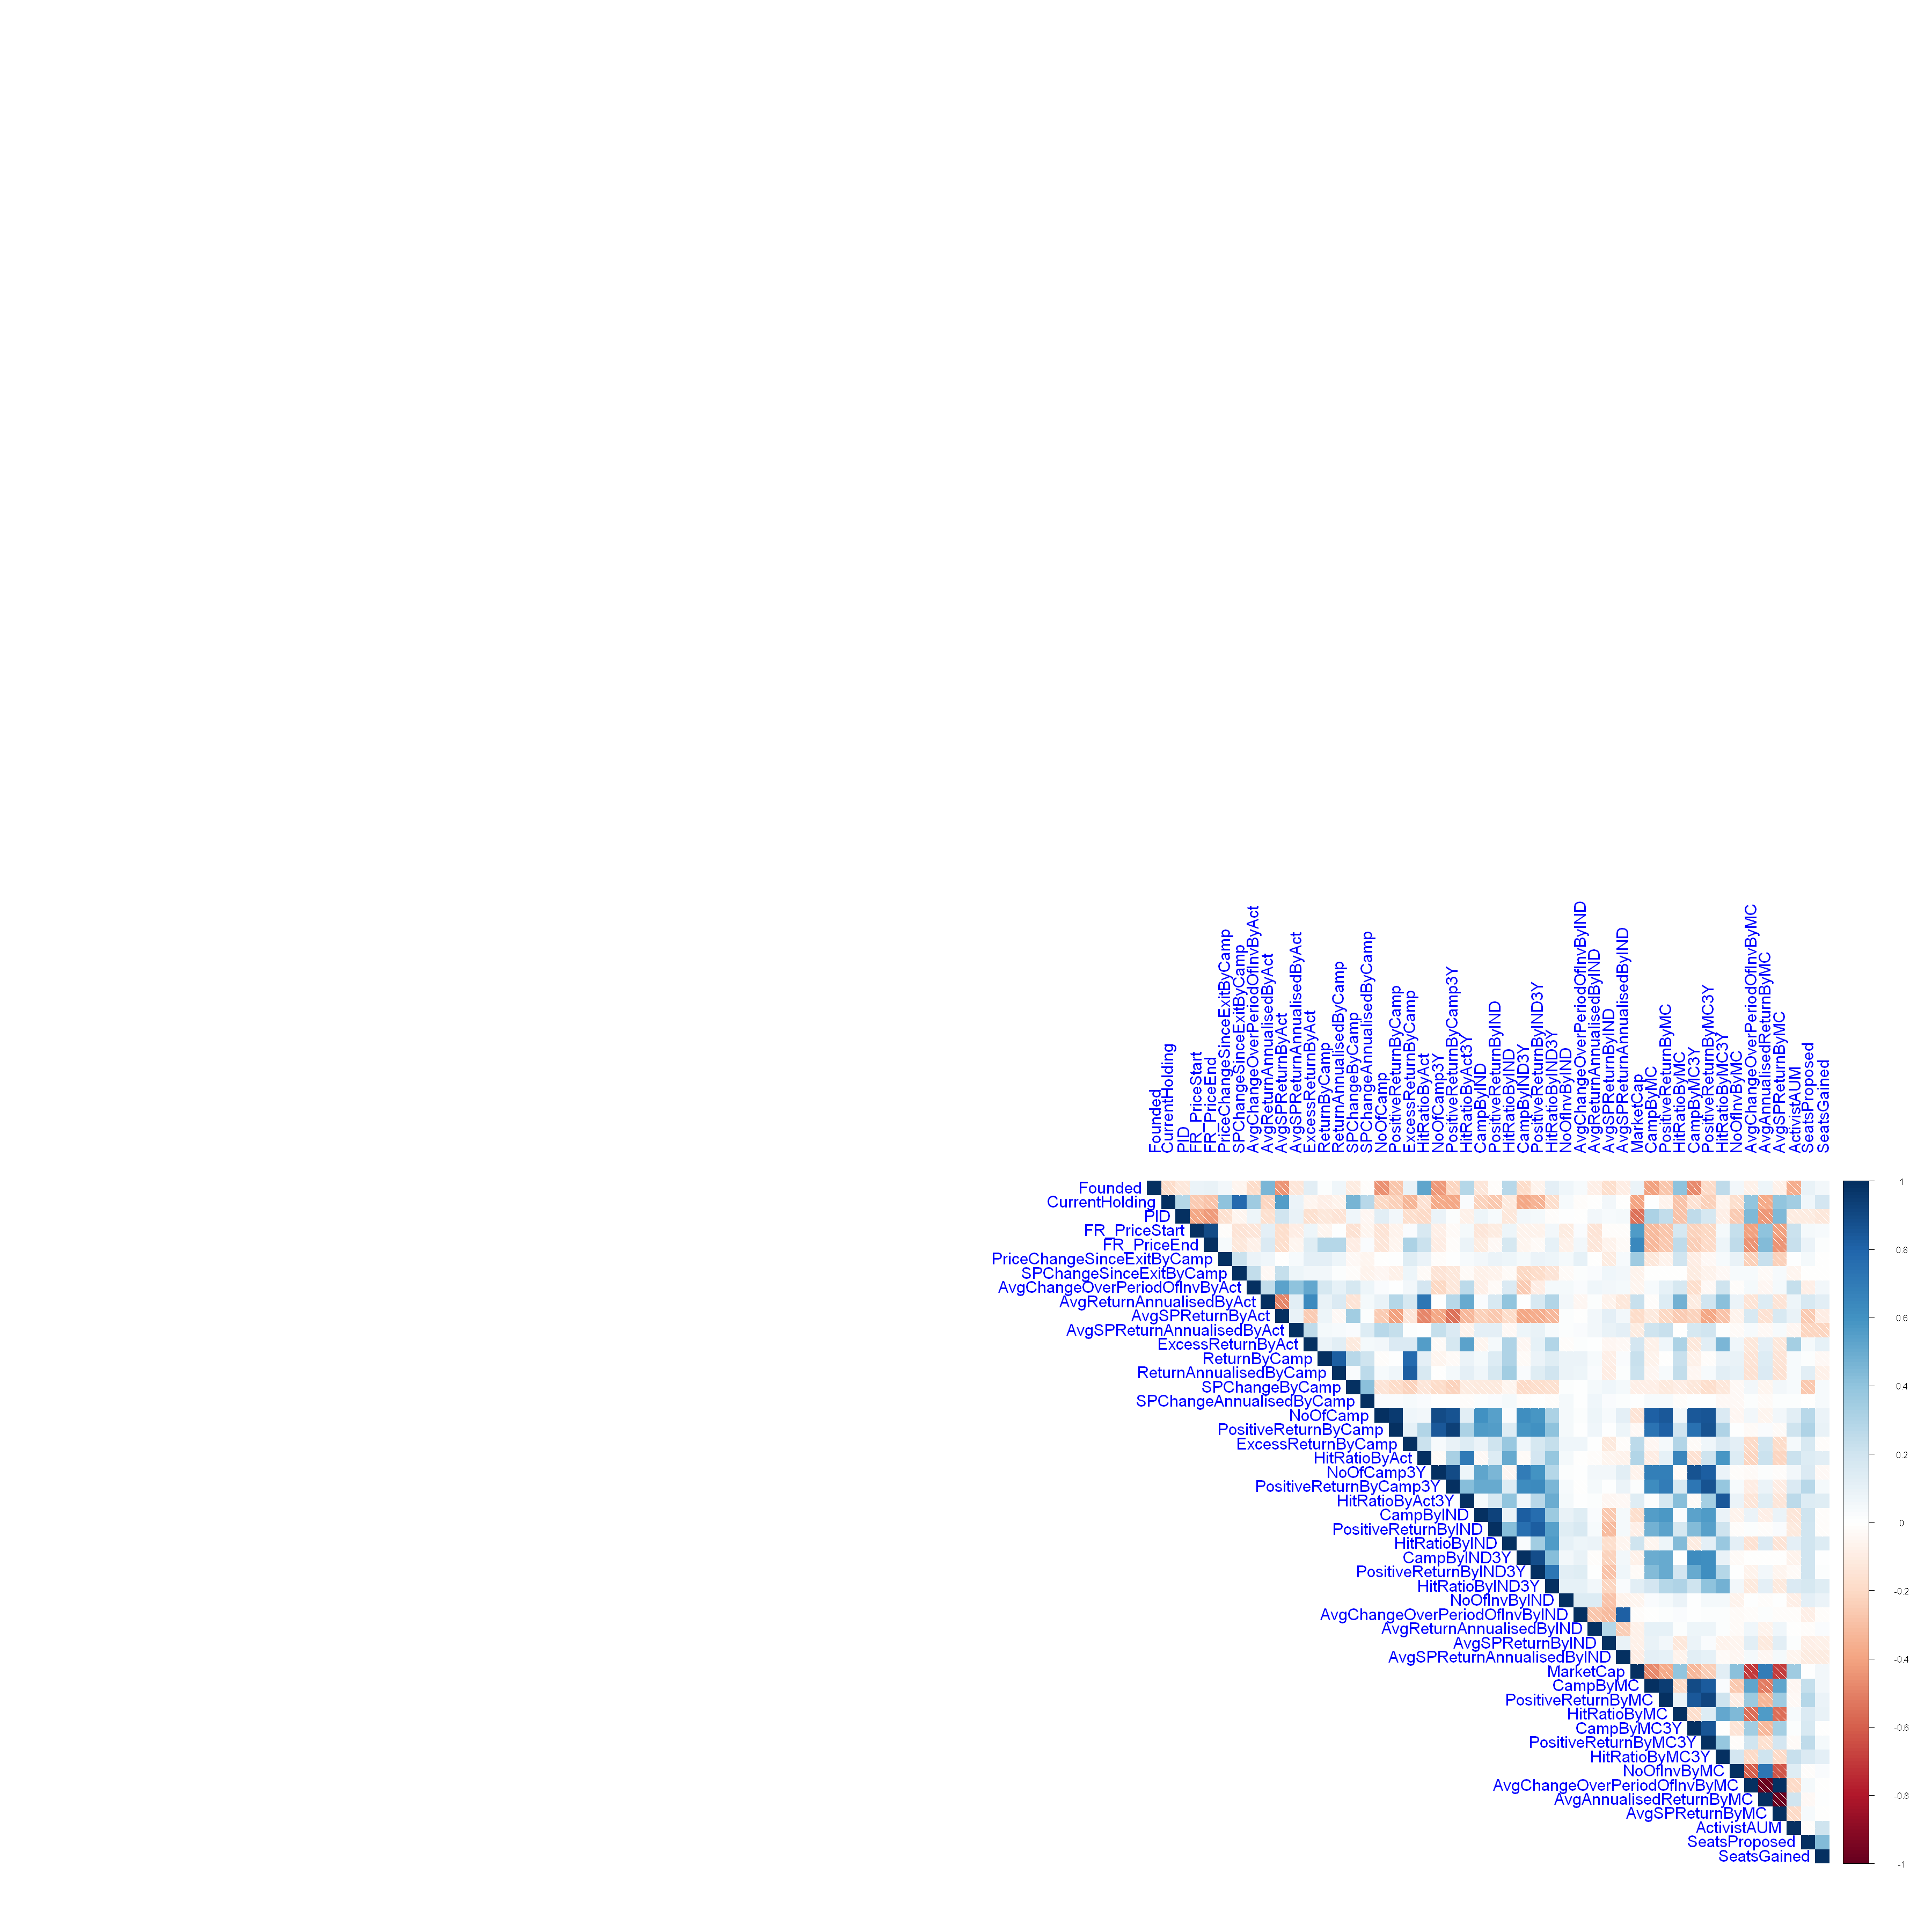

In [83]:
corrplot(res, method = "shade",type = "upper", is.corr = TRUE,tl.cex=1.5,tl.col = "Blue", tl.srt = 90, na.rm = TRUE)
#options(repr.plot.width = 30, repr.plot.height = 30)


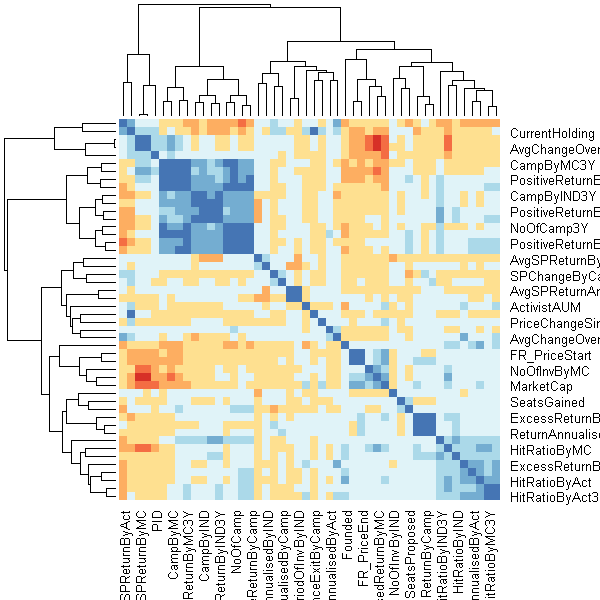

In [120]:
heatmap(res,symm = T,cexCol = 0.8, cexRow = 0.8, col=brewer.pal(n=8, name="RdYlBu"))

## Outliers

In [11]:
outlierMatrix <- function(data,threshold=1.5) {
    vn <- setdiff(names(data),c("Investor.ID","PID"))
    outdata <- data.frame(Investor.ID=data$Investor.ID)
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            med <- median (data[[v]],na.rm=TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[[paste(v,'out',sep='_')]] <- mv        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

df_outliers <- outlierMatrix(df)

In [12]:
df_outliers <- factor(outlierMatrix(df))

In [13]:
## Using IRQ for catching univariate outliers (1.5 x IRQ) 1==Outliers
head(outlierMatrix(df,threshold=1.5))

,Investor.ID,Founded_out,CurrentHolding_out,StatusCurrent_out,StatusExisted_out,PID_COUNT_out,AH_PricePerShareLocal_out,AH_PruchaseValueMnLocal_out,FR_PriceStart_out,FR_PriceEnd_out,...,DelayShareholderMeeting_out,CloseFund_out,ClosedAGM_out,ActivistIssuesPublicLetter_out,ActivistLetterToRegulatoryBodies_out,LitigationInitiated_out,ConsentSolicitationInitiated_out,SECFiling_out,SeatsProposed_out,SeatsGained_out
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,449,0,NA,0,0,0,NA,NA,0,0,...,0,0,0,0,0,0,0,0,NA,NA
2,449,0,NA,0,0,0,NA,NA,0,0,...,0,0,0,0,0,0,0,0,NA,NA
3,449,0,NA,0,0,0,NA,NA,0,0,...,0,0,0,0,0,0,0,0,NA,NA
4,449,0,NA,0,0,0,NA,NA,0,0,...,0,0,0,0,0,0,0,0,NA,NA
5,449,0,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NA,NA
6,449,0,0,1,1,0,NA,NA,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
for (i in 2:length(df_outliers)){
    no_outliers <- df[[i]]
    no_outliers <- ifelse(df_outliers[[i]]==1, NA, no_outliers)
}


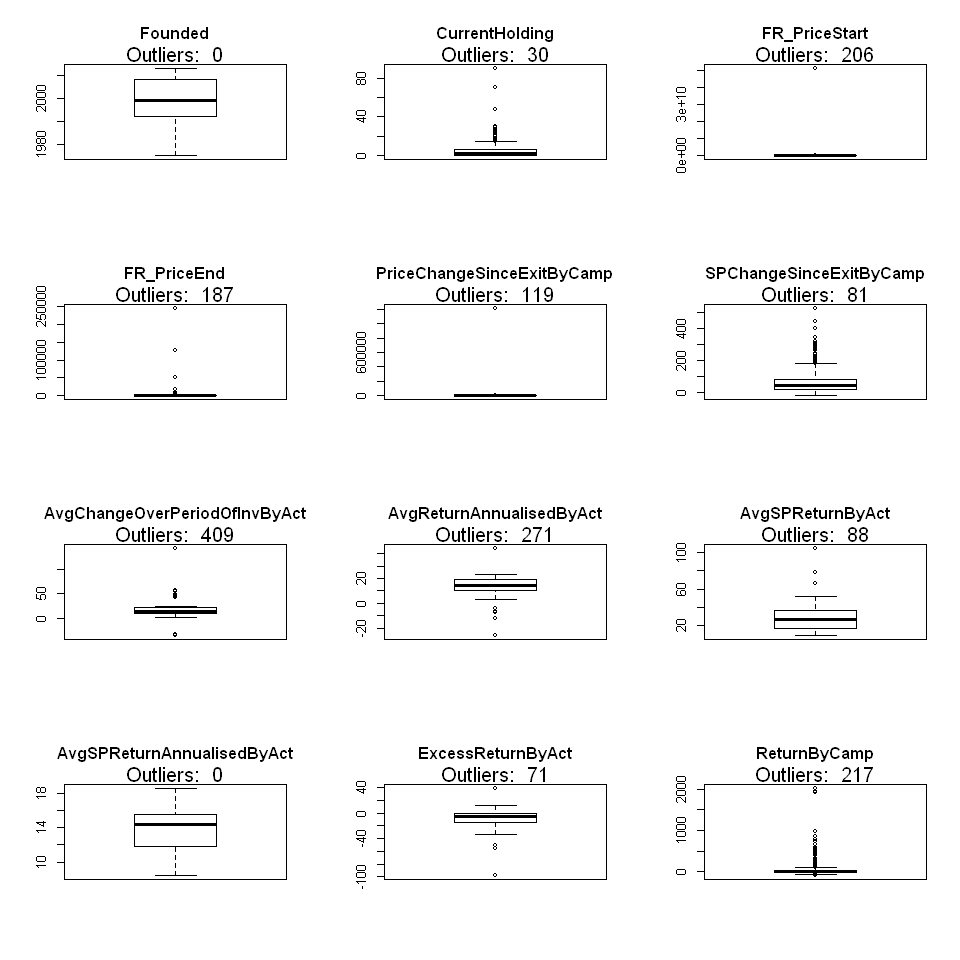

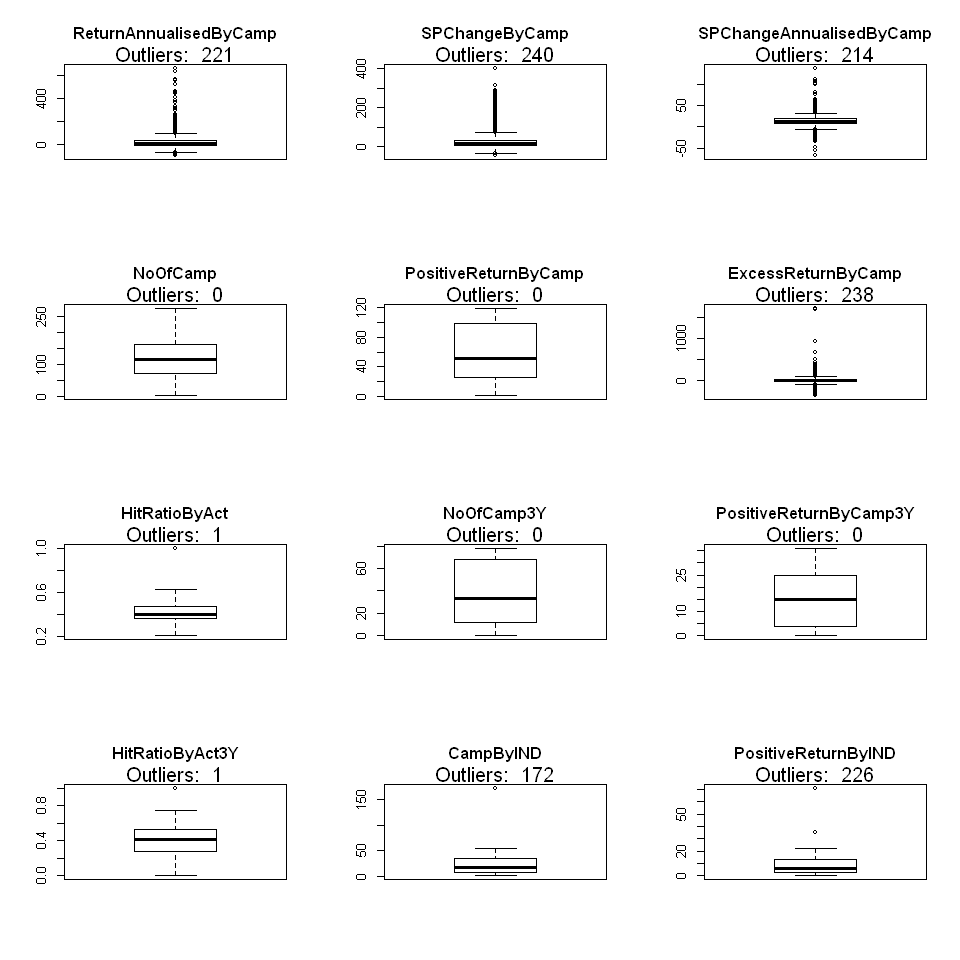

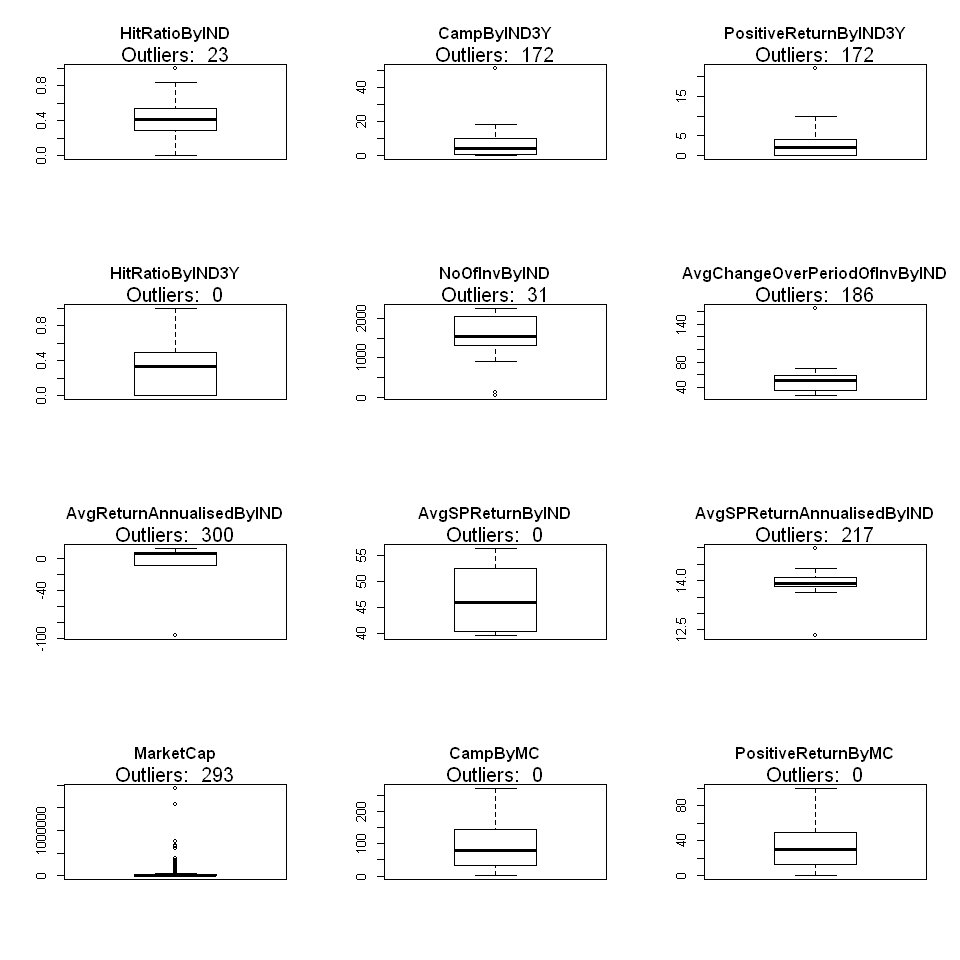

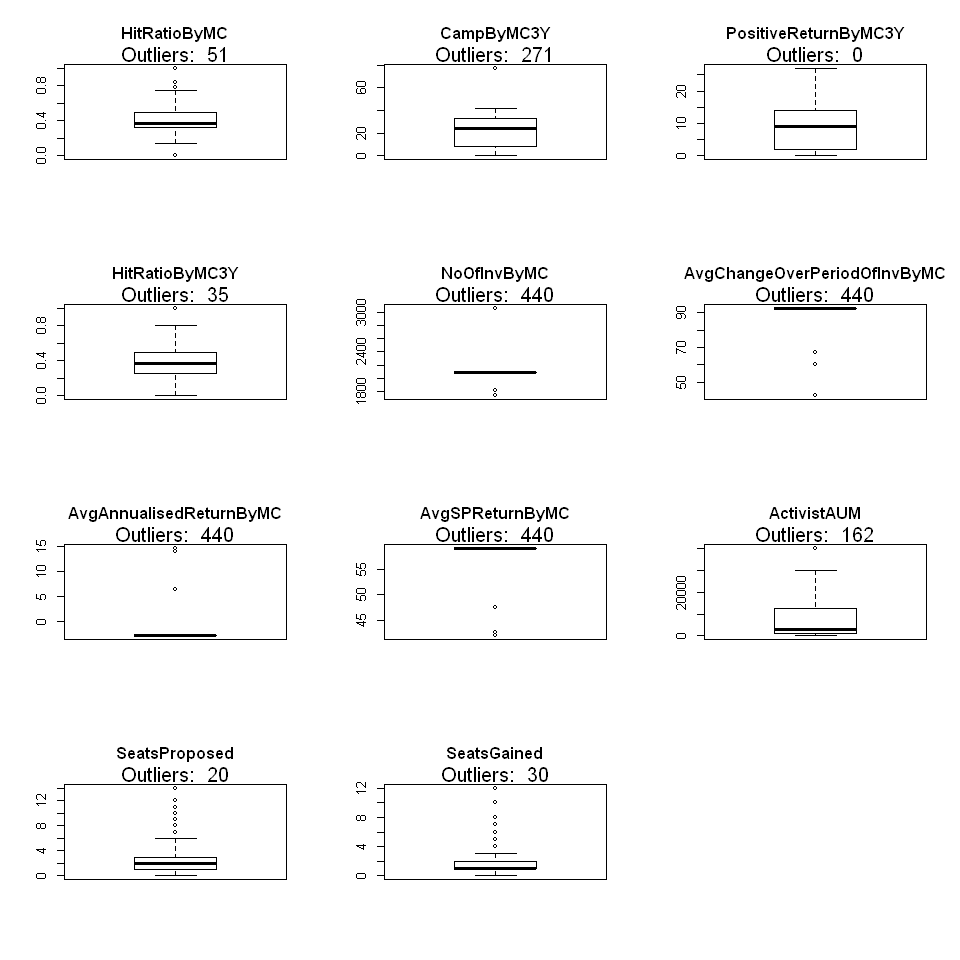

In [15]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(Activism_continuousV)) {
    outlier_values <- boxplot.stats(Activism_continuousV[,v])$out
    boxplot(df[[v]],main=v)
    mtext(paste("Outliers: ", paste(length(outlier_values), collapse=", ")), cex=1)
}
par(mfrow=c(1,1))

## Missingness

In [18]:
getMissingness(df)

list(var = c(19, 17, 188, 179, 178, 7, 73, 180, 23, 22), na_count = c(2019, 1989, 1934, 1846, 1845, 1756, 1704, 1557, 750, 611), rate = c(92.4, 91.1, 88.6, 84.5, 84.5, 80.4, 78, 71.3, 34.3, 28))This dataset has 0 (0%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
AH_PruchaseValueMnLocal,2019,92.4
AH_PricePerShareLocal,1989,91.1
Buyer,1934,88.6
SeatsGained,1846,84.5
SeatsProposed,1845,84.5
CurrentHolding,1756,80.4
ThirteenD,1704,78.0
SeatsGainedMethod,1557,71.3
SPChangeSinceExitByCamp,750,34.3


In [89]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),"Investor.ID")
    missdata <- data.frame(Investor.ID=data$Investor.ID)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missing <- missingMatrix(data=df)
head(df_missing)

,Investor.ID,Activist,ActivistHQ,ActivistRegion,Founded,FirstDateInvestedByActivisit,CurrentHolding,StatusCurrent,StatusExisted,DateExited,...,SeatsGained,SeatsGainedMethod,Ongoing,WithdrewDemands,PartiallySuccessful,Successful,Unsuccessful,CompromiseOrSettlement,Unresolved,Buyer
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,449,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,449,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3,449,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,449,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,449,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6,449,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


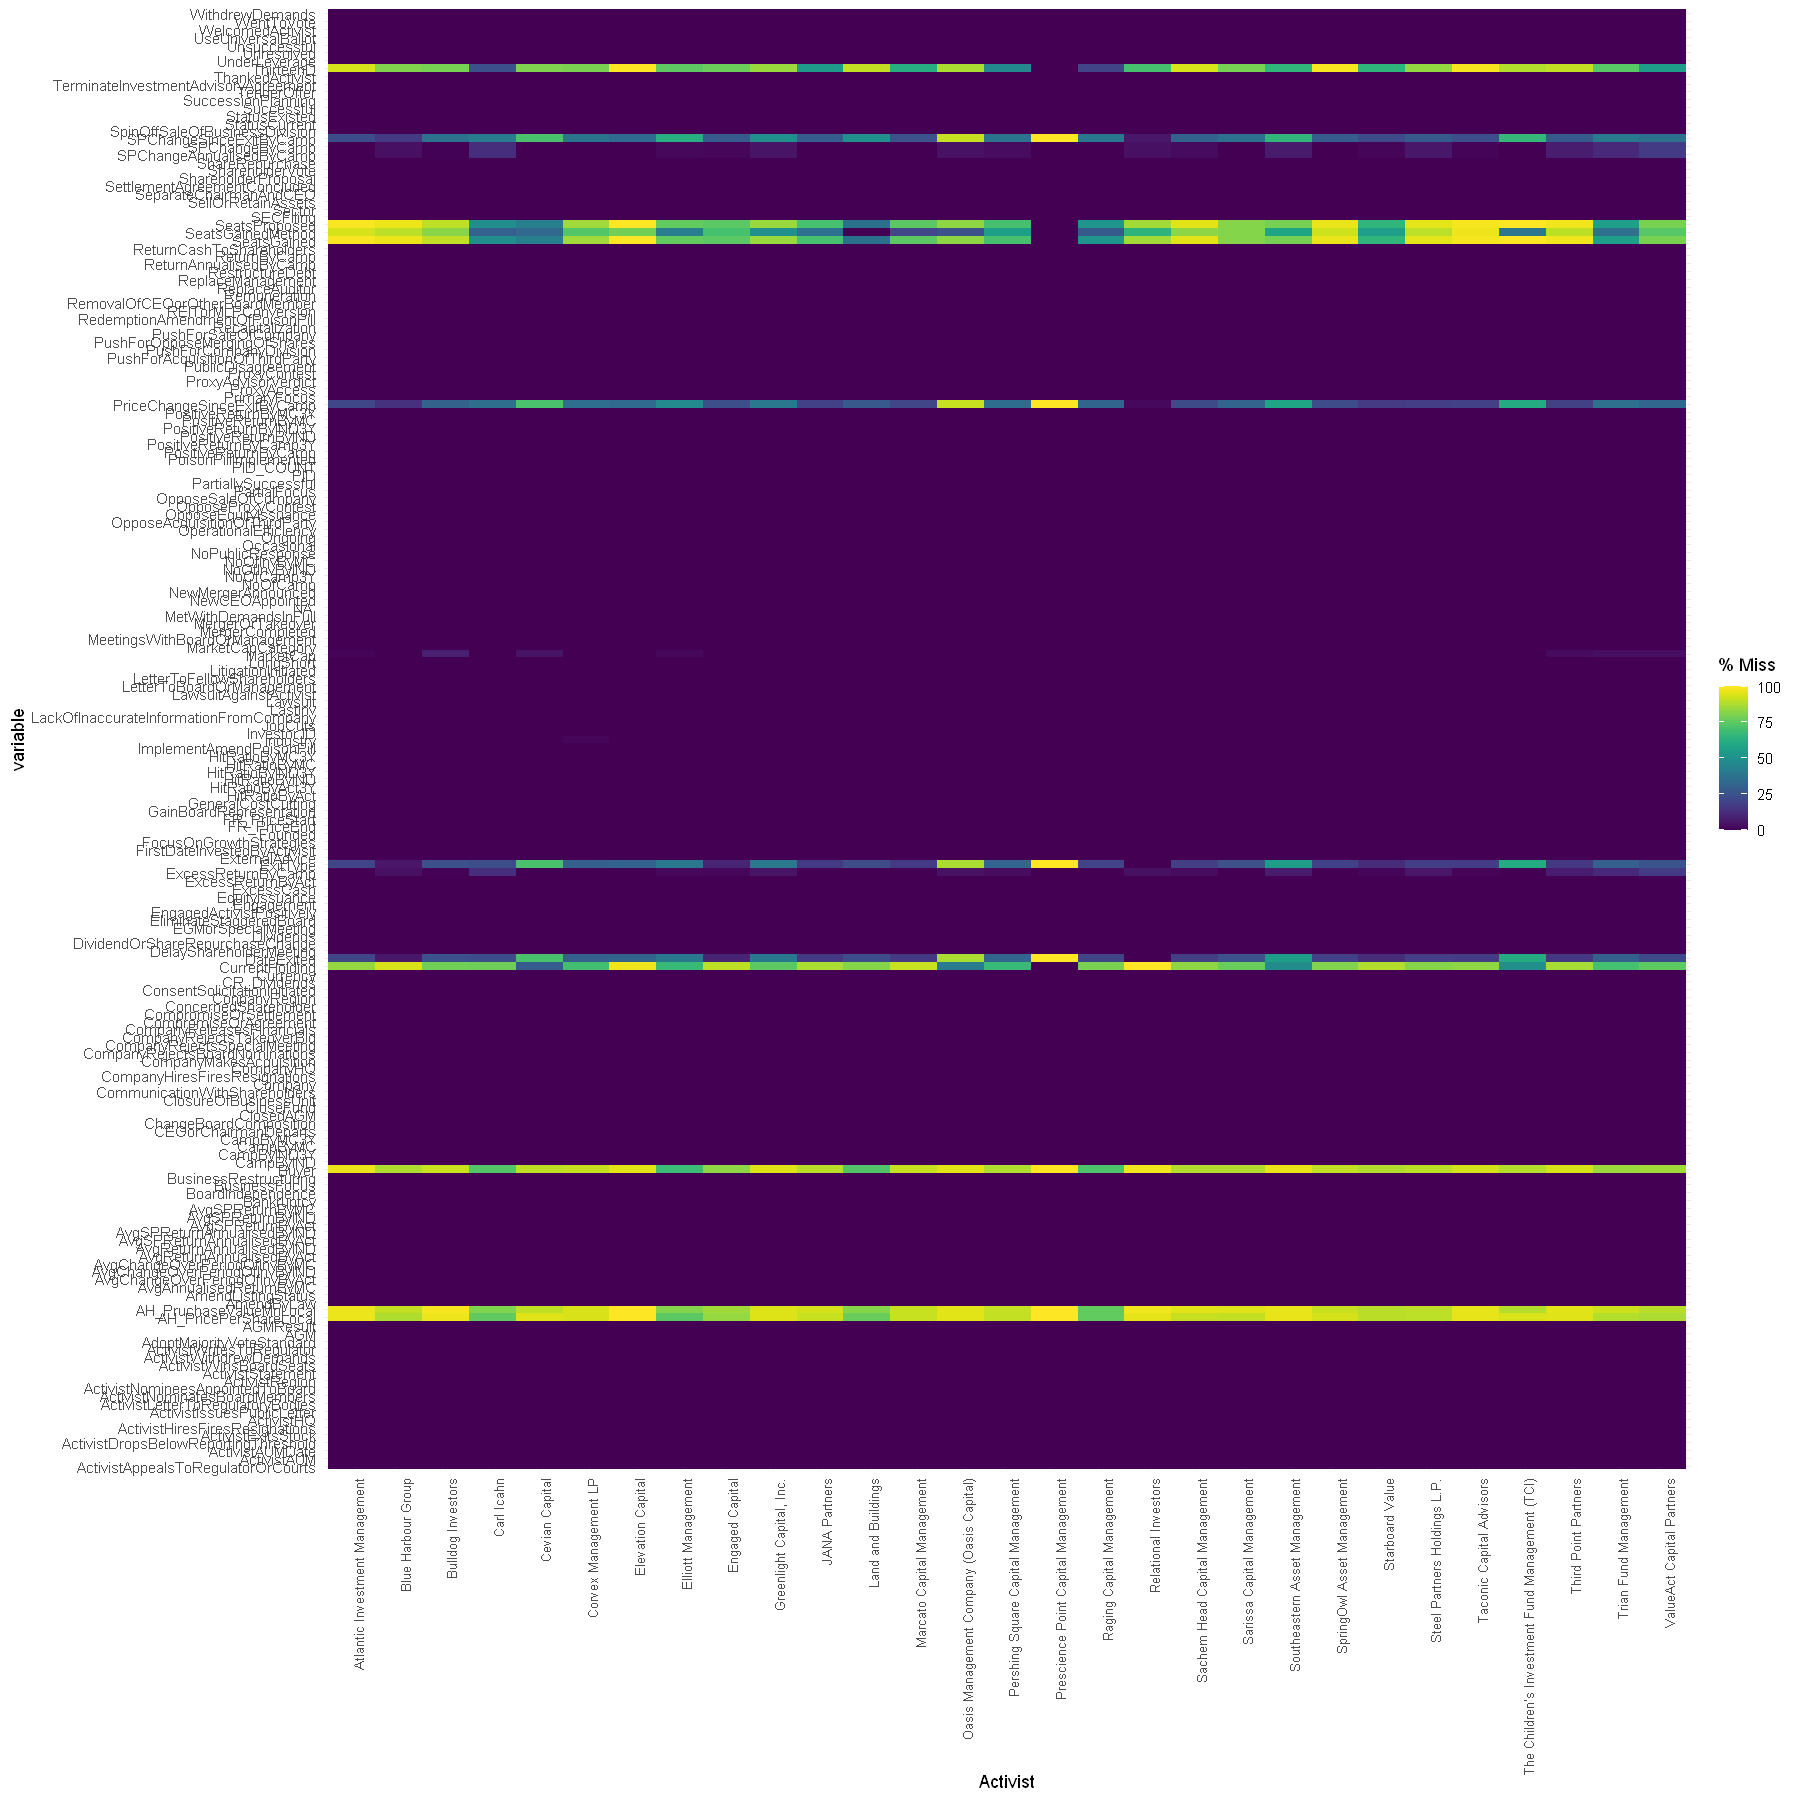

In [95]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=df, fct=Activist) + 
theme(axis.text.x = element_text(angle=90, size=8))


# Data Cleansing

## Outliers

### For the variables where outliers were found, checking the distribution with(blue) / without outliers(red)

Joining, by = c("Founded", "outliers")

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("CurrentHolding", "outliers")

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 1756 rows containing non-finite values (stat_density)."
Joining, by = c("FR_PriceStart", "outliers")



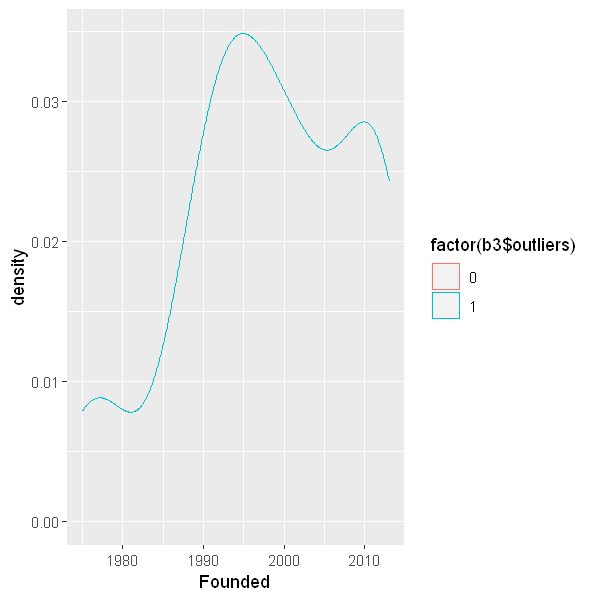

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("FR_PriceEnd", "outliers")



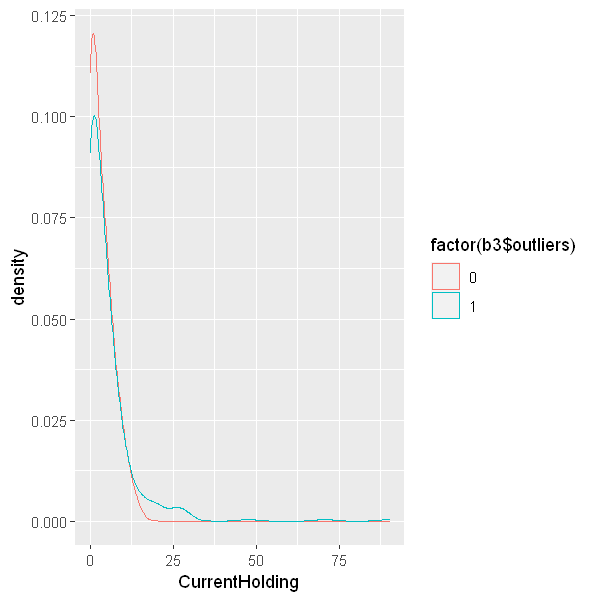

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("PriceChangeSinceExitByCamp", "outliers")



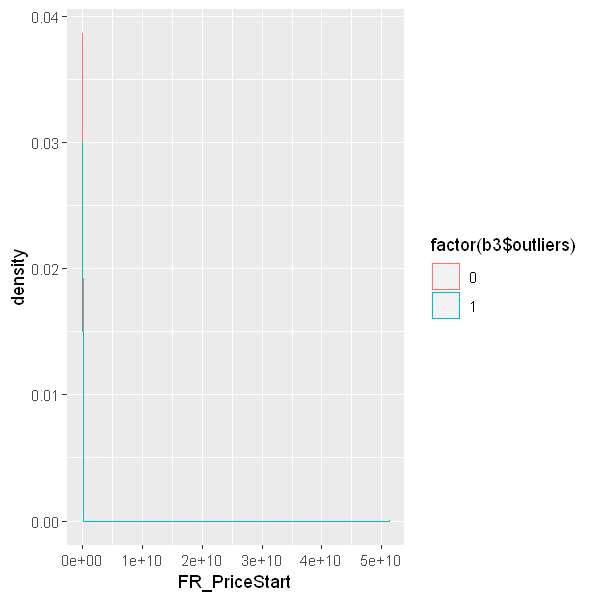

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 611 rows containing non-finite values (stat_density)."
Joining, by = c("SPChangeSinceExitByCamp", "outliers")



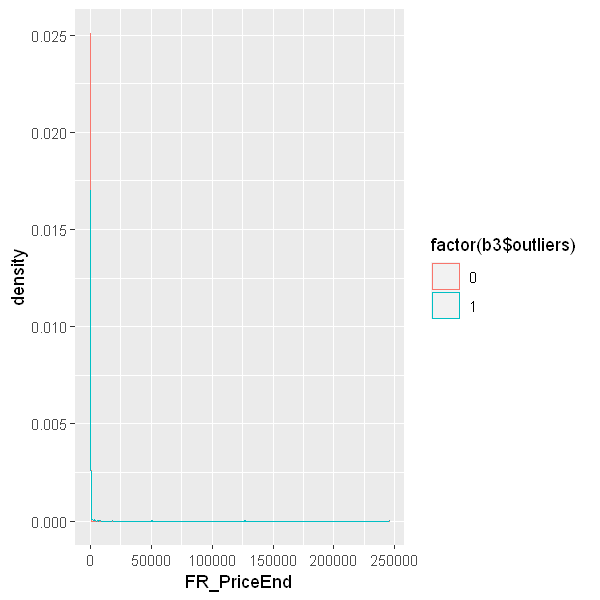

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 750 rows containing non-finite values (stat_density)."
Joining, by = c("AvgChangeOverPeriodOfInvByAct", "outliers")



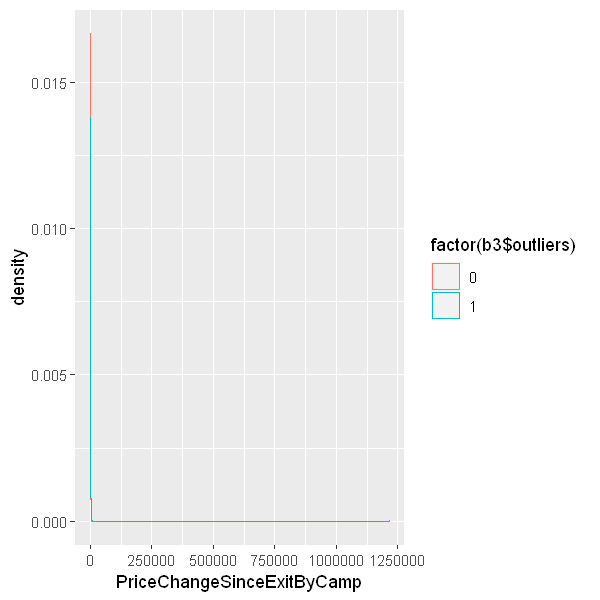

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AvgReturnAnnualisedByAct", "outliers")



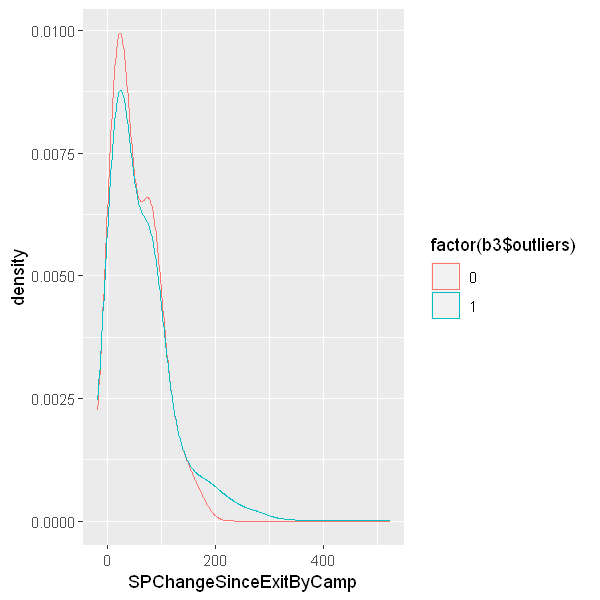

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AvgSPReturnByAct", "outliers")



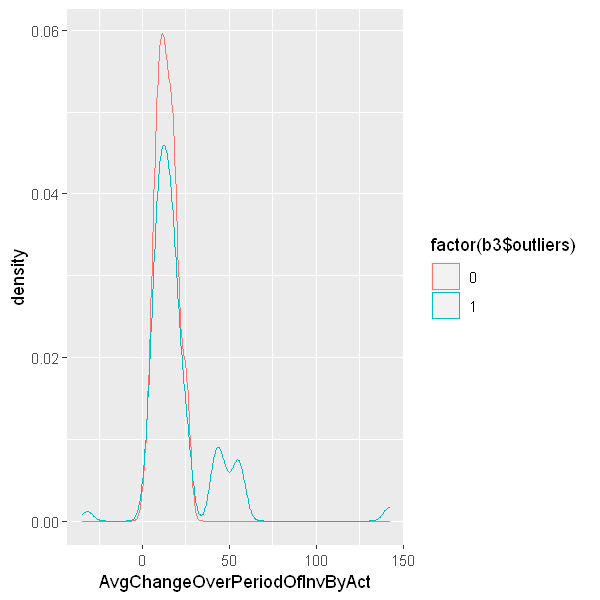

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AvgSPReturnAnnualisedByAct", "outliers")



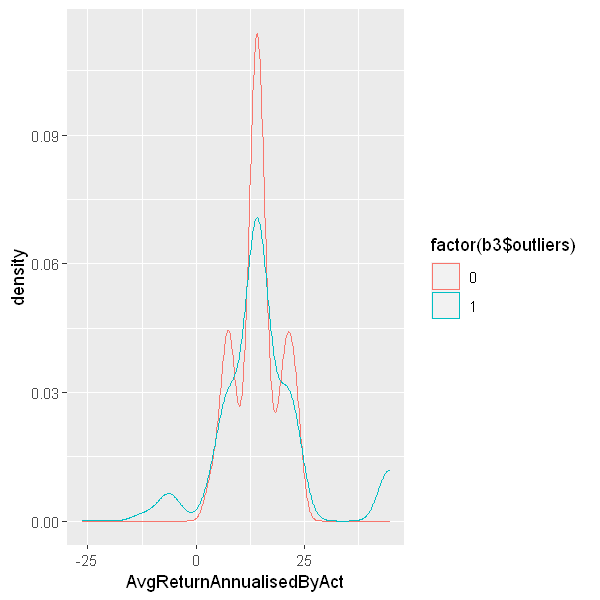

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("ExcessReturnByAct", "outliers")



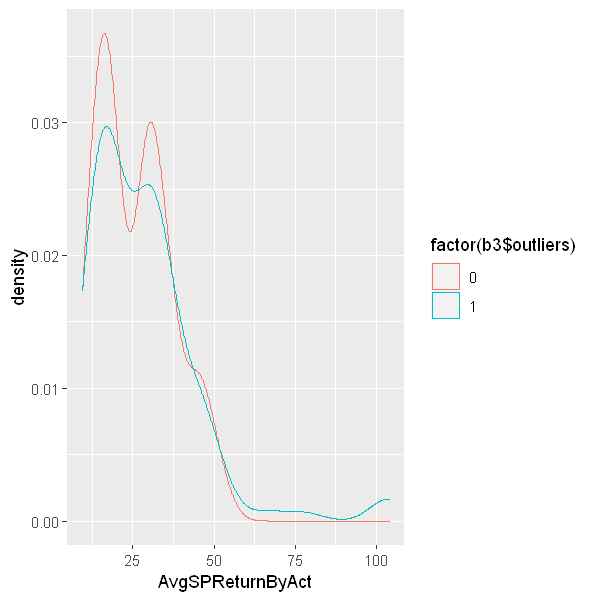

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("ReturnByCamp", "outliers")



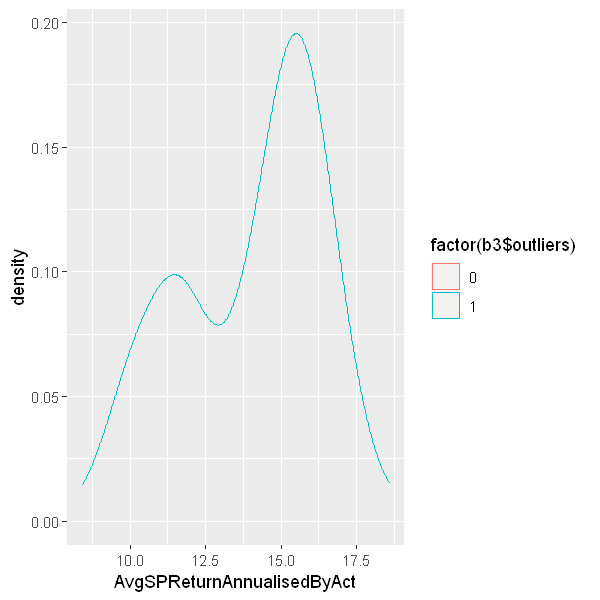

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("ReturnAnnualisedByCamp", "outliers")



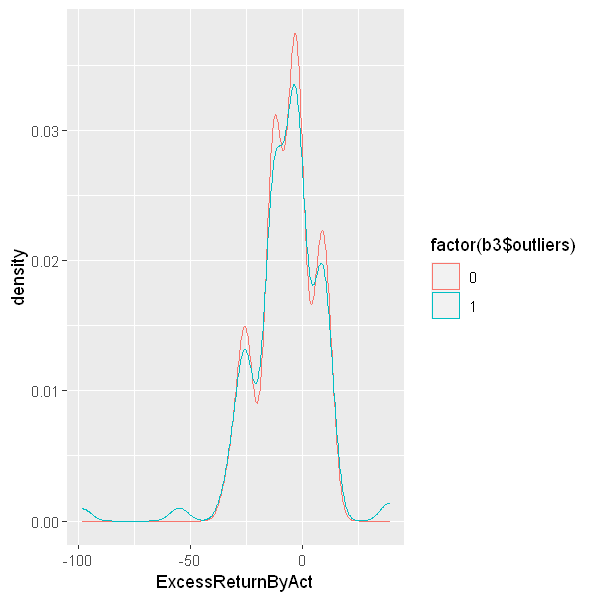

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("SPChangeByCamp", "outliers")



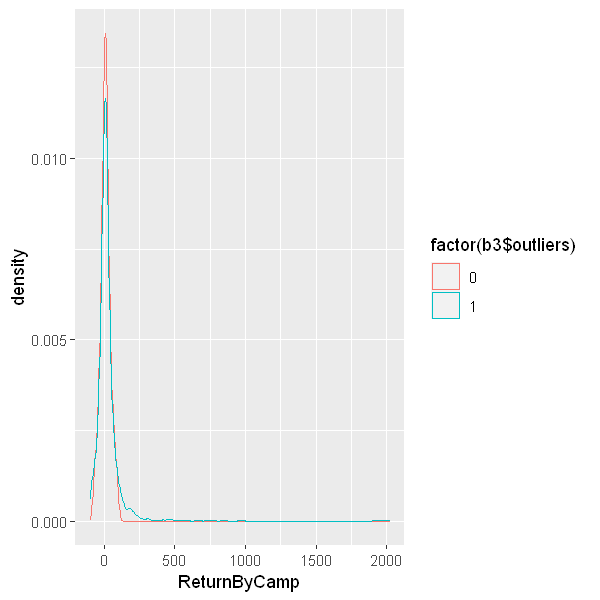

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 77 rows containing non-finite values (stat_density)."
Joining, by = c("SPChangeAnnualisedByCamp", "outliers")



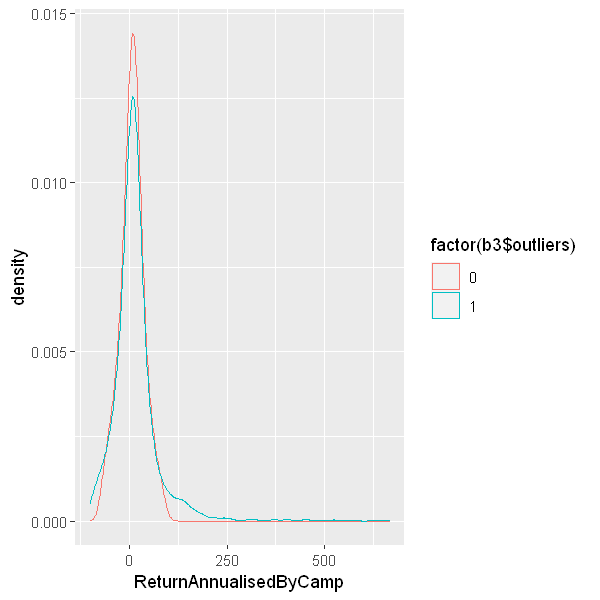

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 77 rows containing non-finite values (stat_density)."
Joining, by = c("NoOfCamp", "outliers")



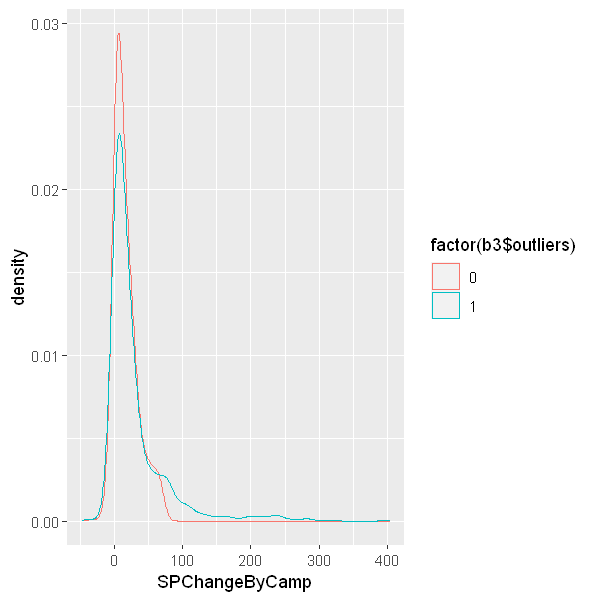

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("PositiveReturnByCamp", "outliers")



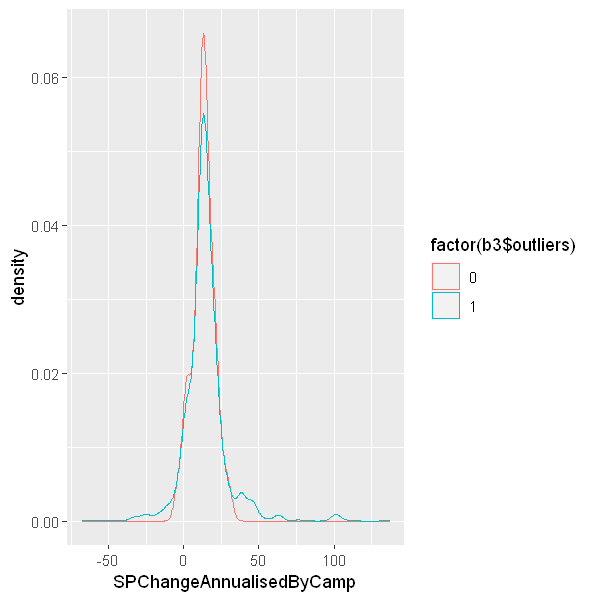

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("ExcessReturnByCamp", "outliers")



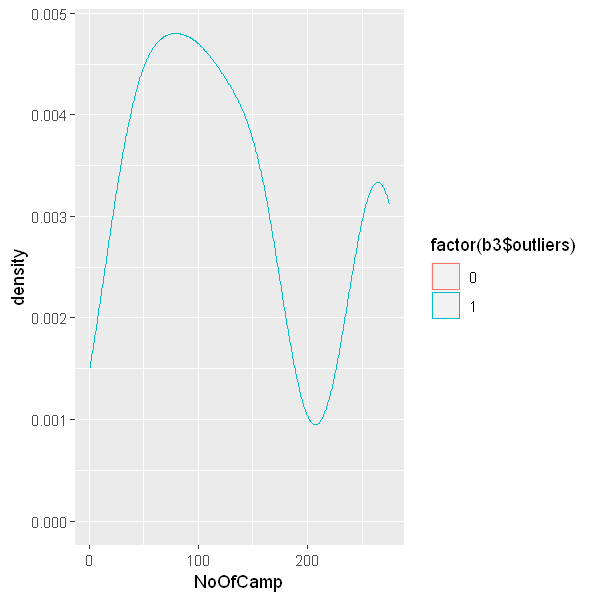

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 77 rows containing non-finite values (stat_density)."
Joining, by = c("HitRatioByAct", "outliers")



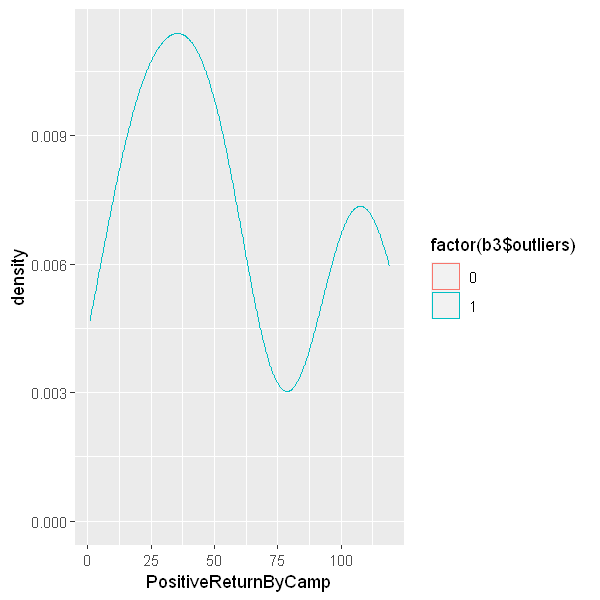

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("NoOfCamp3Y", "outliers")



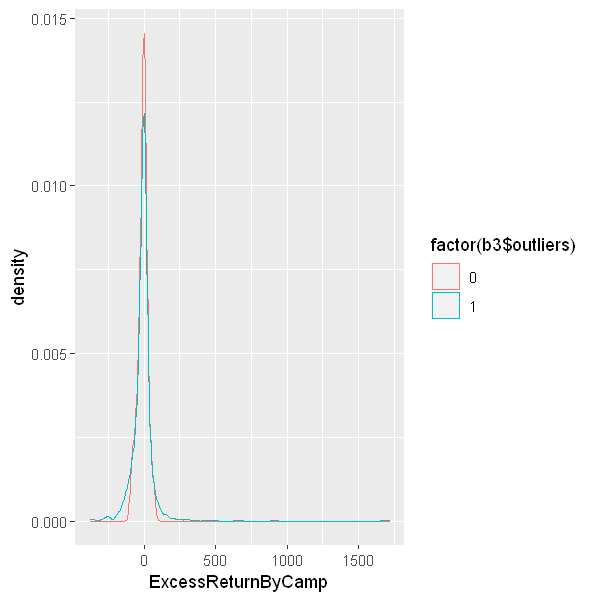

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("PositiveReturnByCamp3Y", "outliers")



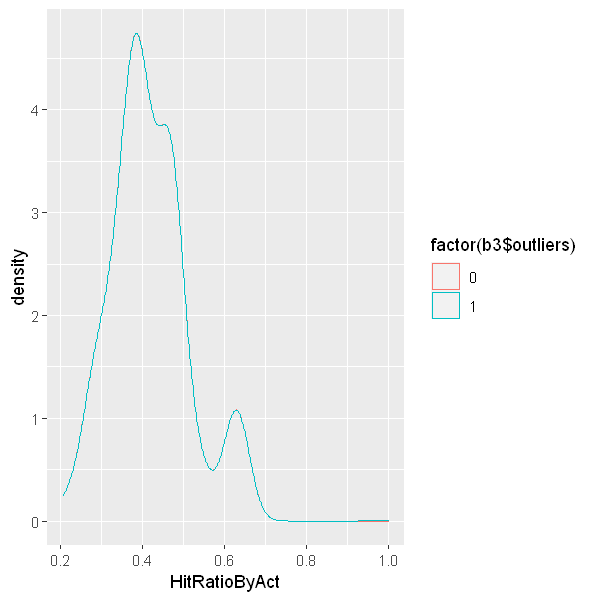

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("HitRatioByAct3Y", "outliers")



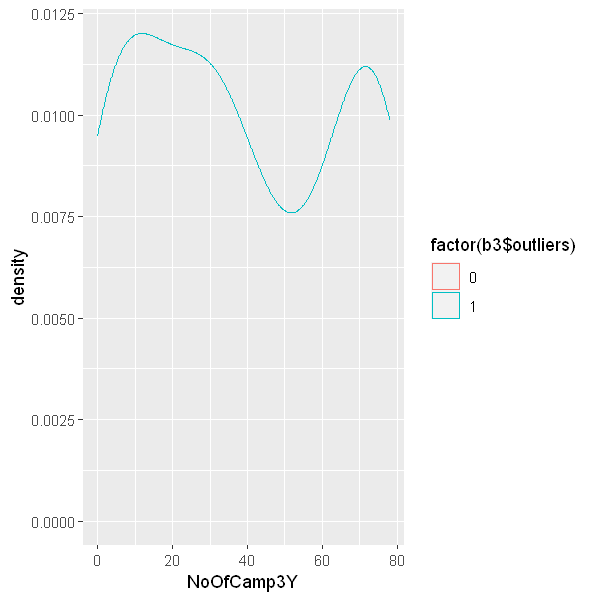

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("CampByIND", "outliers")



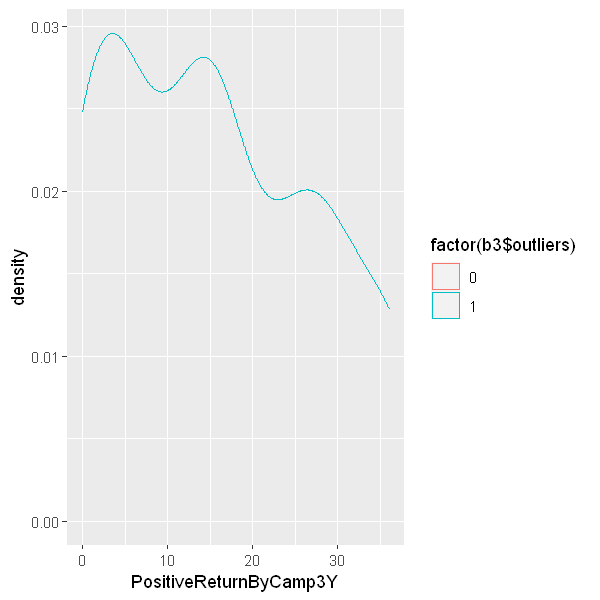

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("PositiveReturnByIND", "outliers")



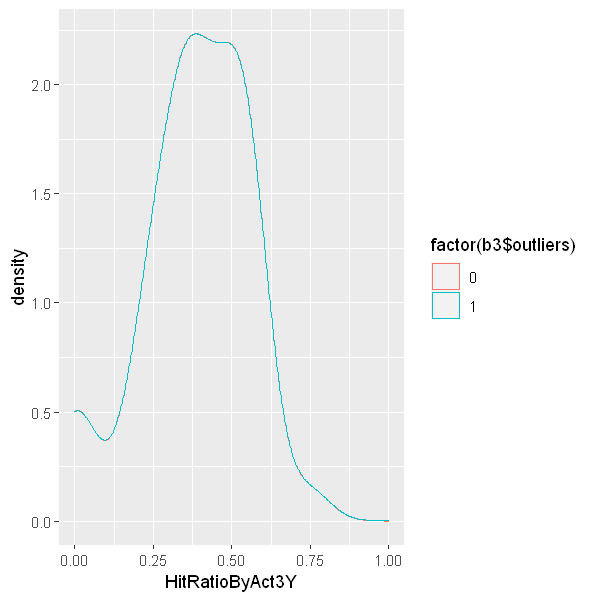

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("HitRatioByIND", "outliers")



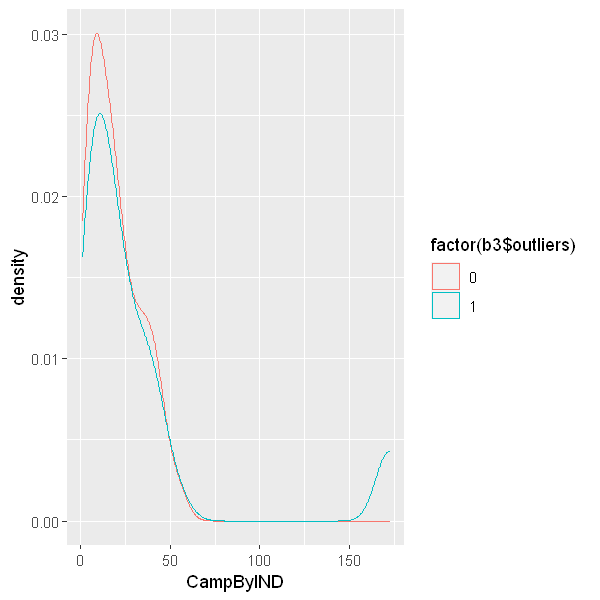

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("CampByIND3Y", "outliers")



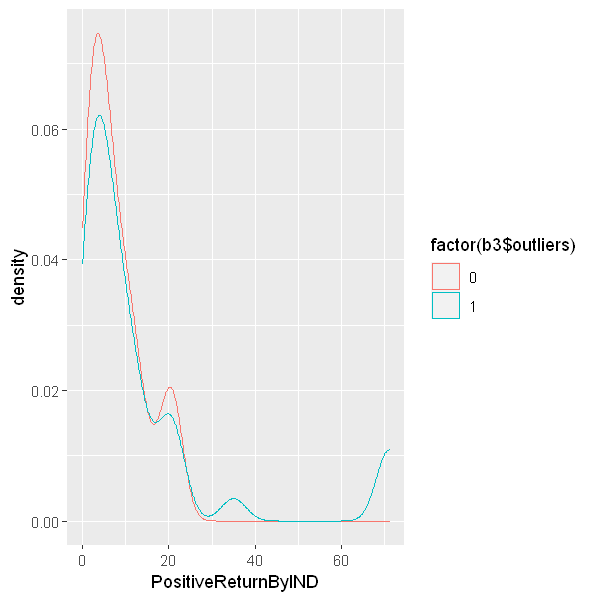

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("PositiveReturnByIND3Y", "outliers")



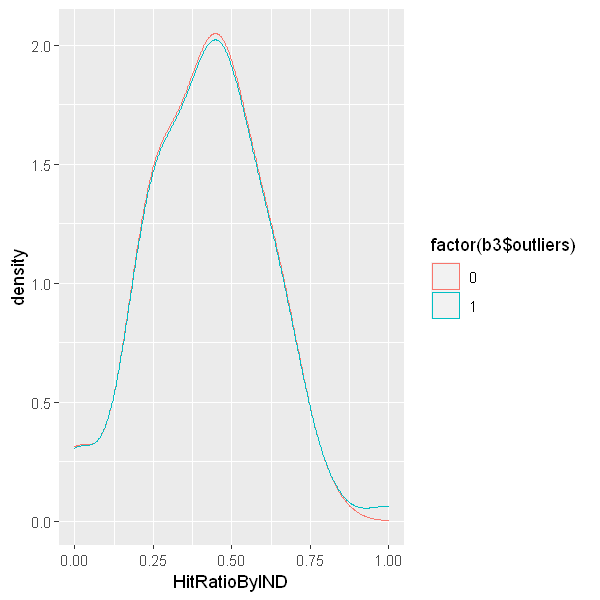

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("HitRatioByIND3Y", "outliers")



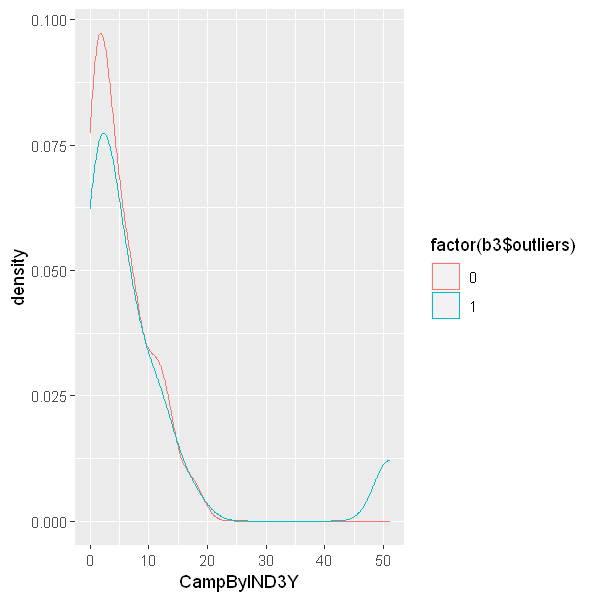

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("NoOfInvByIND", "outliers")



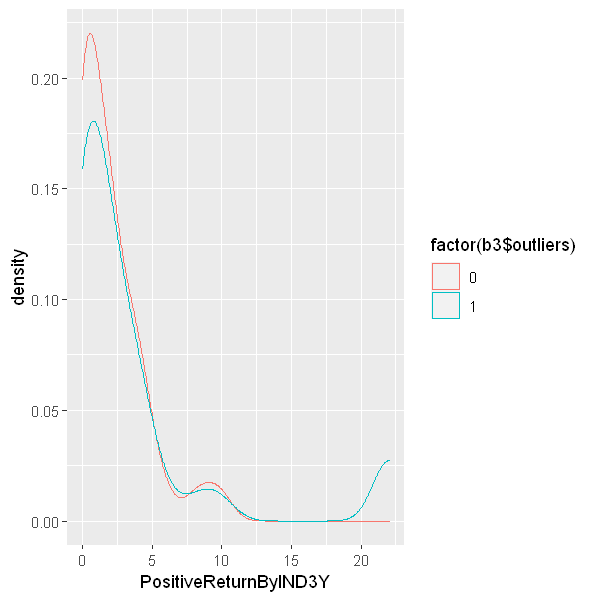

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AvgChangeOverPeriodOfInvByIND", "outliers")



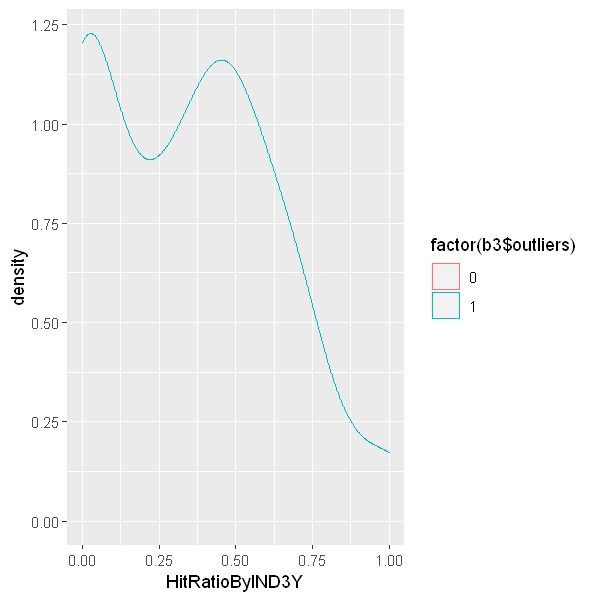

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AvgReturnAnnualisedByIND", "outliers")



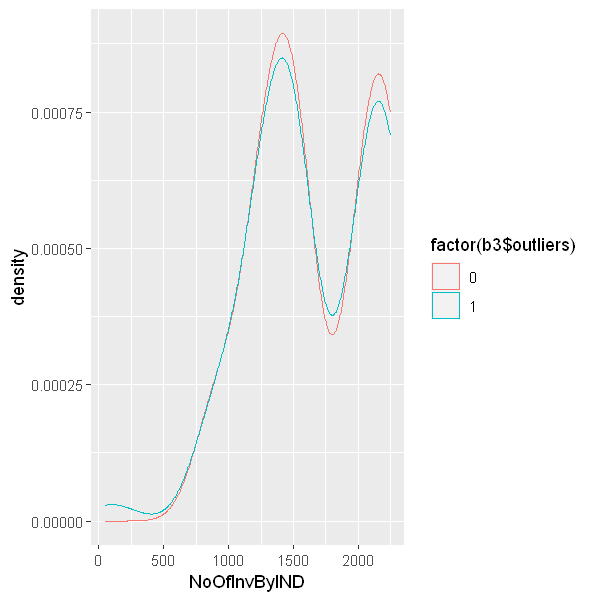

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AvgSPReturnByIND", "outliers")



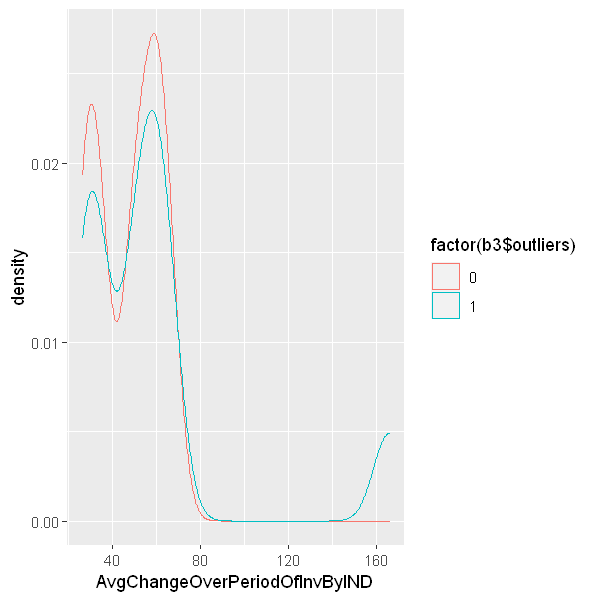

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AvgSPReturnAnnualisedByIND", "outliers")



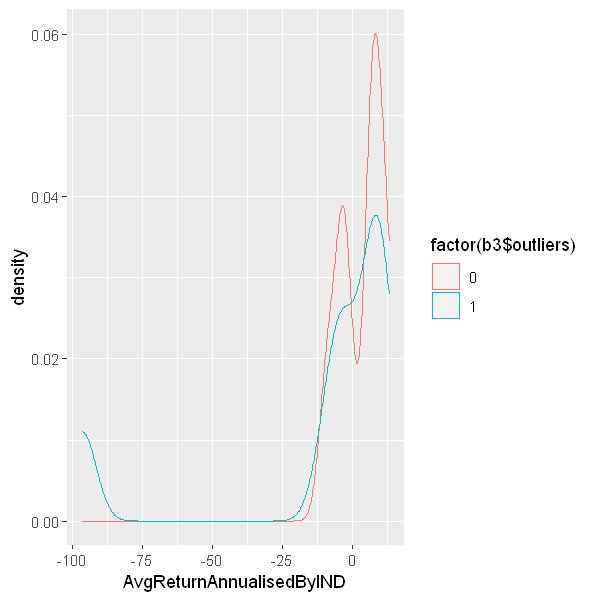

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("MarketCap", "outliers")



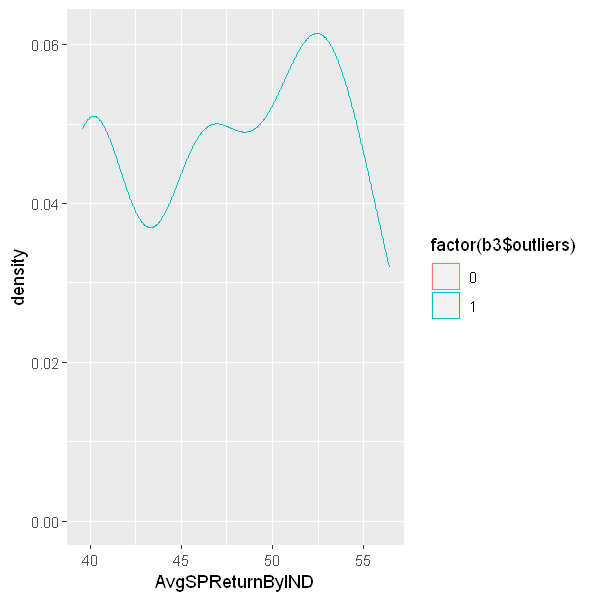

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 41 rows containing non-finite values (stat_density)."
Joining, by = c("CampByMC", "outliers")



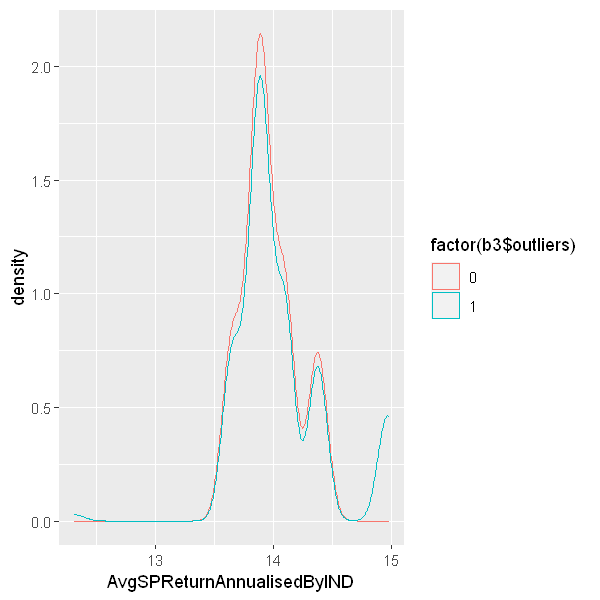

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("PositiveReturnByMC", "outliers")



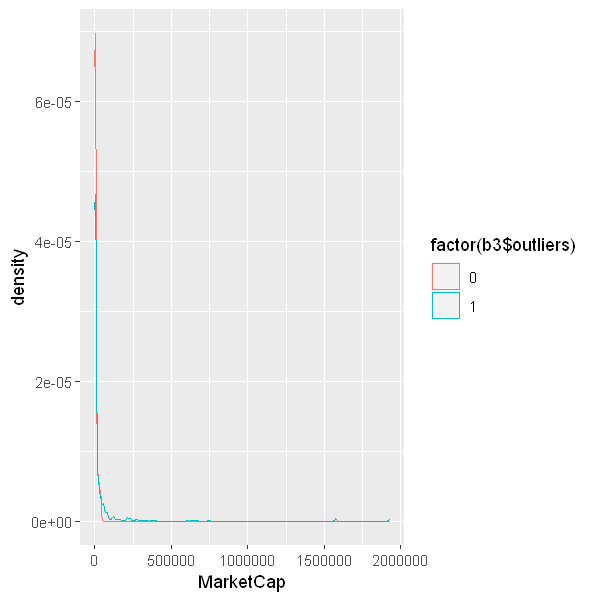

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("HitRatioByMC", "outliers")



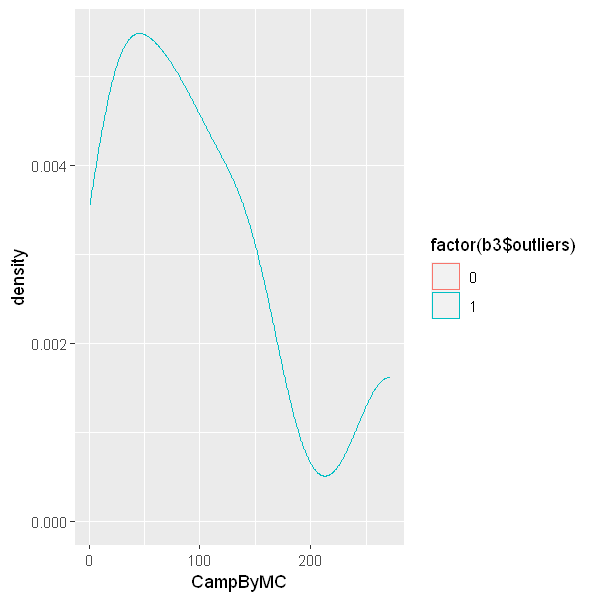

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("CampByMC3Y", "outliers")



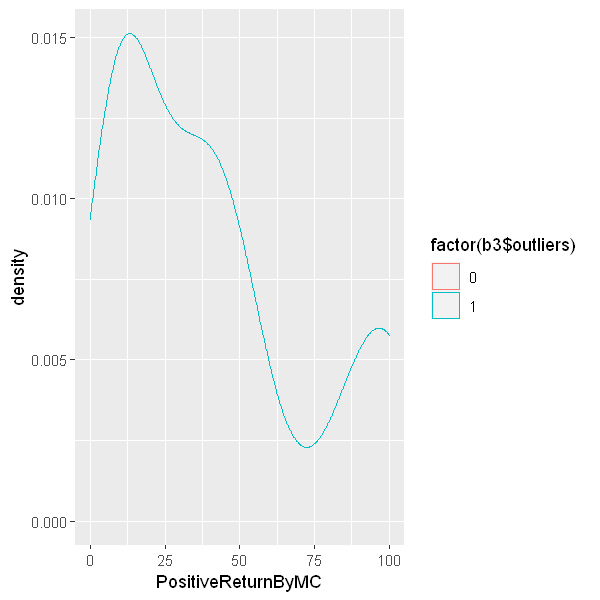

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("PositiveReturnByMC3Y", "outliers")



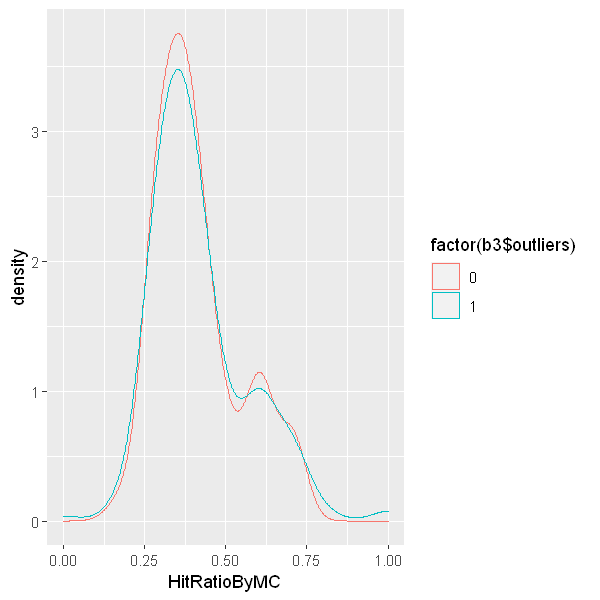

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("HitRatioByMC3Y", "outliers")



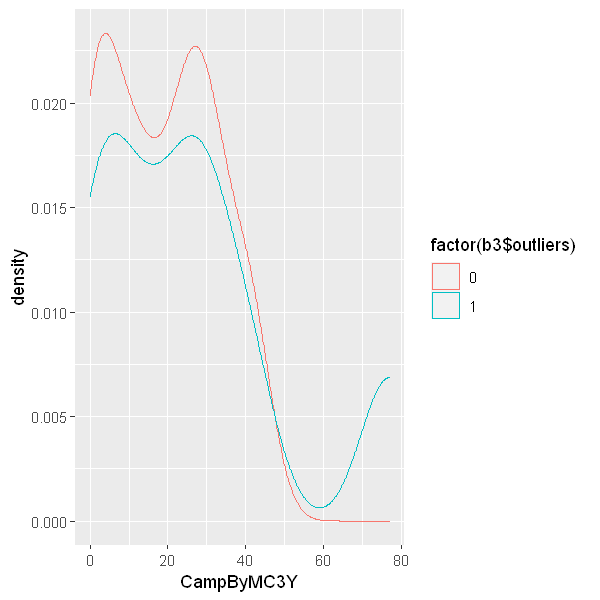

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("NoOfInvByMC", "outliers")



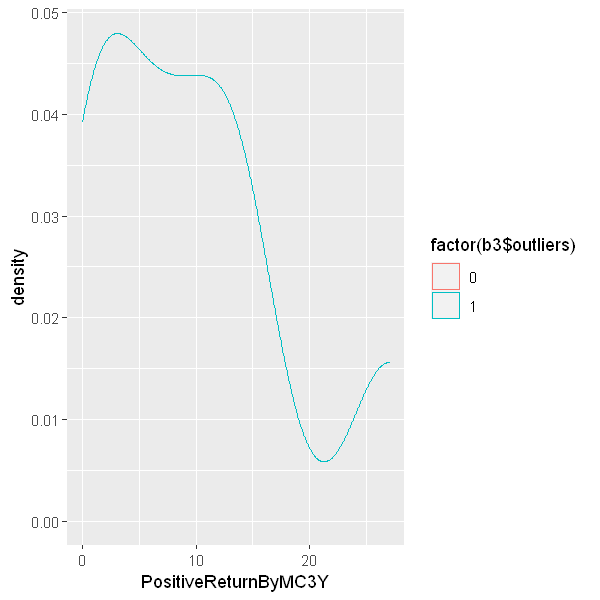

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AvgChangeOverPeriodOfInvByMC", "outliers")



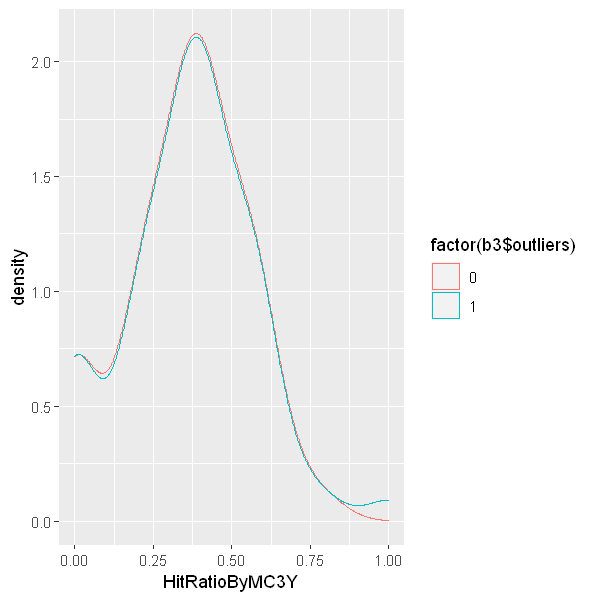

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AvgAnnualisedReturnByMC", "outliers")



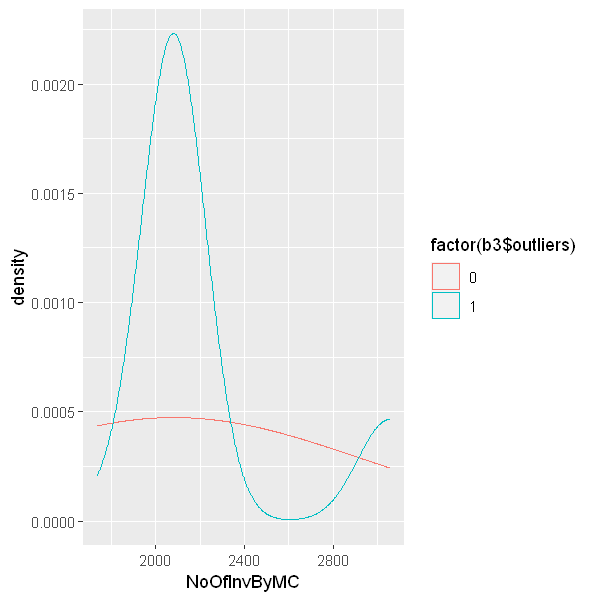

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AvgSPReturnByMC", "outliers")



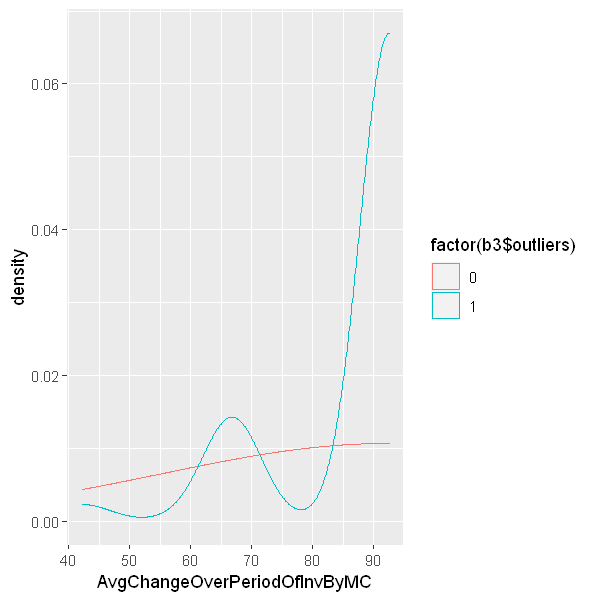

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("ActivistAUM", "outliers")



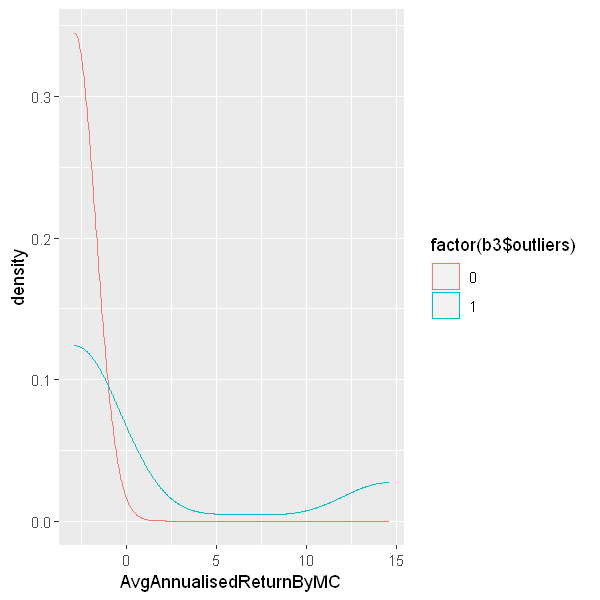

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("SeatsProposed", "outliers")



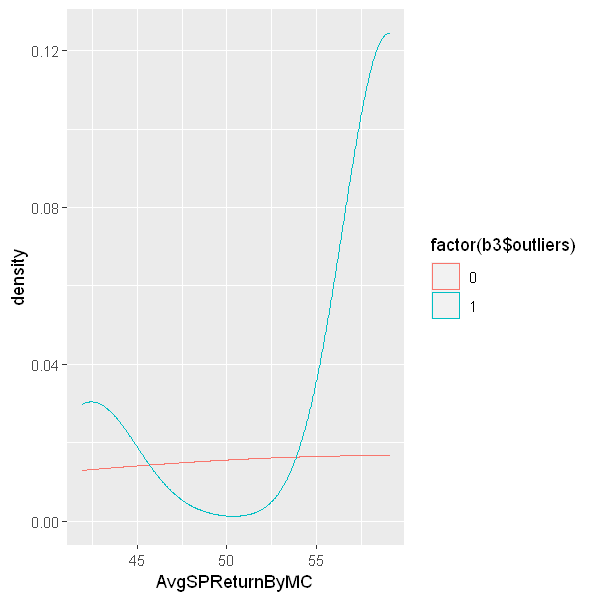

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 1845 rows containing non-finite values (stat_density)."
Joining, by = c("SeatsGained", "outliers")



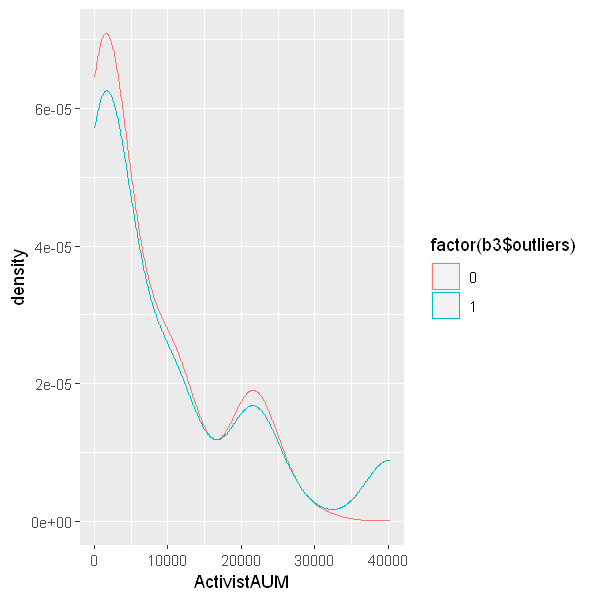

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 1846 rows containing non-finite values (stat_density)."


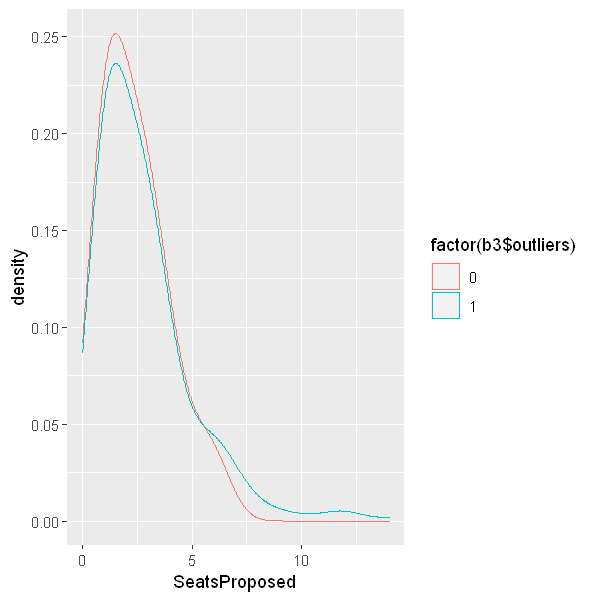

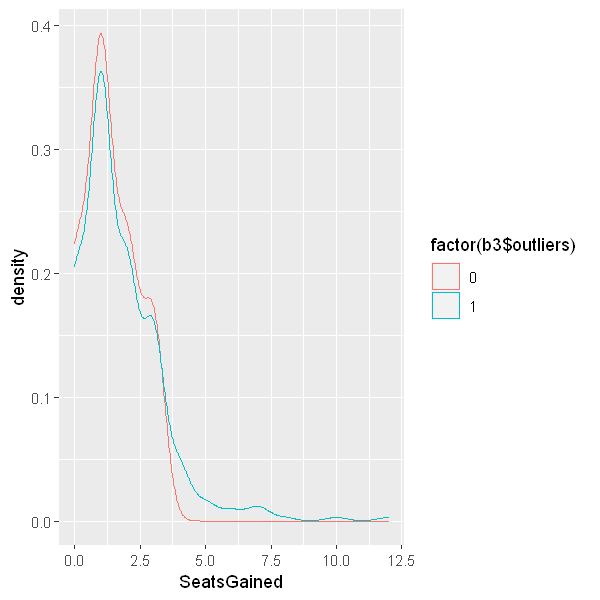

In [150]:
for (v in names(Activism_continuousV)) {
    
    a1 <- min(df[[v]],na.rm=TRUE)
    a2 <- max(df[[v]],na.rm=TRUE)
    b1 <- df %>% select(v) 
    b1$outliers <- 1
    b2 <- df %>% select(v) %>% filter(df_outliers[[paste(v,'out',sep='_')]]==0)
    b2$outliers <- 0
    b3 <- full_join(b1,b2)
    if(length(unique(b3[[v]]))>1){
    print(ggplot(b3,aes(x=b3[[v]], group=factor(b3$outliers),
                          color=factor(b3$outliers))) + xlab(v) +
    geom_density(adjust=2) + xlim(c(a1,a2)))
}}
options(repr.plot.width = 5, repr.plot.height = 5)
par(mfrow=c(2,2))




In [137]:
for (i in 2:length(df_outliers)){
    df_outliers[[i]] <- factor(df_outliers[[i]])
}
summary(df_outliers)

  Investor.ID   Founded_out CurrentHolding_out StatusCurrent_out
 Min.   : 449   0:2184      0   : 398          0:1688           
 1st Qu.:5155               1   :  30          1: 496           
 Median :5760               NA's:1756                           
 Mean   :5383                                                   
 3rd Qu.:6118                                                   
 Max.   :8982                                                   
 StatusExisted_out PID_COUNT_out AH_PricePerShareLocal_out
 0:1688            0:2184        0   : 176                
 1: 496                          1   :  19                
                                 NA's:1989                
                                                          
                                                          
                                                          
 AH_PruchaseValueMnLocal_out FR_PriceStart_out FR_PriceEnd_out
 0   : 146                   0:1978            0:1997         
 1   :

### Influence on outcome

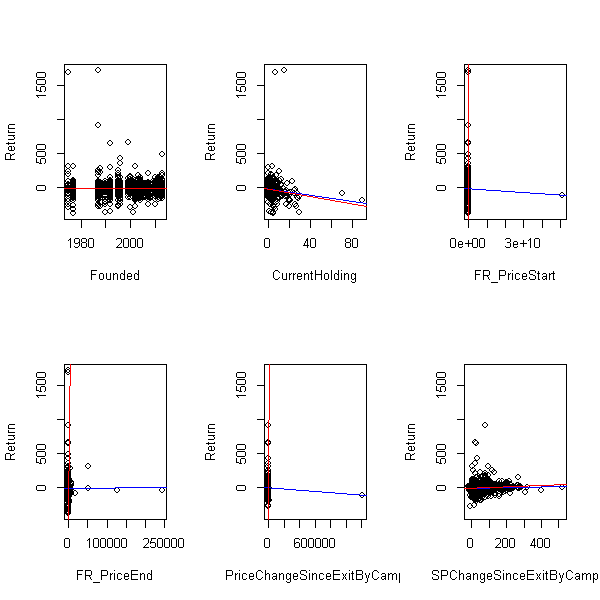

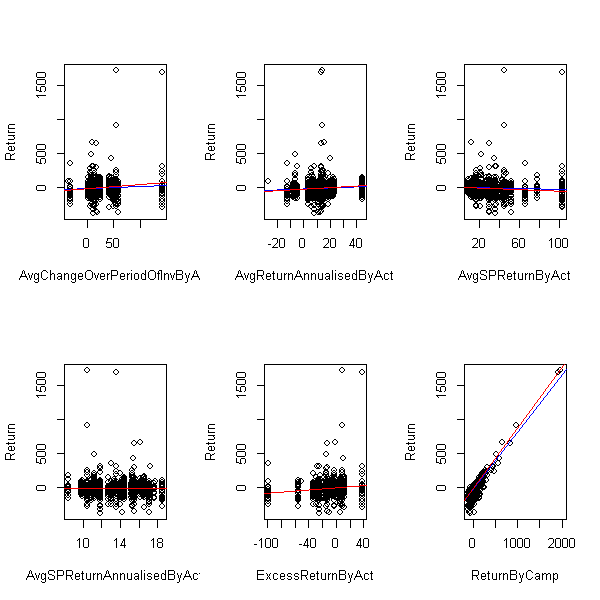

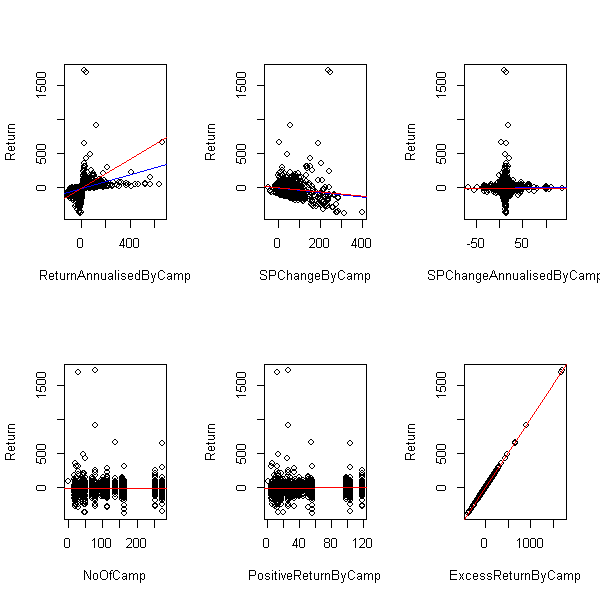

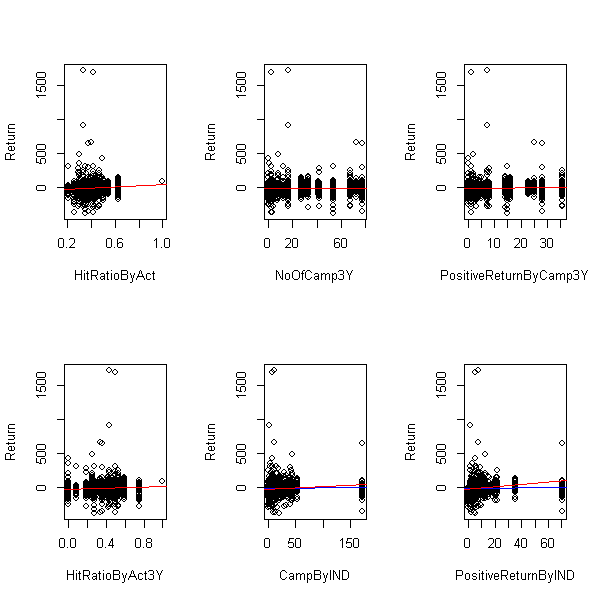

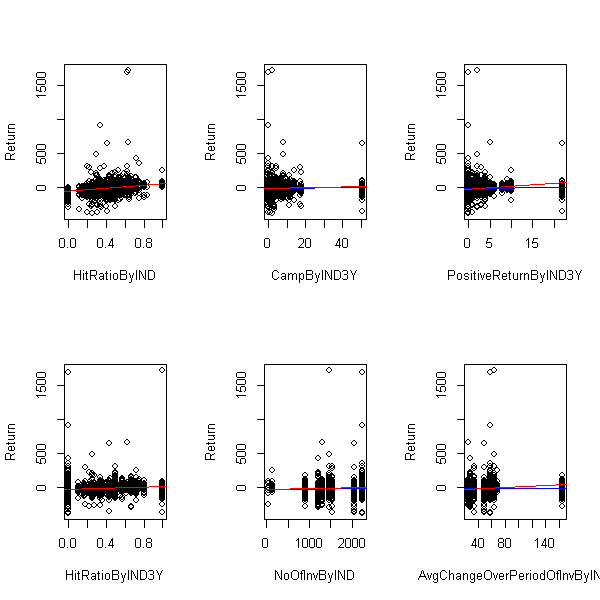

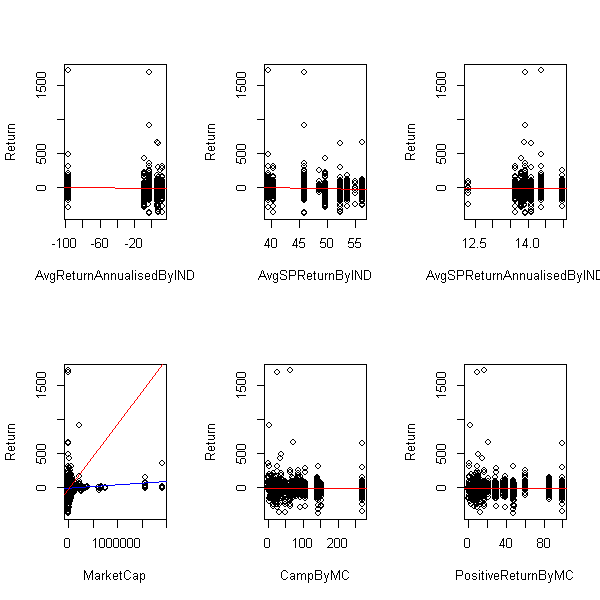

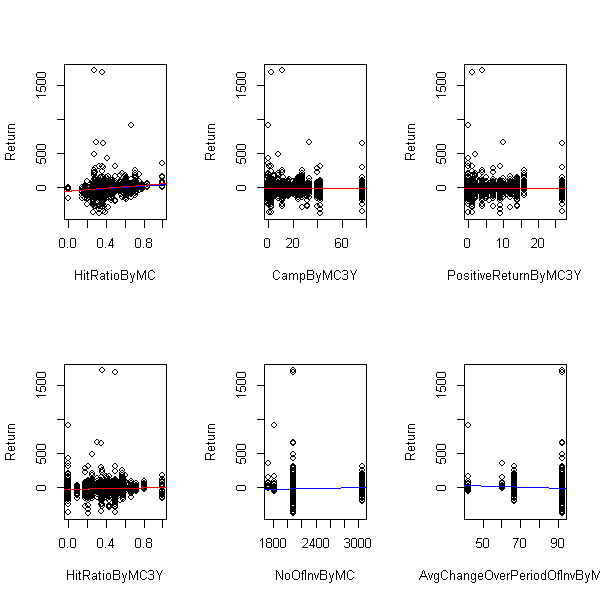

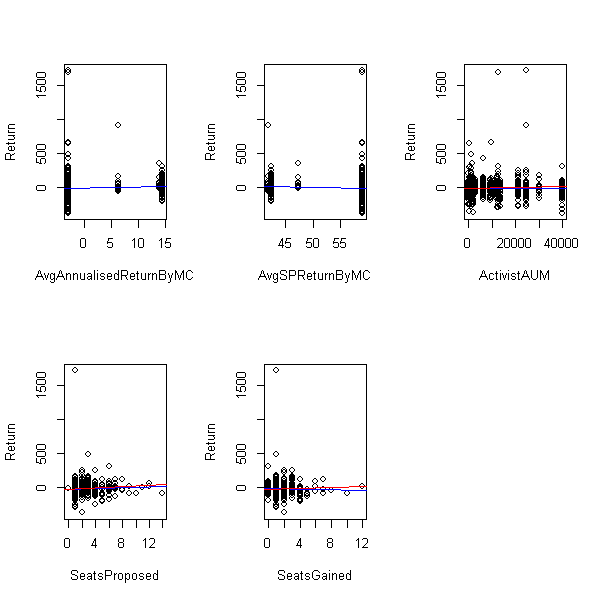

In [173]:
par(mfrow=c(2,3))
for (v in names(Activism_continuousV)){
            a1 <- min(df[[v]],na.rm=TRUE)
            a2 <- max(df[[v]],na.rm=TRUE)
            b1 <- df %>% select(ExcessReturnByCamp,v)   
            b2 <- df %>% select(ExcessReturnByCamp,v) %>% filter(df_outliers[[paste(v,'out',sep='_')]]==0) 
            plot (b1[[v]],b1$ExcessReturnByCamp,xlab=v,ylab='Return',xlim=c(a1,a2))
            abline(coef(lm(b1$ExcessReturnByCamp~b1[[v]])), col='blue')
            if (length(unique(b2[[v]]))!=1){
            abline(coef(lm(b2$ExcessReturnByCamp~b2[[v]])), col = "red")}
    }

### Correlation matrix - Y + X(with outleirs) &  X(without outliers)

In [19]:
l1 <- setdiff(names(Activism_continuousV), "ExcessReturnByCamp")
l1

[1] "Founded"                       "CurrentHolding"               
 [3] "FR_PriceStart"                 "FR_PriceEnd"                  
 [5] "PriceChangeSinceExitByCamp"    "SPChangeSinceExitByCamp"      
 [7] "AvgChangeOverPeriodOfInvByAct" "AvgReturnAnnualisedByAct"     
 [9] "AvgSPReturnByAct"              "AvgSPReturnAnnualisedByAct"   
[11] "ExcessReturnByAct"             "ReturnByCamp"                 
[13] "ReturnAnnualisedByCamp"        "SPChangeByCamp"               
[15] "SPChangeAnnualisedByCamp"      "NoOfCamp"                     
[17] "PositiveReturnByCamp"          "HitRatioByAct"                
[19] "NoOfCamp3Y"                    "PositiveReturnByCamp3Y"       
[21] "HitRatioByAct3Y"               "CampByIND"                    
[23] "PositiveReturnByIND"           "HitRatioByIND"                
[25] "CampByIND3Y"                   "PositiveReturnByIND3Y"        
[27] "HitRatioByIND3Y"               "NoOfInvByIND"                 
[29] "AvgChangeOverPeriodOfInvByIND" "AvgReturnAnnualisedByIND"     
[31] "AvgSPReturnByIND"              "AvgSPReturnAnnualisedByIND"   
[33] "MarketCap"                     "CampByMC"                     
[35] "PositiveReturnByMC"            "HitRatioByMC"                 
[37] "CampByMC3Y"                    "PositiveReturnByMC3Y"         
[39] "HitRatioByMC3Y"                "NoOfInvByMC"                  
[41] "AvgChangeOverPeriodOfInvByMC"  "AvgAnnualisedReturnByMC"      
[43] "AvgSPReturnByMC"               "ActivistAUM"                  
[45] "SeatsProposed"                 "SeatsGained"

In [20]:
## function which takes a dataframe and a vector of names and transforms outliers to NA
## at the features which are in the vector
outlierRepNAMatrix <- function(data,vec,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]]) & (v %in% vec)) {
            med <- median(data[[v]],na.rm = TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]]  > outhigh ,NA,data[[v]])
            outdata[v] <- mv
        } else {
            outdata[v] <- data[[v]]
        }
    }
    return(outdata)
}

In [21]:
df.noout <- outlierRepNAMatrix(df,l1)
df.noout <- df.noout[,! names(df.noout) %in% c('row1')]

In [115]:
if(!require(float)) {install.packages("float");require(float)}

res <- NULL

for(i in names(Activism_continuousV)) {
     rw <- NULL
     rw <- cbind(rw,cor.test(x=df[[i]],y=df$ExcessReturnByCamp,method="spearman")$estimate)
     rw_pv <- cbind(rw,cor.test(x=df[[i]],y=df$ExcessReturnByCamp,method="spearman")$p.value)
    rwo <- cbind(rw_pv,cor.test(x=df.noout[[i]],y=df$ExcessReturnByCamp,method="spearman")$estimate)
    rwo_pv <- cbind(rwo,cor.test(x=df.noout[[i]],y=df$ExcessReturnByCamp,method="spearman")$p.value)
#   diff <- cbind(rwo,1-as.vector(rwo)/as.vector(rw))
#   drop <- cbind(diff, if (diff > 0.3) {'No'} else {'yes'})
    res <- rbind(res,rwo_pv)
    
}
row.names(res) <- names(Activism_continuousV)
colnames(res) <- c('with','pv_w','without','pv_wo')


Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessR

Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method 

Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method 

In [243]:
res <- as.data.frame(res)
res$diff <- 1- abs(res$without/-res$with)
res$cor.drop <- ifelse(abs(res$diff) >= 0.3,'No',ifelse (is.na(res$diff),'No','Yes'))
res$dis.drop <- c('Yes','Yes','Yes','Yes','Yes','Yes','No','No','No','Yes','Yes','Yes',
                  'Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes',
                  'Yes','Yes','Yes','Yes','Yes','Yes','No','No','Yes','Yes','Yes','Yes',
                  'Yes','Yes','No','Yes','Yes','No','No','No','No','Yes','Yes','Yes')
res$drop <- ifelse( (res$cor.drop == 'No'| is.na(res$cor.drop)) & res$dis.drop == 'No', 'Leave','Drop')

res

,with,pv_w,without,pv_wo,diff,cor.drop,dis.drop,drop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Founded,0.094932459,1.271978e-05,0.094932459,1.271978e-05,0.000000000,Yes,Yes,Drop
CurrentHolding,-0.330842312,2.588147e-12,-0.260615768,1.432877e-07,0.212265907,Yes,Yes,Drop
FR_PriceStart,0.029251271,1.795363e-01,0.056091460,1.431941e-02,-0.917573447,No,Yes,Drop
FR_PriceEnd,0.310643446,2.295118e-48,0.337247183,2.317149e-52,-0.085640747,Yes,Yes,Drop
PriceChangeSinceExitByCamp,0.135044317,1.059902e-07,0.156141210,2.923958e-09,-0.156222000,Yes,Yes,Drop
SPChangeSinceExitByCamp,0.072724625,6.258073e-03,0.069354123,1.107207e-02,0.046346084,Yes,Yes,Drop
AvgChangeOverPeriodOfInvByAct,0.054195876,1.284438e-02,0.088680133,2.133034e-04,-0.636289335,No,No,Leave
AvgReturnAnnualisedByAct,0.175590001,4.727128e-16,0.112015468,1.458575e-06,0.362062378,No,No,Leave
AvgSPReturnByAct,-0.130374667,1.894907e-09,-0.118260202,9.649613e-08,0.092920389,Yes,No,Drop


In [377]:
res$drop <- factor(res$drop)

### Cleansed dataset for Outliers

In [308]:
summary(df.noout)

  Investor.ID     Activist          ActivistHQ        ActivistRegion    
 1731   : 275   Length:2184        Length:2184        Length:2184       
 6071   : 253   Class :character   Class :character   Class :character  
 5760   : 162   Mode  :character   Mode  :character   Mode  :character  
 5565   : 157                                                           
 5155   : 138                                                           
 7524   : 114                                                           
 (Other):1085                                                           
    Founded     FirstDateInvestedByActivisit CurrentHolding   StatusCurrent   
 Min.   :1975   Min.   :1997-06-20           Min.   : 0.000   Min.   :0.0000  
 1st Qu.:1992   1st Qu.:2013-05-15           1st Qu.: 0.175   1st Qu.:0.0000  
 Median :1999   Median :2015-09-24           Median : 1.985   Median :0.0000  
 Mean   :1998   Mean   :2015-05-30           Mean   : 3.177   Mean   :0.2271  
 3rd Qu.:2008   3rd Q

### Droping Outliers

In [627]:
for (v in rownames(res)){
    if(res[v,8] == 'Leave' ){
        print(v)
        print(table(df[[v]]))
   
}}


[1] "AvgChangeOverPeriodOfInvByAct"

-34.46 -31.62   2.81   6.55   6.68   7.75   8.65   8.81  10.16  10.19  11.29 
     1     20     71     96    113     44     24     71     24    138    162 
 11.95  12.11  14.39  14.49  17.21   17.3  17.97   19.7  21.59  25.41  41.84 
    22     70    253     47     34     25    275     48    101    157    114 
  45.7  47.02  48.81  54.27  54.68  57.79 141.94 
    51     27     21     78     18     50     29 
[1] "AvgReturnAnnualisedByAct"

-26.24 -12.33   -7.5  -6.42  -4.53   3.25   3.59   6.07   6.27   7.62      8 
     1     20     25     44     24     34     24    113     18     71    162 
 10.79  10.97   12.6  13.25  13.63  13.72  14.45  14.59   14.7  15.91  18.69 
    22     50     48    275     29    114     78     21    253    138     47 
 18.92  20.22  20.88   21.1  22.61  23.45  44.48 
    27     51     70     96    101     71    157 
[1] "AvgChangeOverPeriodOfInvByIND"

 26.18  27.07  29.07  34.49   49.7  58.61  65.02  69.13 165.56 
   203

In [656]:
Leave


,with,pv_w,without,pv_wo,diff,cor.drop,dis.drop,drop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
AvgChangeOverPeriodOfInvByIND,0.06852551,1.647881e-03,0.089436319,8.446198e-05,-0.3051537,No,No,Leave
CampByMC3Y,-0.02815485,1.964073e-01,-0.009528265,6.831893e-01,0.6615765,No,No,Leave
NoOfInvByMC,0.11587794,9.614784e-08,NA,NA,NA,NA,No,Leave
AvgChangeOverPeriodOfInvByMC,-0.19332961,3.441980e-19,NA,NA,NA,NA,No,Leave
AvgSPReturnByMC,-0.18970853,1.595731e-18,NA,NA,NA,NA,No,Leave


In [657]:
Drop <- res %>%
    rownames_to_column('rownames') %>%
    filter(drop=="Drop") %>%
    column_to_rownames('rownames')
Drop

,with,pv_w,without,pv_wo,diff,cor.drop,dis.drop,drop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Founded,0.09493246,1.271978e-05,0.094932459,1.271978e-05,0.000000000,Yes,Yes,Drop
CurrentHolding,-0.33084231,2.588147e-12,-0.260615768,1.432877e-07,0.212265907,Yes,Yes,Drop
FR_PriceStart,0.02925127,1.795363e-01,0.056091460,1.431941e-02,-0.917573447,No,Yes,Drop
FR_PriceEnd,0.31064345,2.295118e-48,0.337247183,2.317149e-52,-0.085640747,Yes,Yes,Drop
PriceChangeSinceExitByCamp,0.13504432,1.059902e-07,0.156141210,2.923958e-09,-0.156222000,Yes,Yes,Drop
SPChangeSinceExitByCamp,0.07272462,6.258073e-03,0.069354123,1.107207e-02,0.046346084,Yes,Yes,Drop
AvgSPReturnByAct,-0.13037467,1.894907e-09,-0.118260202,9.649613e-08,0.092920389,Yes,No,Drop
AvgSPReturnAnnualisedByAct,0.01584317,4.673187e-01,0.015843175,4.673187e-01,0.000000000,Yes,Yes,Drop
ExcessReturnByAct,0.15752192,3.549055e-13,0.156006824,1.404311e-12,0.009618316,Yes,Yes,Drop


In [862]:
 RES <- rbind(Drop,Leave)
RES

,with,pv_w,without,pv_wo,diff,cor.drop,dis.drop,drop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Founded,0.09493246,1.271978e-05,0.094932459,1.271978e-05,0.000000000,Yes,Yes,Drop
CurrentHolding,-0.33084231,2.588147e-12,-0.260615768,1.432877e-07,0.212265907,Yes,Yes,Drop
FR_PriceStart,0.02925127,1.795363e-01,0.056091460,1.431941e-02,-0.917573447,No,Yes,Drop
FR_PriceEnd,0.31064345,2.295118e-48,0.337247183,2.317149e-52,-0.085640747,Yes,Yes,Drop
PriceChangeSinceExitByCamp,0.13504432,1.059902e-07,0.156141210,2.923958e-09,-0.156222000,Yes,Yes,Drop
SPChangeSinceExitByCamp,0.07272462,6.258073e-03,0.069354123,1.107207e-02,0.046346084,Yes,Yes,Drop
AvgSPReturnByAct,-0.13037467,1.894907e-09,-0.118260202,9.649613e-08,0.092920389,Yes,No,Drop
AvgSPReturnAnnualisedByAct,0.01584317,4.673187e-01,0.015843175,4.673187e-01,0.000000000,Yes,Yes,Drop
ExcessReturnByAct,0.15752192,3.549055e-13,0.156006824,1.404311e-12,0.009618316,Yes,Yes,Drop


In [863]:
row_to_delete <- ('ExcessReturnByCamp')


RES <- RES[!(row.names(RES) %in% row_to_delete), ]

RES

,with,pv_w,without,pv_wo,diff,cor.drop,dis.drop,drop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Founded,0.09493246,1.271978e-05,0.094932459,1.271978e-05,0.000000000,Yes,Yes,Drop
CurrentHolding,-0.33084231,2.588147e-12,-0.260615768,1.432877e-07,0.212265907,Yes,Yes,Drop
FR_PriceStart,0.02925127,1.795363e-01,0.056091460,1.431941e-02,-0.917573447,No,Yes,Drop
FR_PriceEnd,0.31064345,2.295118e-48,0.337247183,2.317149e-52,-0.085640747,Yes,Yes,Drop
PriceChangeSinceExitByCamp,0.13504432,1.059902e-07,0.156141210,2.923958e-09,-0.156222000,Yes,Yes,Drop
SPChangeSinceExitByCamp,0.07272462,6.258073e-03,0.069354123,1.107207e-02,0.046346084,Yes,Yes,Drop
AvgSPReturnByAct,-0.13037467,1.894907e-09,-0.118260202,9.649613e-08,0.092920389,Yes,No,Drop
AvgSPReturnAnnualisedByAct,0.01584317,4.673187e-01,0.015843175,4.673187e-01,0.000000000,Yes,Yes,Drop
ExcessReturnByAct,0.15752192,3.549055e-13,0.156006824,1.404311e-12,0.009618316,Yes,Yes,Drop


In [208]:
out <- outlierMatrix(df)

Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning me

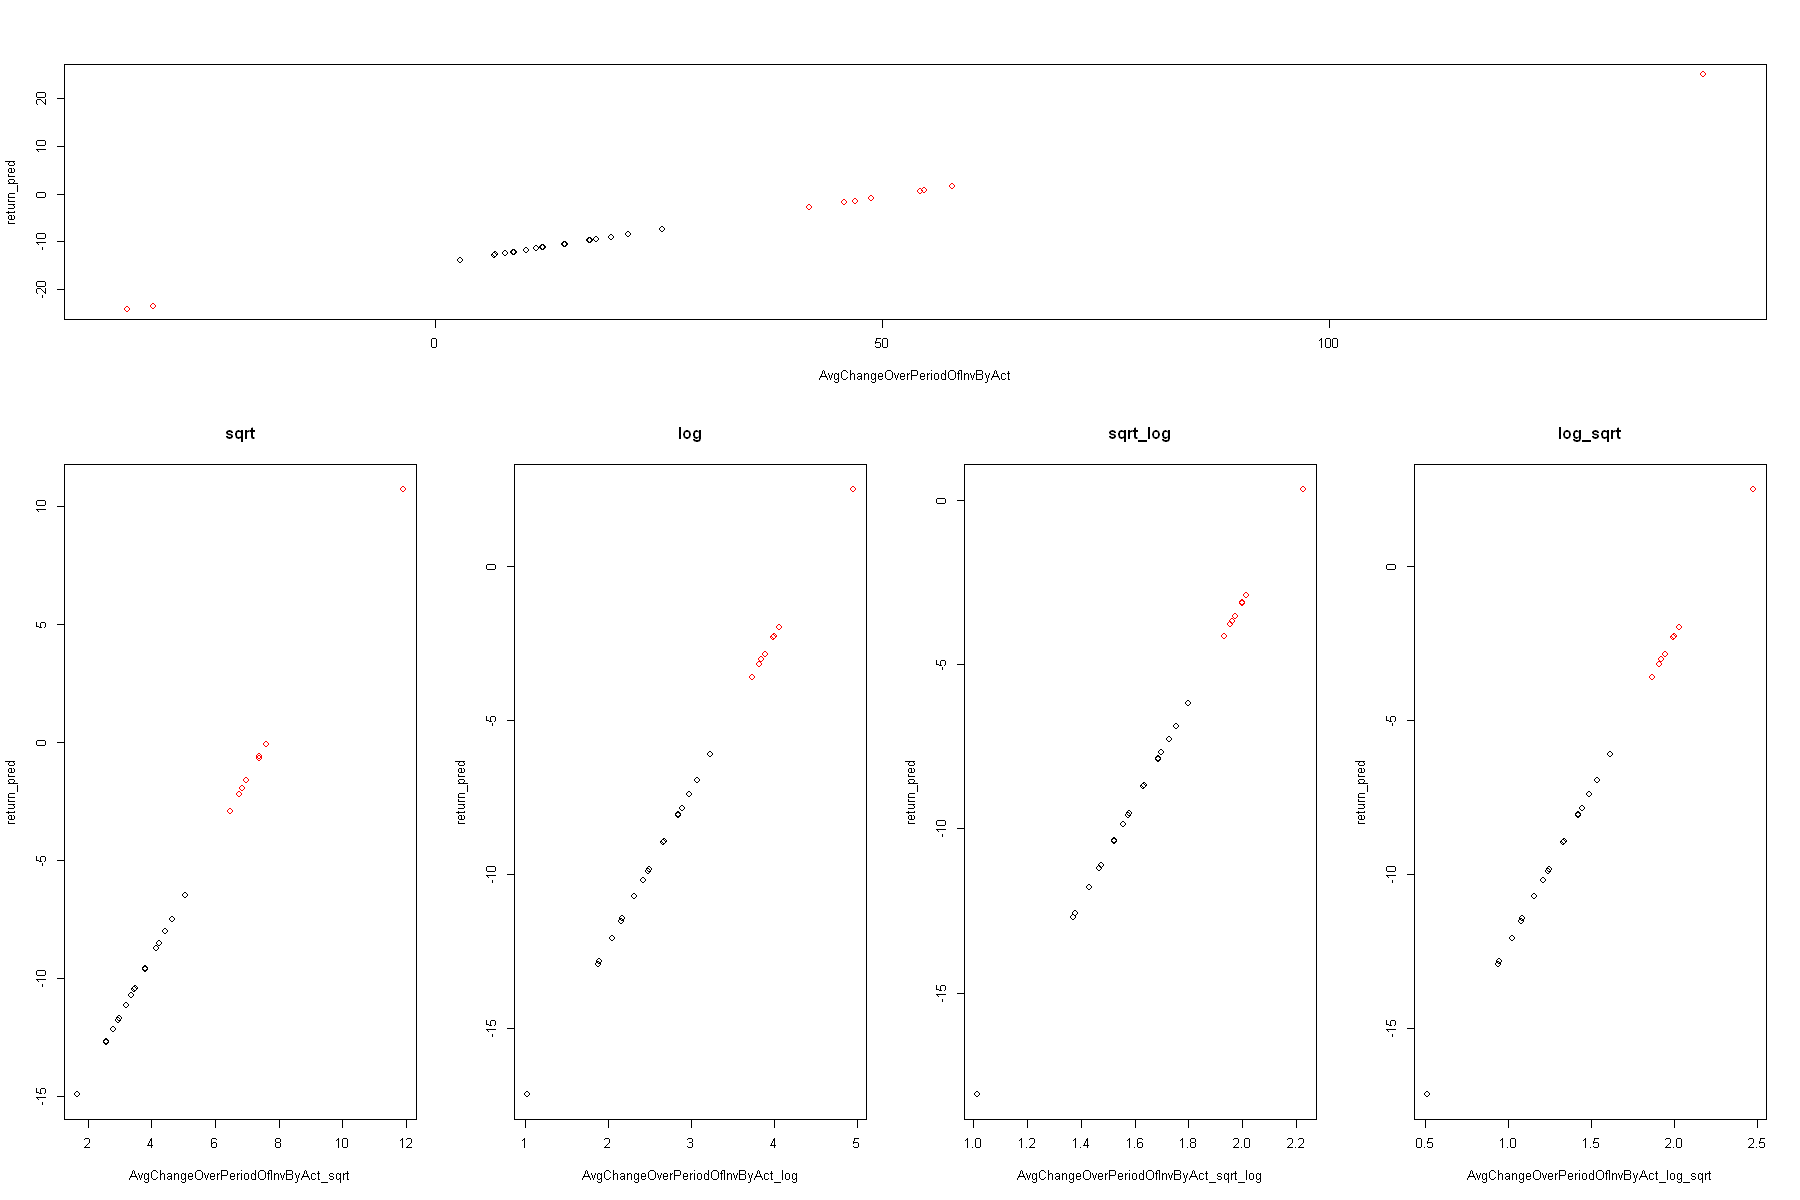

Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"


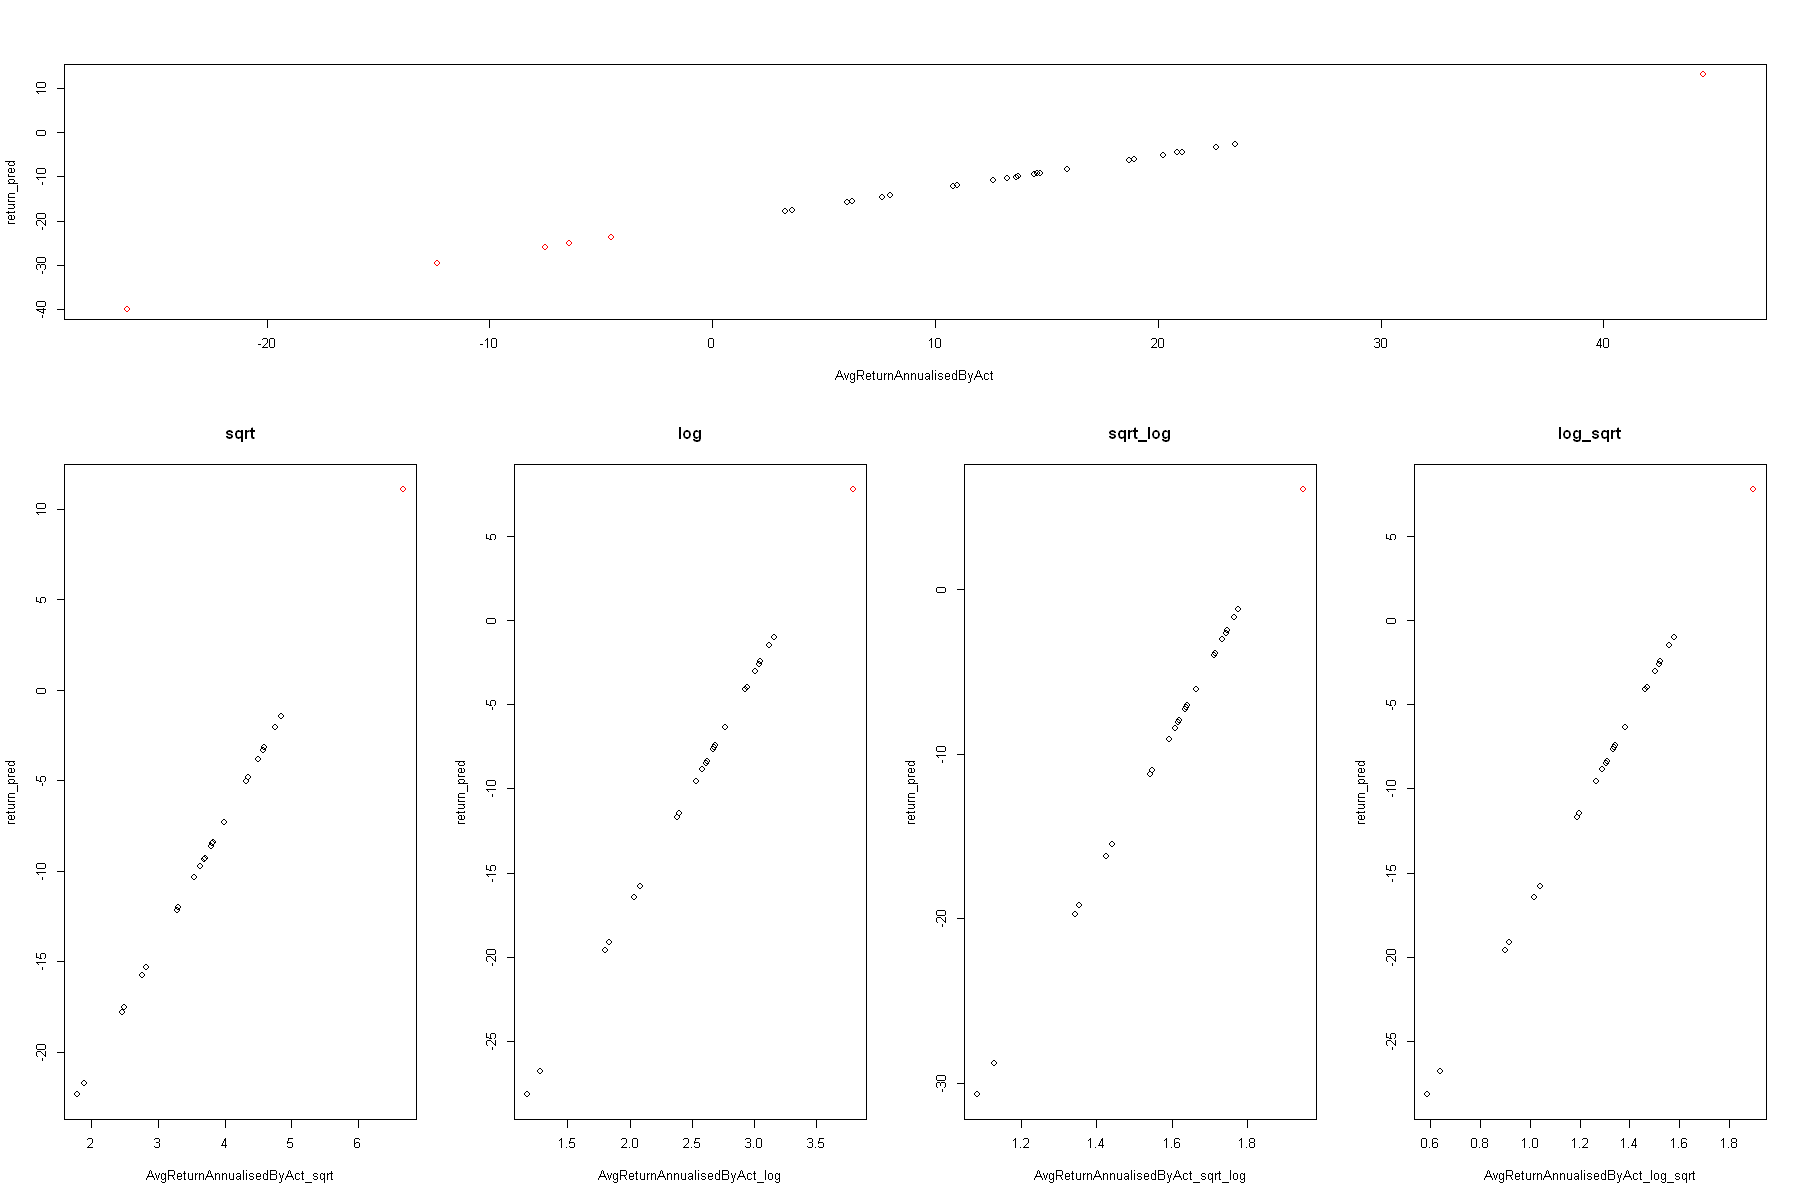

Warning message in sqrt(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in log(df[[v]]):
"NaNs produced"
Warning message in sqrt(df[[v]]):
"NaNs produced"


ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'x'


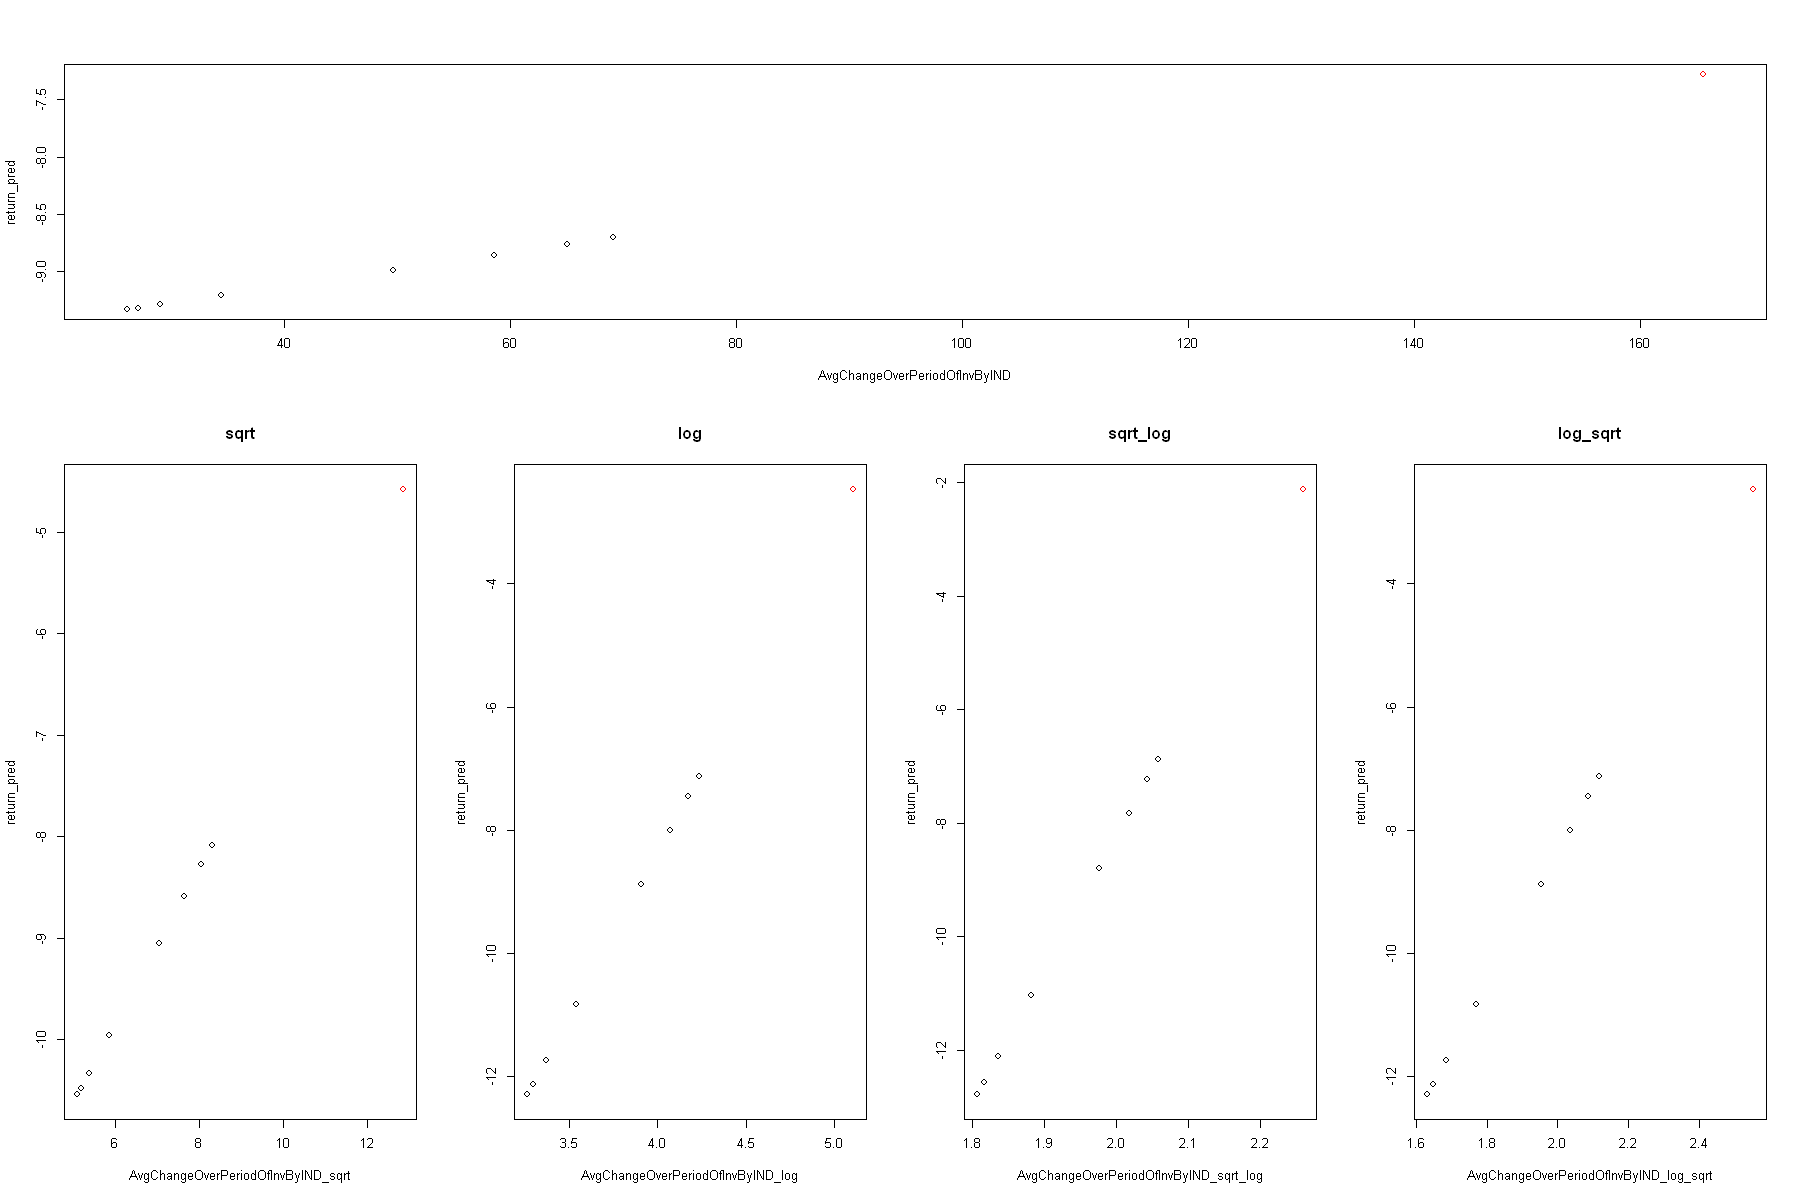

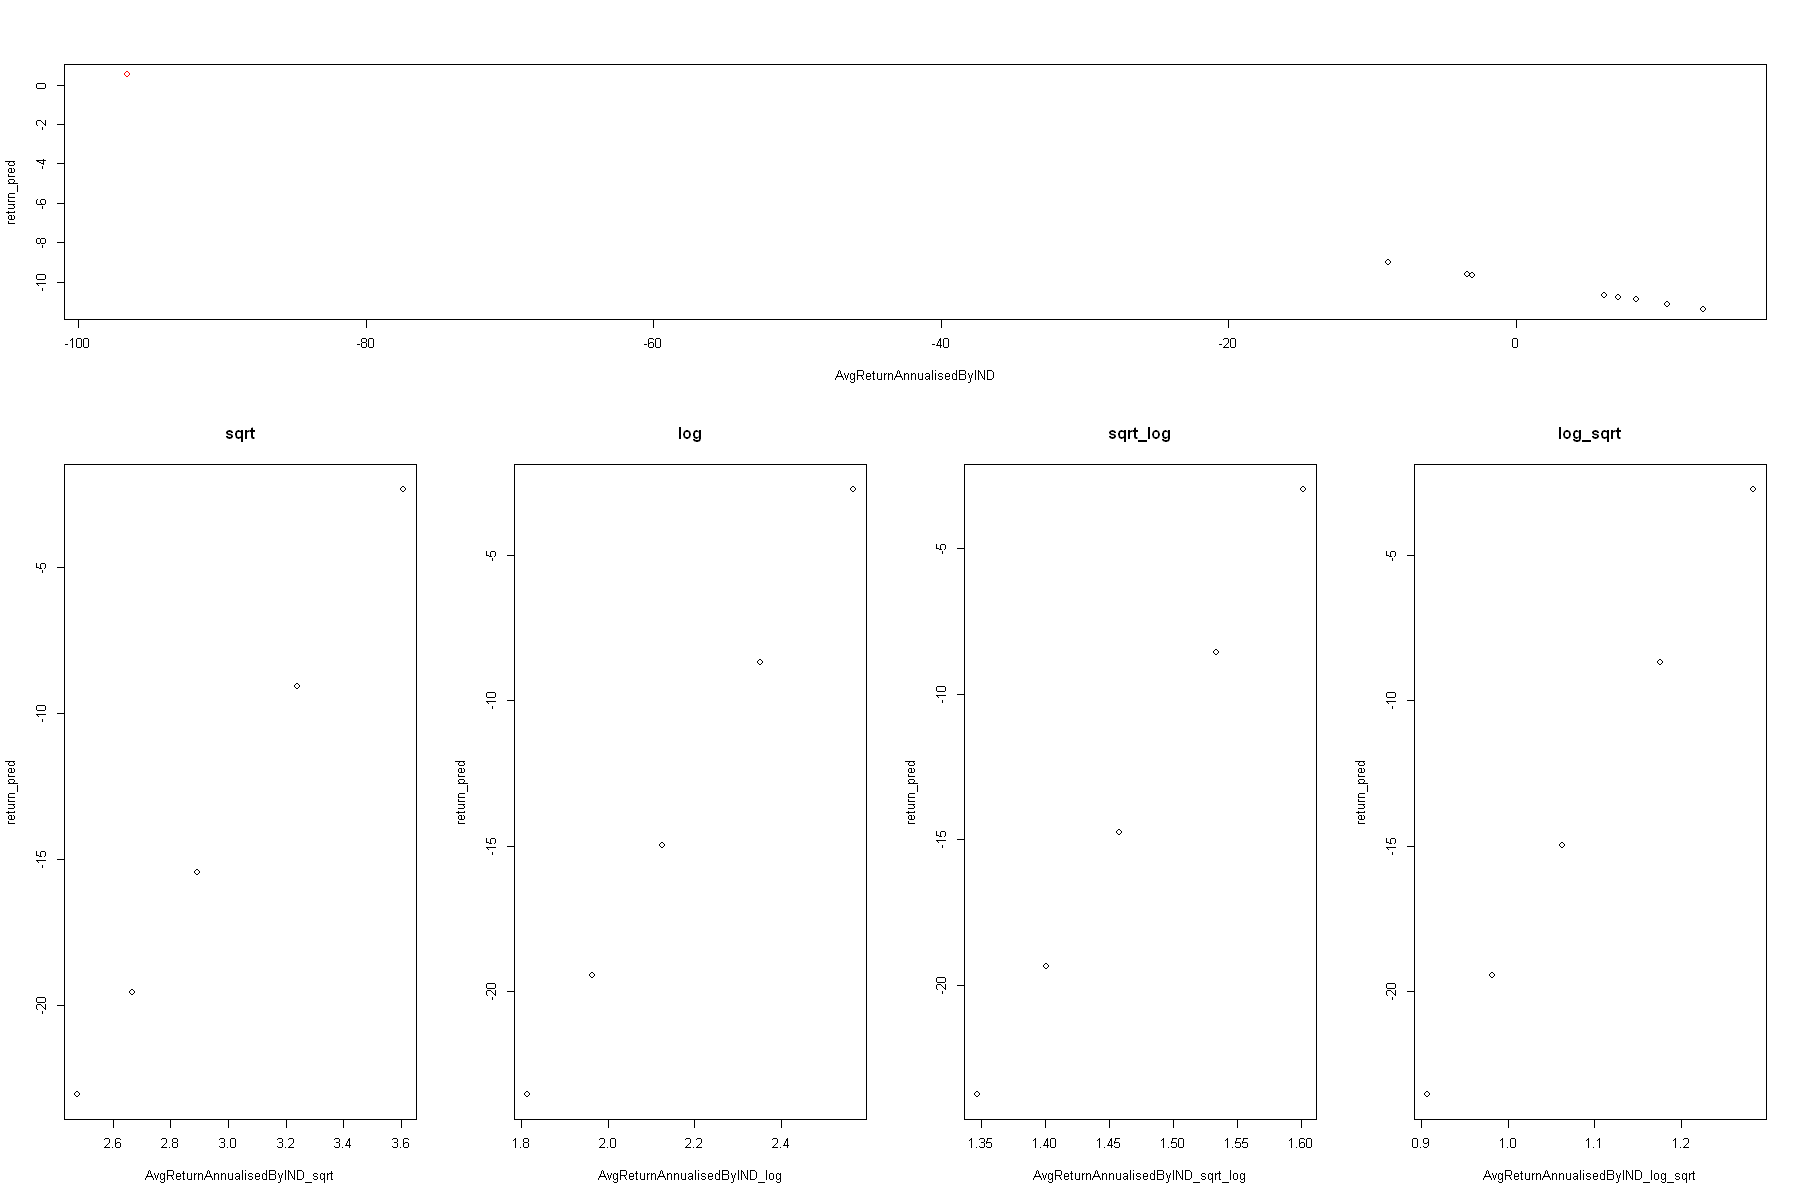

In [226]:
options(repr.plot.width = 15, repr.plot.height = 10)

layout(matrix(c(1, 1, 1, 1,
                2, 3, 4, 5,
                2, 3, 4, 5), nr=3, byrow=T))

for (v in rownames(Leave)){
    mod1 <- lm(df$ExcessReturnByCamp ~ df[[v]])
    pred1 <- predict(mod1,newdata=df,type="response")
    mod2 <- lm(df$ExcessReturnByCamp ~ sqrt(df[[v]]))
    pred2 <- predict(mod2,newdata=df,type="response")
    mod3 <- lm(df$ExcessReturnByCamp ~ log(df[[v]]))
    pred3 <- predict(mod3,newdata=df,type="response")
    mod4 <- lm(df$ExcessReturnByCamp ~ sqrt(log(df[[v]])))
    pred4 <- predict(mod4,newdata=df,type="response")
    mod5 <- lm(df$ExcessReturnByCamp ~ log(sqrt(df[[v]])))
    pred5 <- predict(mod5,newdata=df,type="response")

# Before transforming
p1 <- plot(df[[v]], pred1, col=factor(out[[paste0(v,"_out")]]) ,xlab=v,ylab="return_pred")

# sqrt transforming
p2 <- plot(sqrt(df[[v]]), pred2, col=factor(out[[paste0(v,"_out")]]),xlab=paste0(v,"_sqrt"),ylab="return_pred",main="sqrt")

# log transforming
p3 <- plot(log(df[[v]]), pred3, col=factor(out[[paste0(v,"_out")]]),xlab=paste0(v,"_log"),ylab="return_pred",main="log")

# sqrt_log transforming
p4 <- plot(sqrt(log(df[[v]])), pred4, col=factor(out[[paste0(v,"_out")]]),xlab=paste0(v,"_sqrt_log"),ylab="return_pred",main="sqrt_log")

# log_sqrt transforming
p5 <- plot(log(sqrt(df[[v]])), pred5, col=factor(out[[paste0(v,"_out")]]),xlab=paste0(v,"_log_sqrt"),ylab="return_pred",main="log_sqrt")

    
    
}

In [329]:
summary(log(df$AvgReturnAnnualisedByIND))
summary(sqrt(df$AvgReturnAnnualisedByIND))
summary(sqrt(log(df$AvgReturnAnnualisedByIND)))

Warning message in log(df$AvgReturnAnnualisedByIND):
"NaNs produced"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.815   1.963   2.125   2.168   2.566   2.566    1054 

Warning message in sqrt(df$AvgReturnAnnualisedByIND):
"NaNs produced"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.478   2.668   2.893   2.985   3.608   3.608    1054 

Warning message in log(df$AvgReturnAnnualisedByIND):
"NaNs produced"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.347   1.401   1.458   1.470   1.602   1.602    1054 

In [867]:
df_noout <- df
for (v in rownames(RES)){
    if(RES[v,8] == 'Leave'){
        df_noout[,v] <- log(df[[v]])
    }else if(RES[v,8] == 'Drop'){
        df_noout[,v] <- df.noout[[v]]
    }else{df_noout[,v] <-df[[v]]}
}
df_noout




Investor.ID,Activist,ActivistHQ,ActivistRegion,Founded,FirstDateInvestedByActivisit,CurrentHolding,StatusCurrent,StatusExisted,DateExited,...,SeatsGained,SeatsGainedMethod,Ongoing,WithdrewDemands,PartiallySuccessful,Successful,Unsuccessful,CompromiseOrSettlement,Unresolved,Buyer
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,...,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
449,Southeastern Asset Management,US,NorthAmerica,1975,2017-02-22,NA,0,1,2017-12-31,...,NA,N/A,No,No,No,Yes,No,No,No,NA
449,Southeastern Asset Management,US,NorthAmerica,1975,2018-08-15,NA,0,1,2019-12-31,...,NA,NA,No,No,No,No,No,No,No,NA
449,Southeastern Asset Management,US,NorthAmerica,1975,2012-01-20,NA,0,1,2014-02-14,...,NA,N/A,No,No,Yes,No,No,No,No,NA
449,Southeastern Asset Management,US,NorthAmerica,1975,2012-01-20,NA,0,1,2014-03-31,...,NA,N/A,No,Yes,No,No,No,No,No,NA
449,Southeastern Asset Management,US,NorthAmerica,1975,2008-12-22,NA,0,1,2014-07-02,...,NA,NA,No,No,No,No,No,No,No,Martin Marietta Materials Inc
449,Southeastern Asset Management,US,NorthAmerica,1975,2017-11-15,6.12,1,0,NA,...,1,Settlement,Yes,No,No,Yes,No,No,No,NA
449,Southeastern Asset Management,US,NorthAmerica,1975,2004-12-27,NA,0,1,2011-02-14,...,NA,NA,No,No,No,No,No,No,No,NA
449,Southeastern Asset Management,US,NorthAmerica,1975,2010-12-09,6.00,1,0,NA,...,NA,N/A,No,Yes,No,No,No,No,No,NA
449,Southeastern Asset Management,US,NorthAmerica,1975,2011-08-26,NA,1,0,NA,...,NA,NA,No,No,No,No,No,No,No,NA


In [826]:
### checking if the drop Succeeded

summary(df$MarketCap)
summary(df.noout$MarketCap)
summary(df_noout$MarketCap)
res['MarketCap',8] == 'Drop'

head(df$MarketCap)
head(df.noout$MarketCap)
head(df_noout$MarketCap)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0     718    3790   35213   17449 1927926      41 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   524.2  2499.0  6791.9  8160.8 42534.0     334 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   524.2  2499.0  6791.9  8160.8 42534.0     334 

[1] TRUE

[1]  1174  1982 13911 17491  2583 11919

[1]  1174  1982 13911 17491  2583 11919

[1]  1174  1982 13911 17491  2583 11919

## Missing values

In [695]:
getMissingness(df_noout)

list(var = c(19, 17, 188, 179, 178, 7, 73, 180, 23, 22), na_count = c(2019, 1989, 1934, 1876, 1865, 1786, 1704, 1557, 831, 730), rate = c(92.4, 91.1, 88.6, 85.9, 85.4, 81.8, 78, 71.3, 38, 33.4))This dataset has 0 (0%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
AH_PruchaseValueMnLocal,2019,92.4
AH_PricePerShareLocal,1989,91.1
Buyer,1934,88.6
SeatsGained,1876,85.9
SeatsProposed,1865,85.4
CurrentHolding,1786,81.8
ThirteenD,1704,78.0
SeatsGainedMethod,1557,71.3
SPChangeSinceExitByCamp,831,38.0


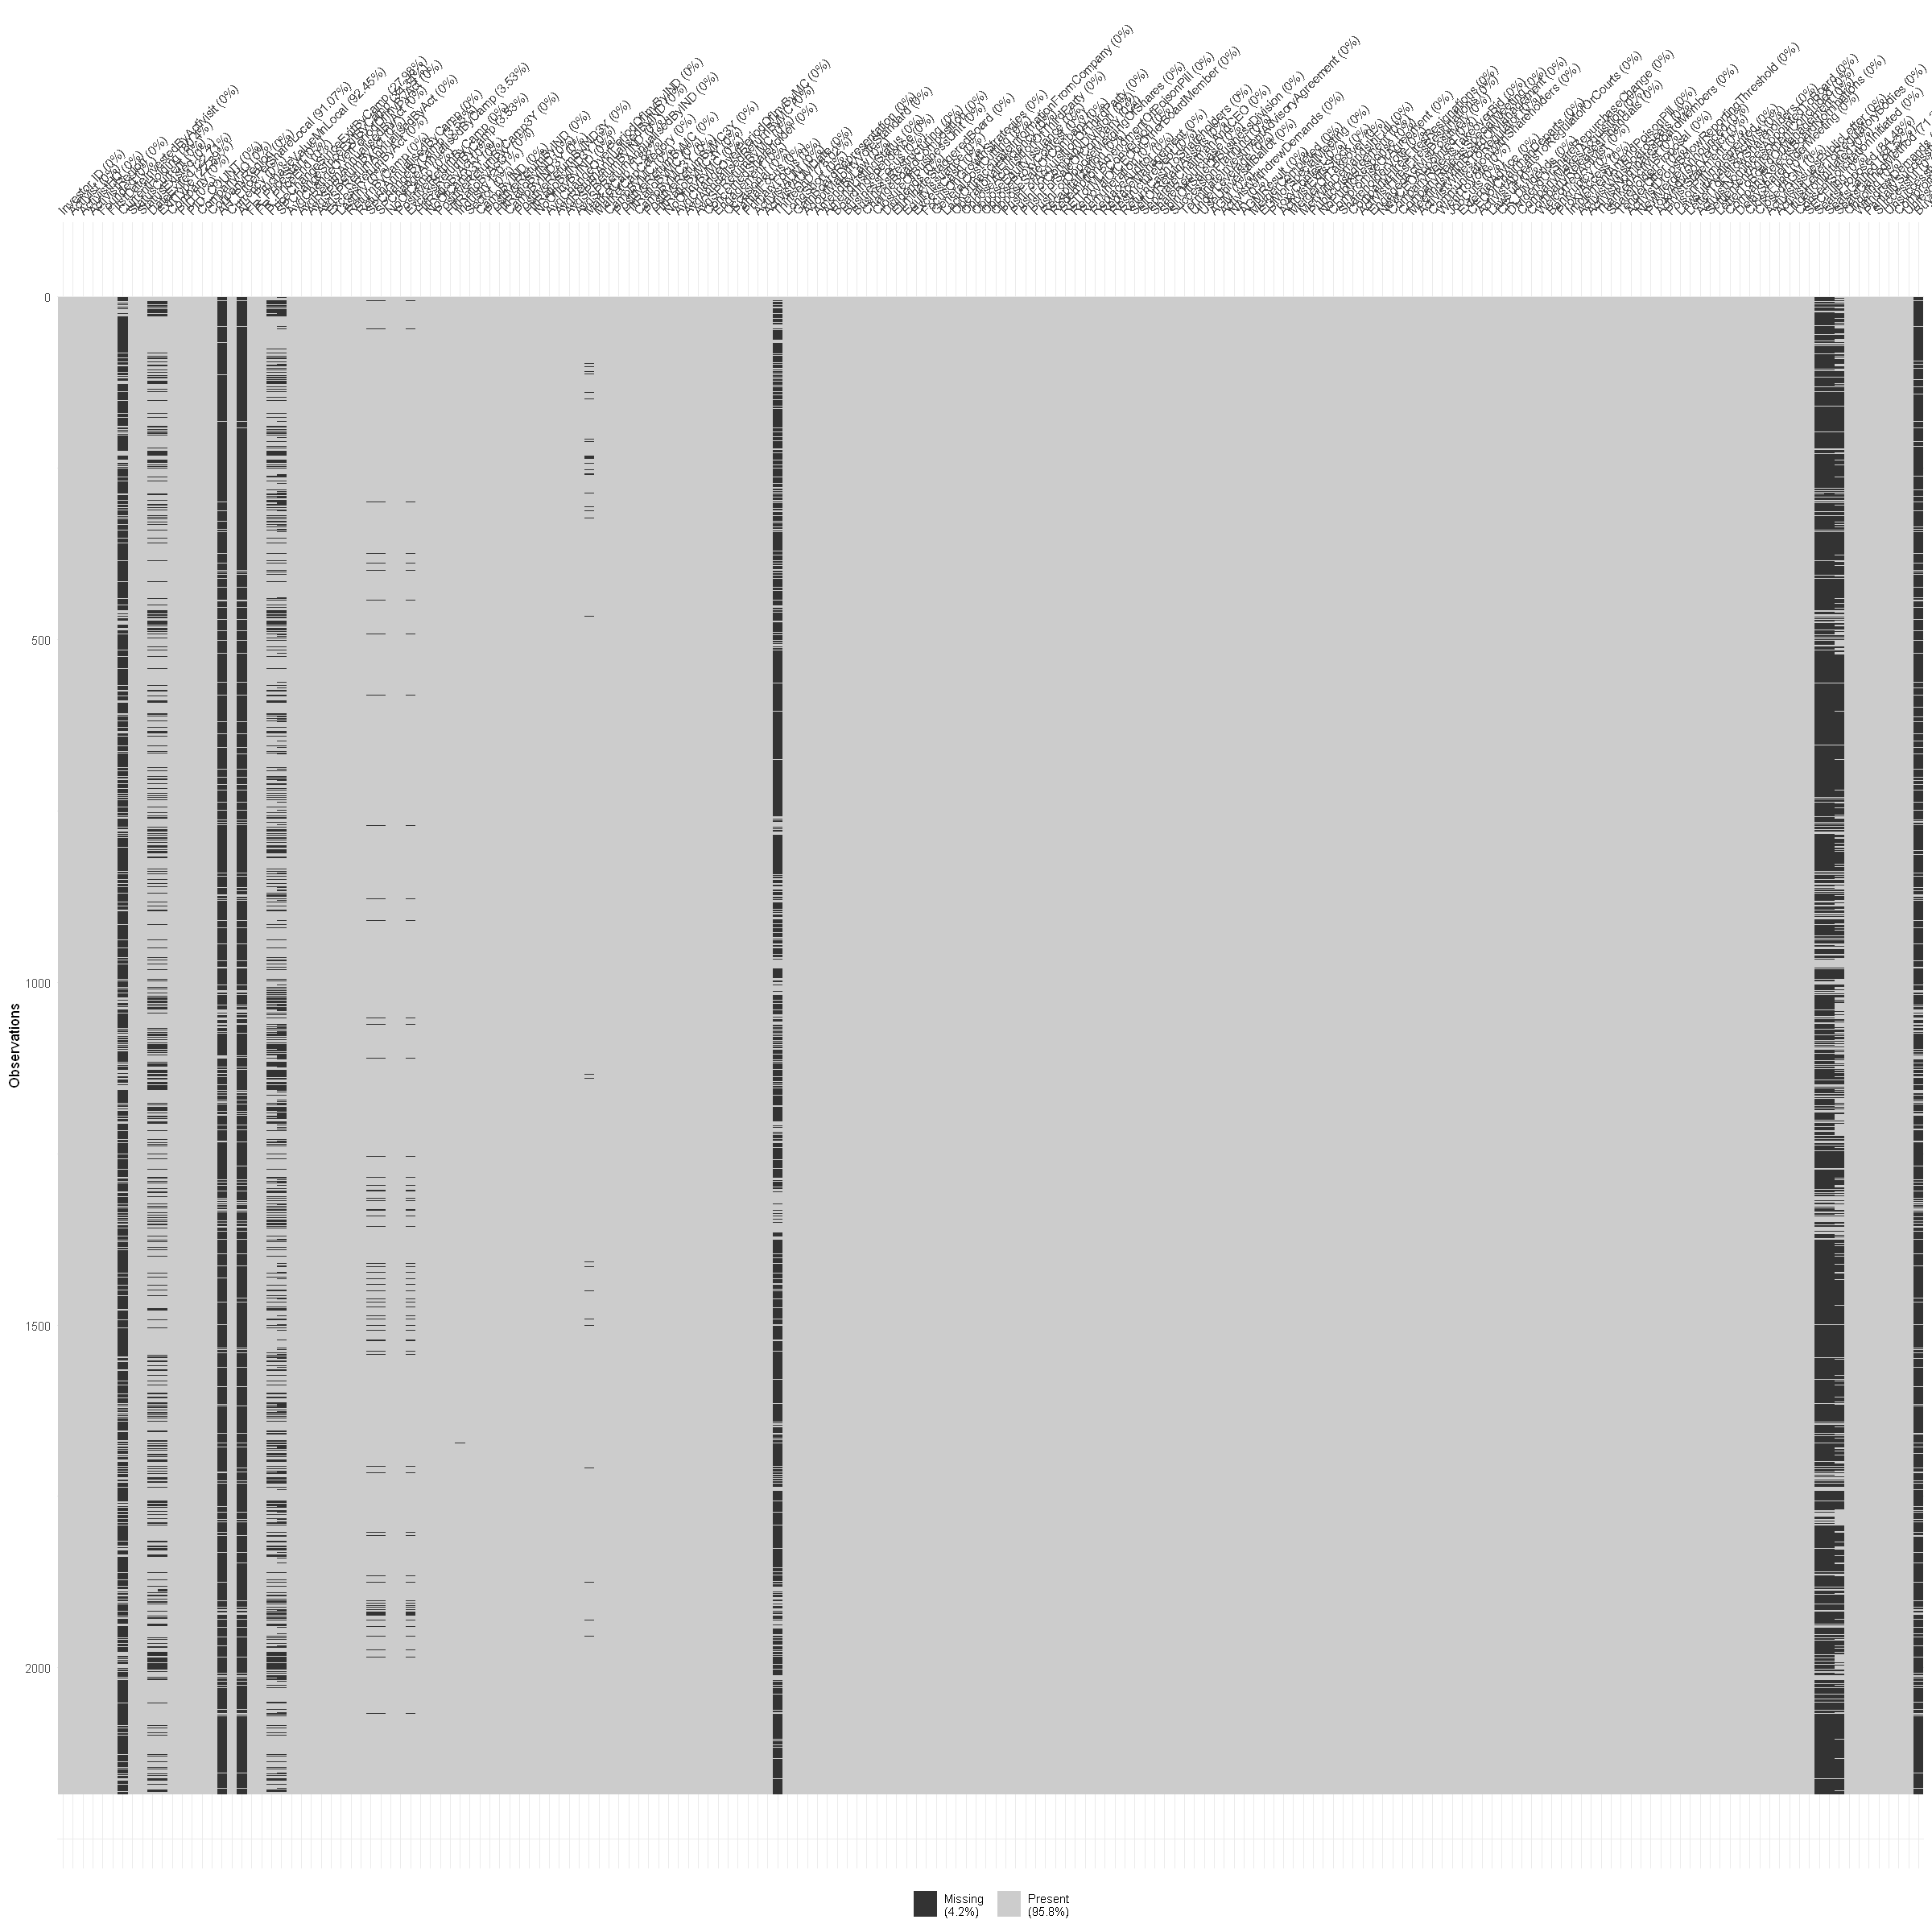

In [696]:
options(repr.plot.width = 20, repr.plot.height = 20)
vis_miss(df,warn_large_data=FALSE)

In [870]:
df.na <- df_noout

In [888]:
summary(df.na$ExcessReturnByCamp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-376.46  -31.98   -4.54   -8.88   12.78 1715.04      77 

#### Categorizing MNAR Variables

In [871]:
table(df.na$Buyer)


                                                       Diversified Real Asset Income Fund 
                                                                                        1 
                                                                          Zayo Group, LLC 
                                                                                        1 
                                                                                 AB InBev 
                                                                                        2 
                                                                                      ABB 
                                                                                        1 
                                                                      Abbott Laboratories 
                                                                                        2 
                                                                                   AbbVie

In [872]:
df.na$Buyer <- ifelse(is.na(df.na$Buyer),'miss',df.na$Buyer)
summary(df.na$Buyer)

   Length     Class      Mode 
     2184 character character 

In [873]:
table(df.na$SeatsGained)


  0   1   2   3 
 66 121  68  53 

In [874]:
df.na$SeatsGained <- ifelse(is.na(df.na$SeatsGained),'miss',df.na$SeatsGained)
table(df.na$SeatsGained)


   0    1    2    3 miss 
  66  121   68   53 1876 

In [875]:
table(df.na$SeatsProposed)


  0   1   2   3   4   5   6 
  1 116  67  71  33  12  19 

In [876]:
df.na$SeatsProposed <- ifelse(is.na(df.na$SeatsProposed),'miss',df.na$SeatsProposed)
table(df.na$SeatsProposed)


   0    1    2    3    4    5    6 miss 
   1  116   67   71   33   12   19 1865 

In [877]:
table(df.na$SeatsGainedMethod)


         N/A   Settlement Went to vote 
         328          260           39 

In [878]:
df.na$SeatsGainedMethod <- ifelse(is.na(df.na$SeatsGainedMethod) | df.na$SeatsGainedMethod == 'N/A','miss',df.na$SeatsGainedMethod)
table(df.na$SeatsGainedMethod)


        miss   Settlement Went to vote 
        1885          260           39 

In [879]:
table(df.na$ExitType)


            Acquired the Company                      Acquisition 
                               3                                2 
                      Bankruptcy   Company entered administration 
                               2                                1 
              Company Liquidated                         Delisted 
                              18                                5 
                        Demerger                           Merger 
                               1                               34 
           Purchased by Activist      Purchased by Listed Company 
                               3                              139 
    Purchased by Private Company Purchased by Private Equity Firm 
                              20                               51 
                     Sold Shares                    Stock Buyback 
                            1397                                3 
                   Taken Private                       Wound 

In [880]:
df.na$ExitType <- ifelse(is.na(df.na$ExitType),'miss',df.na$ExitType)
table(df.na$ExitType)


            Acquired the Company                      Acquisition 
                               3                                2 
                      Bankruptcy   Company entered administration 
                               2                                1 
              Company Liquidated                         Delisted 
                              18                                5 
                        Demerger                           Merger 
                               1                               34 
                            miss            Purchased by Activist 
                             500                                3 
     Purchased by Listed Company     Purchased by Private Company 
                             139                               20 
Purchased by Private Equity Firm                      Sold Shares 
                              51                             1397 
                   Stock Buyback                    Taken Pri

In [881]:
table(df.na$DateExited)


2006-02-03 2006-02-08 2006-02-17 2006-04-20 2006-05-12 2006-05-17 2006-06-28 
         1          1          1          1          2          1          1 
2006-10-13 2006-11-15 2007-01-24 2007-01-26 2007-02-01 2007-02-06 2007-03-28 
         1          1          1          1          1          1          1 
2007-05-09 2007-05-24 2007-06-29 2007-08-06 2007-08-10 2007-08-17 2007-10-01 
         1          1          1          1          1          1          1 
2007-10-31 2007-11-09 2007-11-30 2007-12-31 2008-01-03 2008-02-04 2008-02-29 
         1          1          1          1          1          1          2 
2008-03-13 2008-03-14 2008-04-09 2008-04-10 2008-04-15 2008-05-01 2008-07-25 
         1          1          1          1          1          1          1 
2008-11-24 2008-11-25 2008-11-28 2008-12-02 2008-12-09 2009-02-16 2009-03-06 
         1          1          1          1          1          1          1 
2009-03-19 2009-06-01 2009-07-10 2009-07-20 2009-08-12 2009-09-

In [882]:
table(year(df.na$DateExited))


2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 
  10   16   16   11   30   49   61  148  180  212  214  193  229  234   85 

In [883]:
df.na$DateExited <- ifelse(is.na(df.na$DateExited),'miss',year(df.na$DateExited))
table(df.na$DateExited)


2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 miss 
  10   16   16   11   30   49   61  148  180  212  214  193  229  234   85  496 

In [884]:

df.na %>% select (c(Company,Industry,Sector)) %>% filter(is.na(df.na$Industry))

Company,Industry,Sector
<chr>,<chr>,<chr>
AboveNet Inc,NA,Technology


In [885]:
df.na$Industry <- ifelse(is.na(df.na$Industry),'Software & Tech Services',df.na$Industry)

In [886]:
table(df.na$CurrentHolding)


    0  0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09   0.1  0.12  0.13 
   16    12    11     7    11     4     6     4     7     2     1     3     2 
 0.14  0.15  0.17  0.19   0.2  0.21  0.22  0.23  0.25  0.26  0.27  0.28  0.29 
    6     4     4     2     1     3     1     1     3     1     2     2     2 
  0.3  0.32  0.35  0.38  0.39   0.4  0.43  0.44   0.5  0.51  0.53  0.54  0.56 
    1     1     1     3     3     1     2     1     1     2     1     1     1 
 0.59  0.63  0.65  0.69   0.7  0.73  0.75  0.79  0.86  0.87   0.9  0.94  0.96 
    1     2     1     1     1     2     1     1     1     1     2     1     1 
    1  1.01  1.03  1.08  1.09   1.1  1.11  1.12  1.13  1.14  1.18   1.2  1.22 
    3     1     1     1     1     1     4     3     2     1     1     1     1 
 1.25  1.29   1.3  1.33  1.36  1.37  1.38   1.4  1.41  1.49  1.53  1.62  1.63 
    1     3     2     2     1     1     1     2     1     1     1     2     1 
 1.71  1.73  1.79  1.84  1.85  1.97     2  2.09   2

In [887]:
df.na$CurrentHolding <- ifelse(is.na(df.na$CurrentHolding),'miss',quantile(df.na$CurrentHolding, probs = seq(0, 1, 0.25)
                                                                     , na.rm = TRUE,names = TRUE))
table(df.na$CurrentHolding)



    0 0.175 1.985 14.43  4.99  miss 
   71    67    94    87    79  1786 

In [442]:
missing$missingness$var

[1] AH_PruchaseValueMnLocal       AH_PricePerShareLocal        
 [3] CurrentHolding                AvgAnnualisedReturnByMC      
 [5] ThirteenD                     AvgReturnAnnualisedByIND     
 [7] SPChangeSinceExitByCamp       PriceChangeSinceExitByCamp   
 [9] MarketCap                     SPChangeByCamp               
[11] SPChangeAnnualisedByCamp      PositiveReturnByIND          
[13] ReturnAnnualisedByCamp        ReturnByCamp                 
[15] AvgSPReturnAnnualisedByIND    FR_PriceStart                
[17] FR_PriceEnd                   CampByIND                    
[19] CampByIND3Y                   PositiveReturnByIND3Y        
[21] ActivistAUM                   AvgReturnAnnualisedByAct     
[23] AvgSPReturnByAct              ExcessReturnByCamp           
[25] ExcessReturnByAct             HitRatioByMC                 
[27] HitRatioByMC3Y                NoOfInvByIND                 
[29] HitRatioByIND                 AvgChangeOverPeriodOfInvByAct
[31] HitRatioByAct                 HitRatioByAct3Y              
[33] Industry                     
188 Levels: Investor.ID Activist ActivistHQ ActivistRegion ... Buyer

In [889]:
## remade the missing matrix to include the new missing values generated by the outliers treatment
df_na <- df.na
for(i in names(df.na)) {
    df_na[,i] <- ifelse(is.na(df_na[,i])==T,1,0)
}

In [890]:
df.na$ThirteenD <- as.Date(df.na$ThirteenD,"%Y-%m-%d")


In [891]:
missing <- getMissingness(df.na)
missing

list(var = c(19, 17, 73, 23, 22, 54, 32, 33, 44, 31), na_count = c(2019, 1989, 1704, 831, 730, 334, 317, 291, 226, 221), rate = c(92.4, 91.1, 78, 38, 33.4, 15.3, 14.5, 13.3, 10.3, 10.1))This dataset has 6 (0.3%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
AH_PruchaseValueMnLocal,2019,92.4
AH_PricePerShareLocal,1989,91.1
ThirteenD,1704,78.0
SPChangeSinceExitByCamp,831,38.0
PriceChangeSinceExitByCamp,730,33.4
MarketCap,334,15.3
SPChangeByCamp,317,14.5
SPChangeAnnualisedByCamp,291,13.3
PositiveReturnByIND,226,10.3


In [892]:
missing_70_pct <- function (data, getRows = FALSE) {
       l <- nrow(data)
      vn <- names(data)
    nadf <- data
     cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(rate >70)
    }
missing_70_pct <-missing_70_pct(df.na)
missing_70_pct

var,na.count,rate
<fct>,<dbl>,<dbl>
AH_PruchaseValueMnLocal,2019,92.4
AH_PricePerShareLocal,1989,91.1
ThirteenD,1704,78.0


In [849]:

drop <- missing_70_pct$var
df.na = df.na[,!(names(df.na) %in% drop)]

In [893]:
missing <- getMissingness(df.na)
missing

list(var = c(19, 17, 73, 23, 22, 54, 32, 33, 44, 31), na_count = c(2019, 1989, 1704, 831, 730, 334, 317, 291, 226, 221), rate = c(92.4, 91.1, 78, 38, 33.4, 15.3, 14.5, 13.3, 10.3, 10.1))This dataset has 6 (0.3%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
AH_PruchaseValueMnLocal,2019,92.4
AH_PricePerShareLocal,1989,91.1
ThirteenD,1704,78.0
SPChangeSinceExitByCamp,831,38.0
PriceChangeSinceExitByCamp,730,33.4
MarketCap,334,15.3
SPChangeByCamp,317,14.5
SPChangeAnnualisedByCamp,291,13.3
PositiveReturnByIND,226,10.3


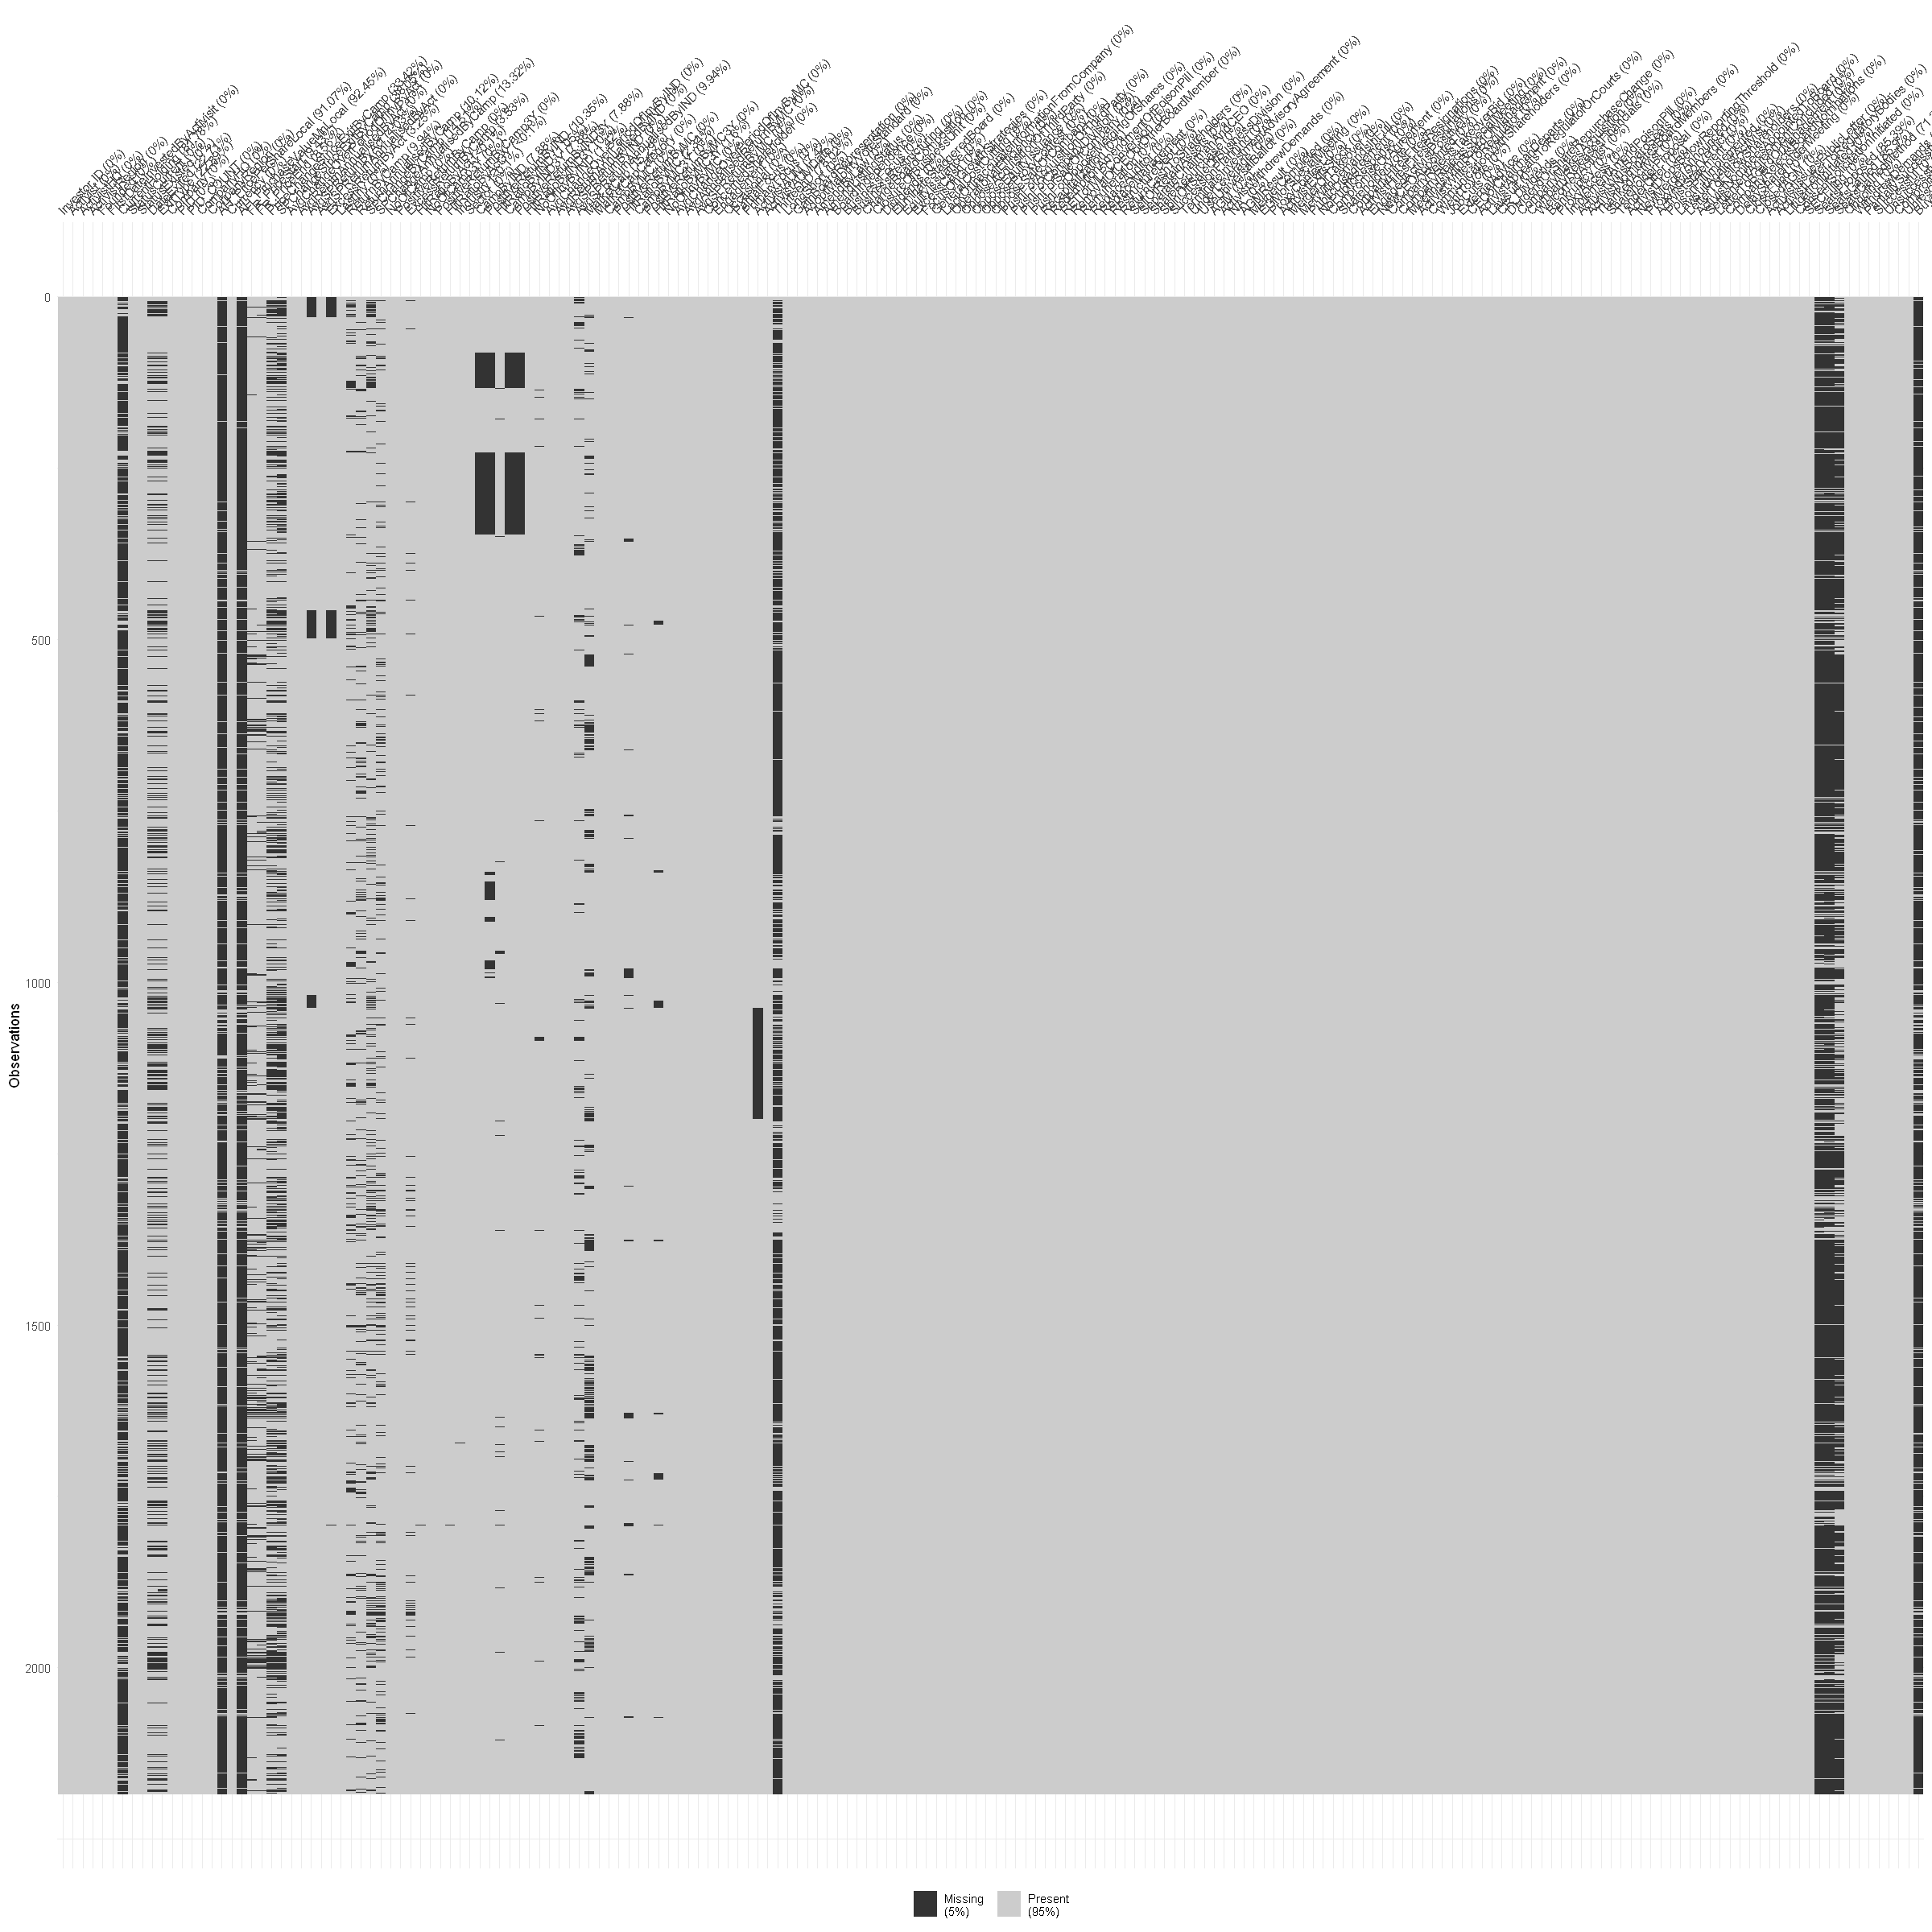

In [770]:
options(repr.plot.width = 20, repr.plot.height = 20)
vis_miss(df_noout, warn_large_data=FALSE)

## Determinate the Missingness Generation Mechanism
 
There are three mechanisms that generate Missing values:
 
1. Missing Completely at Random (MCAR)
2. Missing at Random (MAR)
3. Missing not at Random (MNAR)
 
We will investigate the missingness mechanisms using different techniques.


Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


[1] "AH_PruchaseValueMnLocal by NA AH_PricePerShareLocal"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 1.4174, df = 15.34, p-value = 0.1764
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4440.768 22172.848
sample estimates:
mean of x mean of y 
15759.733  6893.693 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


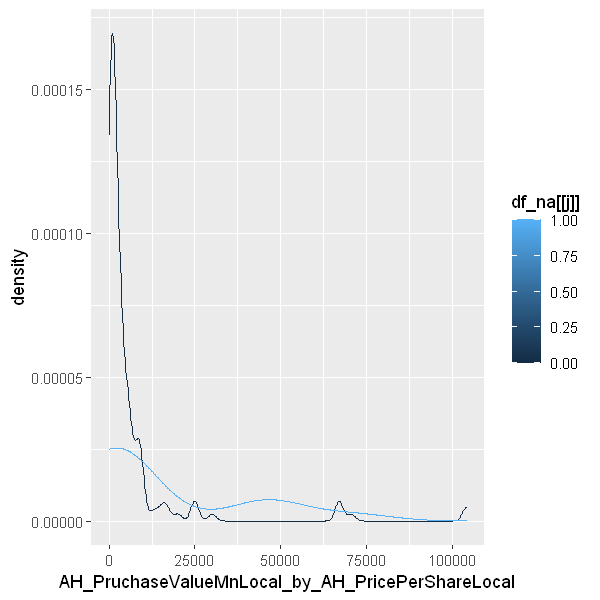

[1] "AH_PruchaseValueMnLocal by NA ThirteenD"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 2.0709, df = 120.22, p-value = 0.04051
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
   230.0204 10235.3368
sample estimates:
mean of x mean of y 
10141.614  4908.935 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


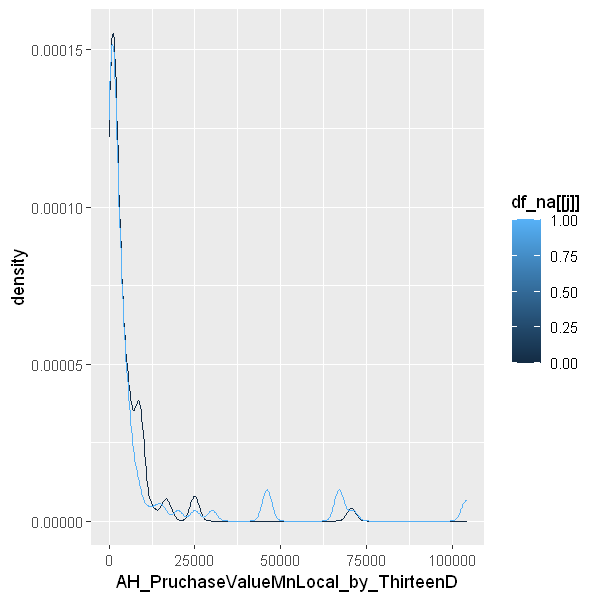

[1] "AH_PruchaseValueMnLocal by NA SPChangeSinceExitByCamp"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.015951, df = 75.799, p-value = 0.9873
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5279.733  5364.981
sample estimates:
mean of x mean of y 
 7708.738  7666.114 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


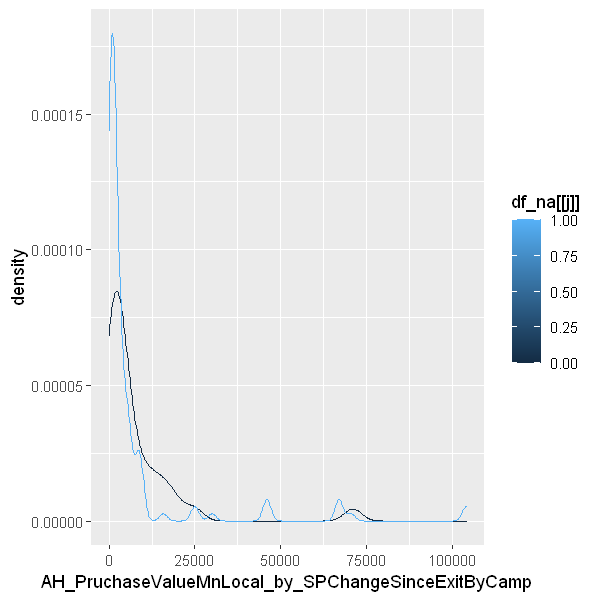

[1] "AH_PruchaseValueMnLocal by NA PriceChangeSinceExitByCamp"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -2.2803, df = 139.41, p-value = 0.02411
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10283.7078   -732.2772
sample estimates:
mean of x mean of y 
 4528.429 10036.421 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


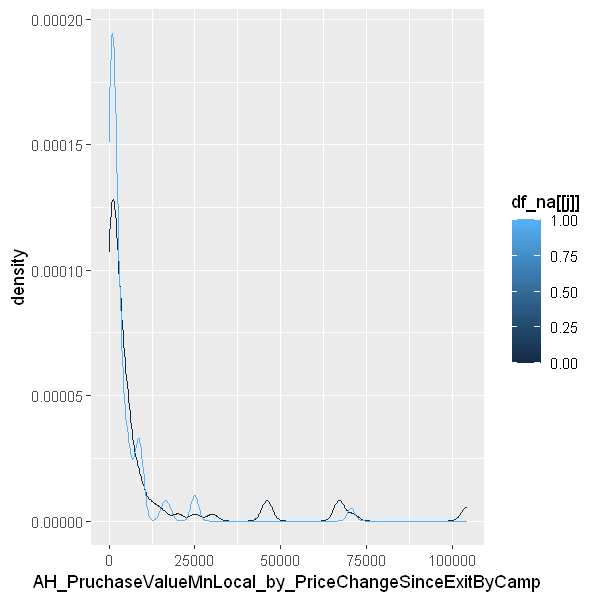

[1] "AH_PruchaseValueMnLocal by NA MarketCap"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 4.9206, df = 11.083, p-value = 0.0004465
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 27017.34 70676.26
sample estimates:
mean of x mean of y 
52994.000  4147.203 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


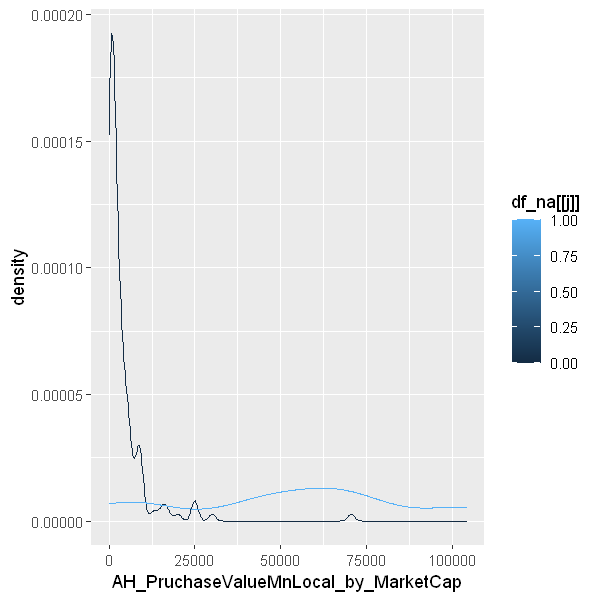

[1] "AH_PruchaseValueMnLocal by NA SPChangeByCamp"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -2.458, df = 160.96, p-value = 0.01503
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8441.6506  -920.1321
sample estimates:
mean of x mean of y 
 3983.353  8664.244 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


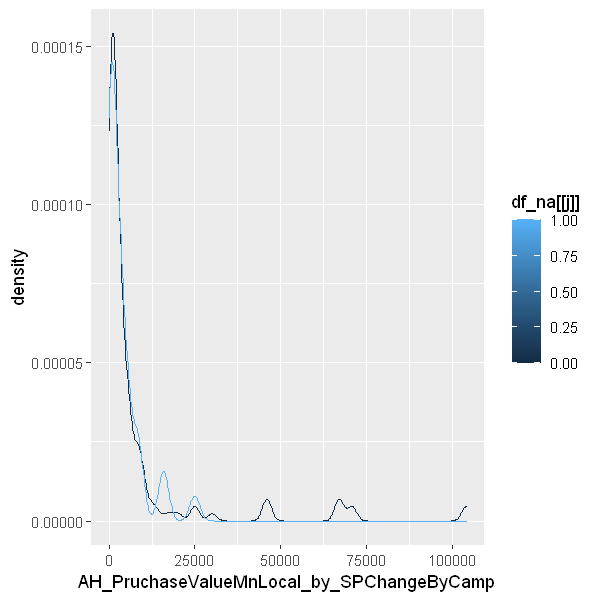

[1] "AH_PruchaseValueMnLocal by NA SPChangeAnnualisedByCamp"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -1.3415, df = 124.63, p-value = 0.1822
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7797.109  1497.278
sample estimates:
mean of x mean of y 
 5332.488  8482.403 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


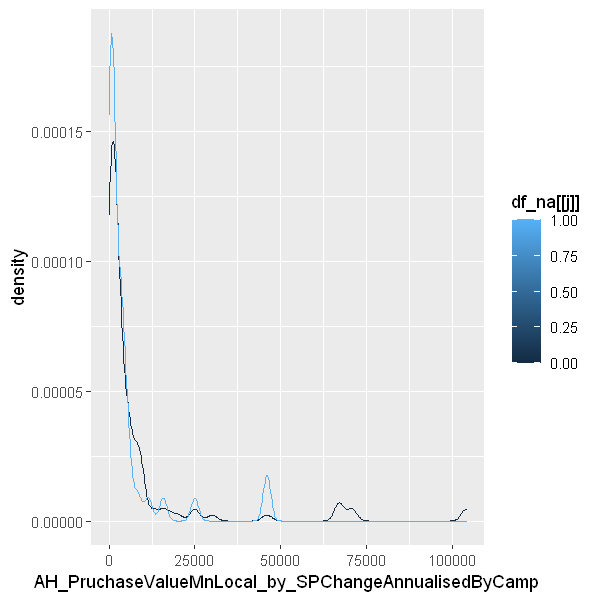

[1] "AH_PruchaseValueMnLocal by NA PositiveReturnByIND"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -4.6366, df = 162.52, p-value = 7.24e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9763.320 -3931.031
sample estimates:
mean of x mean of y 
 1309.000  8156.175 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


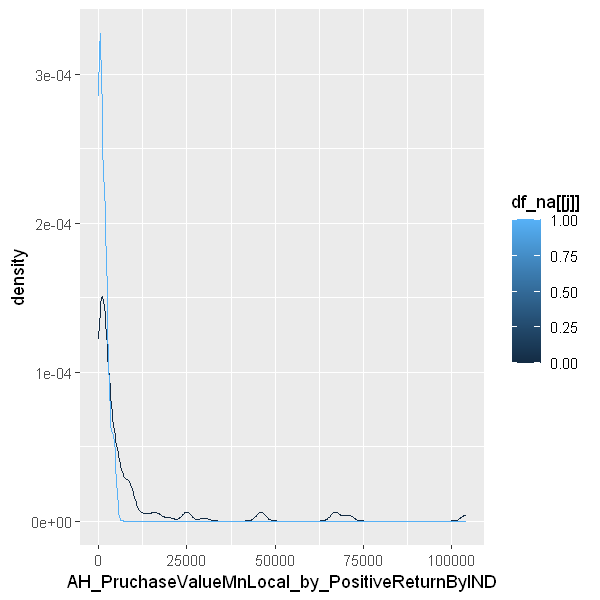

[1] "AH_PruchaseValueMnLocal by NA ReturnAnnualisedByCamp"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -1.607, df = 79.075, p-value = 0.112
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7403.9891   789.0783
sample estimates:
mean of x mean of y 
 4813.190  8120.646 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


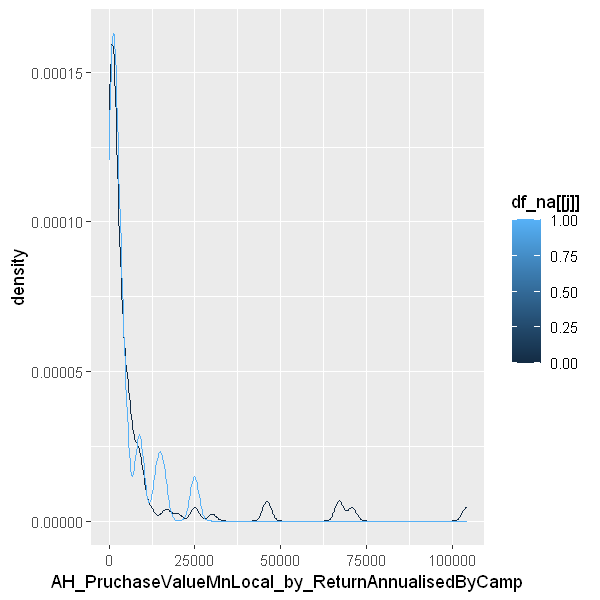

[1] "AH_PruchaseValueMnLocal by NA ReturnByCamp"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -1.3774, df = 41.624, p-value = 0.1758
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7489.786  1414.199
sample estimates:
mean of x mean of y 
 4938.067  7975.860 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


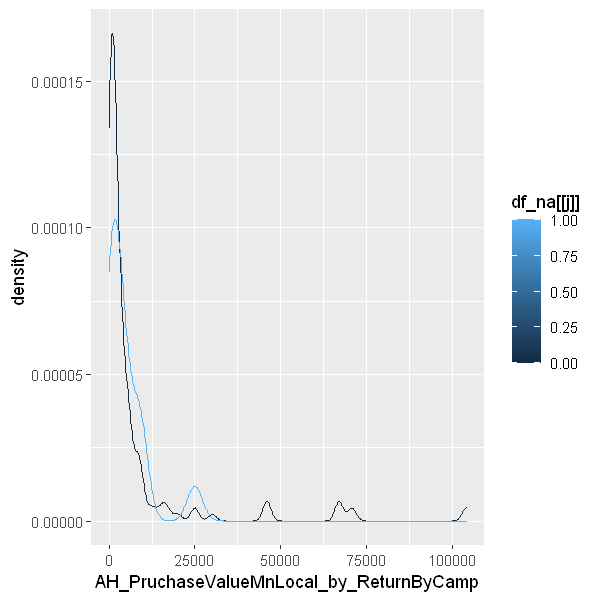

[1] "AH_PruchaseValueMnLocal by NA AvgSPReturnAnnualisedByIND"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -2.4441, df = 29.405, p-value = 0.02075
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7989.9443  -712.2255
sample estimates:
mean of x mean of y 
 3506.833  7857.918 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


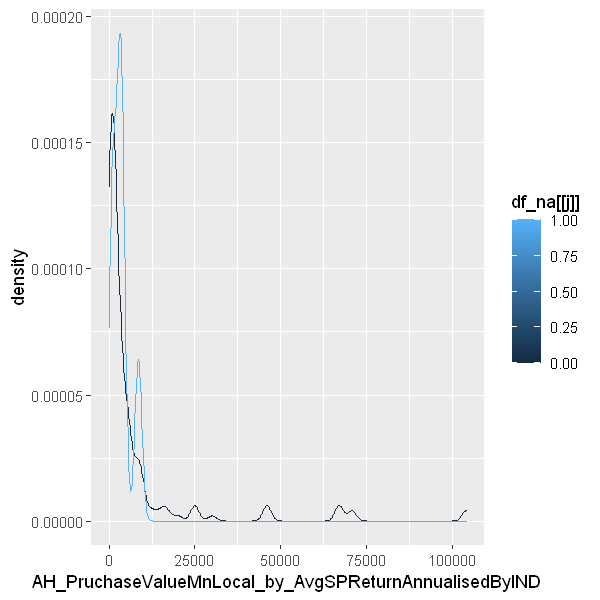

[1] "AH_PruchaseValueMnLocal by NA FR_PriceStart"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -1.2916, df = 17.191, p-value = 0.2136
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7843.901  1883.782
sample estimates:
mean of x mean of y 
 4864.125  7844.185 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


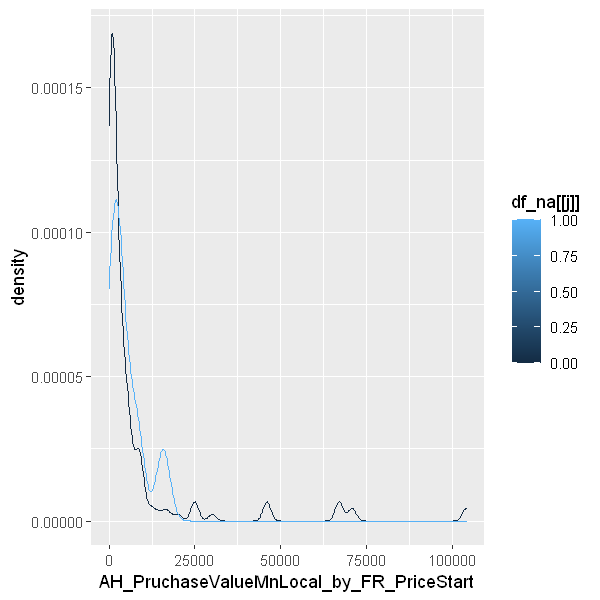

[1] "AH_PruchaseValueMnLocal by NA FR_PriceEnd"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.57443, df = 9.7451, p-value = 0.5787
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11398.19  19279.02
sample estimates:
mean of x mean of y 
11401.300  7460.884 



Warning message:
"Use of `df.na[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 2019 rows containing non-finite values (stat_density)."


[1] "AH_PruchaseValueMnLocal by NA CampByIND"


ERROR: Error in t.test.default(b1[[i]], b2[[i]]): not enough 'x' observations


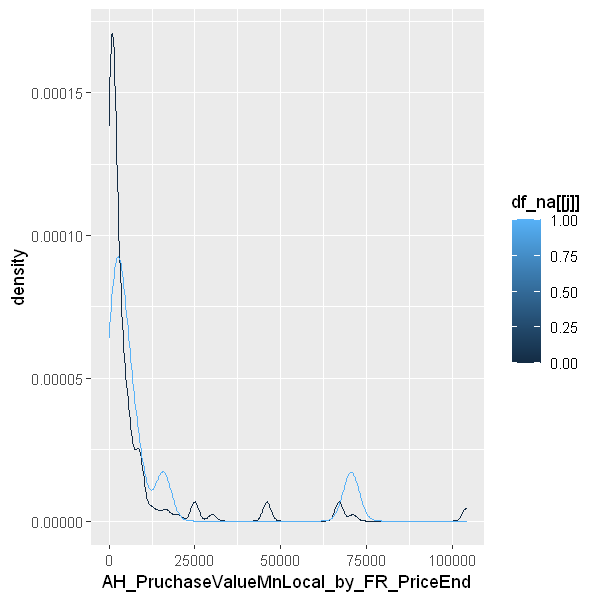

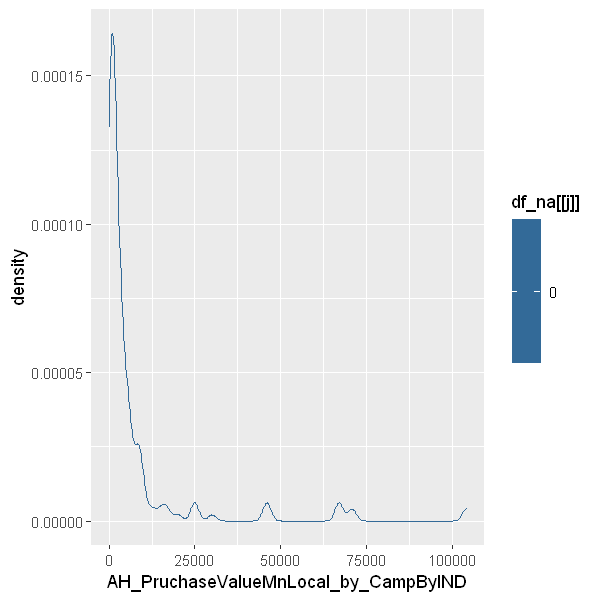

In [894]:
options(repr.plot.width = 5, repr.plot.height = 5)
for (i in (missing$missingness$var)) {
    for (j in (missing$missingness$var)) {
       if(i!=j ){
           print(ggplot(df.na,aes(x=df.na[[i]],
                                     group=df_na[[j]],
                                     color=df_na[[j]]))+
                 geom_density()+
                 labs(x=paste(i,'_by_',j,sep='')))     
           b1 <- df.na %>% select (i,j) %>% filter(df_na[j]==1)
           b2 <- df.na %>% select (i,j) %>% filter(df_na[j]==0)
           print(paste(i,' by NA ', j,sep=''))
           print(t.test(b1[[i]],b2[[i]]))
           
       } 
    }
}



By the distribution above and the t-test I assume that the missing mechanism is MNAR

In [1]:
for (i in (missing$missingness$var)){
    df.na[[i]] <- ifelse(is.na(df.na[[i]]),'miss',df.na[[i]])
                                                             
}
getMissingness(df.na)

ERROR: Error: object of type 'special' is not subsettable


In [2]:
missing$missingness$var

ERROR: Error in missing$missingness: object of type 'special' is not subsettable


## Recheck for variables with less than 2 levels

In [192]:
l1 <- c()
for (v in names(df)){
    if (length(unique(df[[v]]))==1){
        l1<- c(l1,v)
    }
}
df <- df[ , !names(df) %in% l1]


In [853]:
exploreData(data=df.na, y='ExcessReturnByCamp',dir="report-r-cleansed", debug=FALSE,) 

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |=====                                                                 |   6%

The variable PID_COUNT has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |=====                                                                 |   8%

The variable Currency has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

ERROR: Error in hist.default(x, breaks = breakstar): invalid number of 'breaks'


## Re-Check for Outliers

In [895]:
## Using IRQ for catching univariate outliers (1.5 x IRQ) 1==Outliers
head(outlierMatrix(df,threshold=1.5))

,Investor.ID,Founded_out,CurrentHolding_out,StatusCurrent_out,StatusExisted_out,PID_COUNT_out,AH_PricePerShareLocal_out,AH_PruchaseValueMnLocal_out,FR_PriceStart_out,FR_PriceEnd_out,...,DelayShareholderMeeting_out,CloseFund_out,ClosedAGM_out,ActivistIssuesPublicLetter_out,ActivistLetterToRegulatoryBodies_out,LitigationInitiated_out,ConsentSolicitationInitiated_out,SECFiling_out,SeatsProposed_out,SeatsGained_out
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,449,0,NA,0,0,0,NA,NA,0,0,...,0,0,0,0,0,0,0,0,NA,NA
2,449,0,NA,0,0,0,NA,NA,0,0,...,0,0,0,0,0,0,0,0,NA,NA
3,449,0,NA,0,0,0,NA,NA,0,0,...,0,0,0,0,0,0,0,0,NA,NA
4,449,0,NA,0,0,0,NA,NA,0,0,...,0,0,0,0,0,0,0,0,NA,NA
5,449,0,NA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NA,NA
6,449,0,0,1,1,0,NA,NA,0,0,...,0,0,0,0,0,0,0,0,0,0


Choosing only continuos features for outliers re-checing

In [855]:
vn <- names(df.na[,2:185])
Activism_continuous <- NULL
for(v in vn) {
        if((is.numeric(df.na[[v]])) & length(unique(df.na[[v]]))>3)
            {Activism_continuous <- c(Activism_continuous,v)}}

length (Activism_continuous)
Activism_continuous

[1] 21

[1] "Founded"                       "PID"                          
 [3] "AvgChangeOverPeriodOfInvByAct" "AvgReturnAnnualisedByAct"     
 [5] "AvgSPReturnAnnualisedByAct"    "NoOfCamp"                     
 [7] "PositiveReturnByCamp"          "NoOfCamp3Y"                   
 [9] "PositiveReturnByCamp3Y"        "HitRatioByIND3Y"              
[11] "AvgChangeOverPeriodOfInvByIND" "AvgReturnAnnualisedByIND"     
[13] "AvgSPReturnByIND"              "CampByMC"                     
[15] "PositiveReturnByMC"            "CampByMC3Y"                   
[17] "PositiveReturnByMC3Y"          "NoOfInvByMC"                  
[19] "AvgChangeOverPeriodOfInvByMC"  "AvgAnnualisedReturnByMC"      
[21] "AvgSPReturnByMC"

In [899]:

Activism_continuousV <- df.na %>% select (colnames = Activism_continuous)
colnames (Activism_continuousV)  <- Activism_continuous


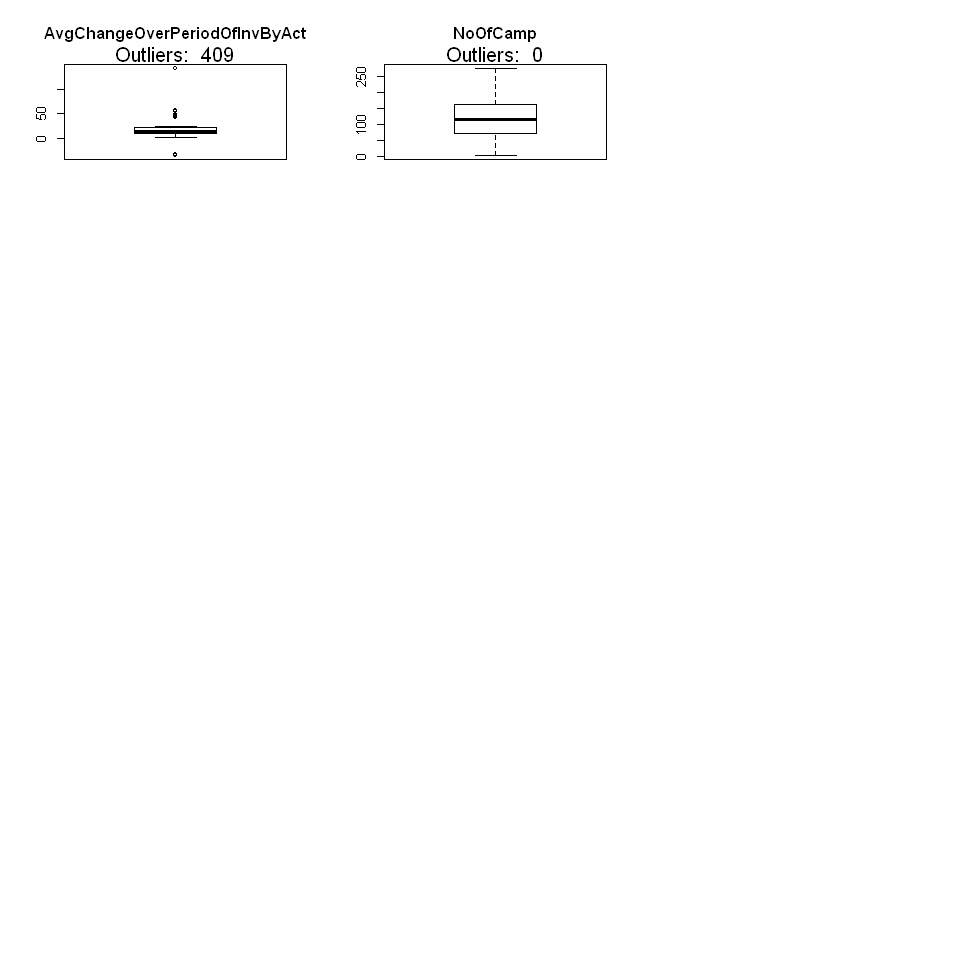

In [900]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(Activism_continuousV[,c(3,6)])) {
    outlier_values <- boxplot.stats(Activism_continuousV[,v])$out
    boxplot(df[[v]],main=v)
    mtext(paste("Outliers: ", paste(length(outlier_values), collapse=", ")), cex=1)
}
par(mfrow=c(1,1))

### Re-Checking for AvgChangeOverPeriodOfInvByAct Outliers

#### AvgChangeOverPeriodOfInvByAct outliers


-34.46 -31.62  41.84   45.7  47.02  48.81  54.27  54.68  57.79 141.94 
     1     20    114     51     27     21     78     18     50     29 

[1] 409

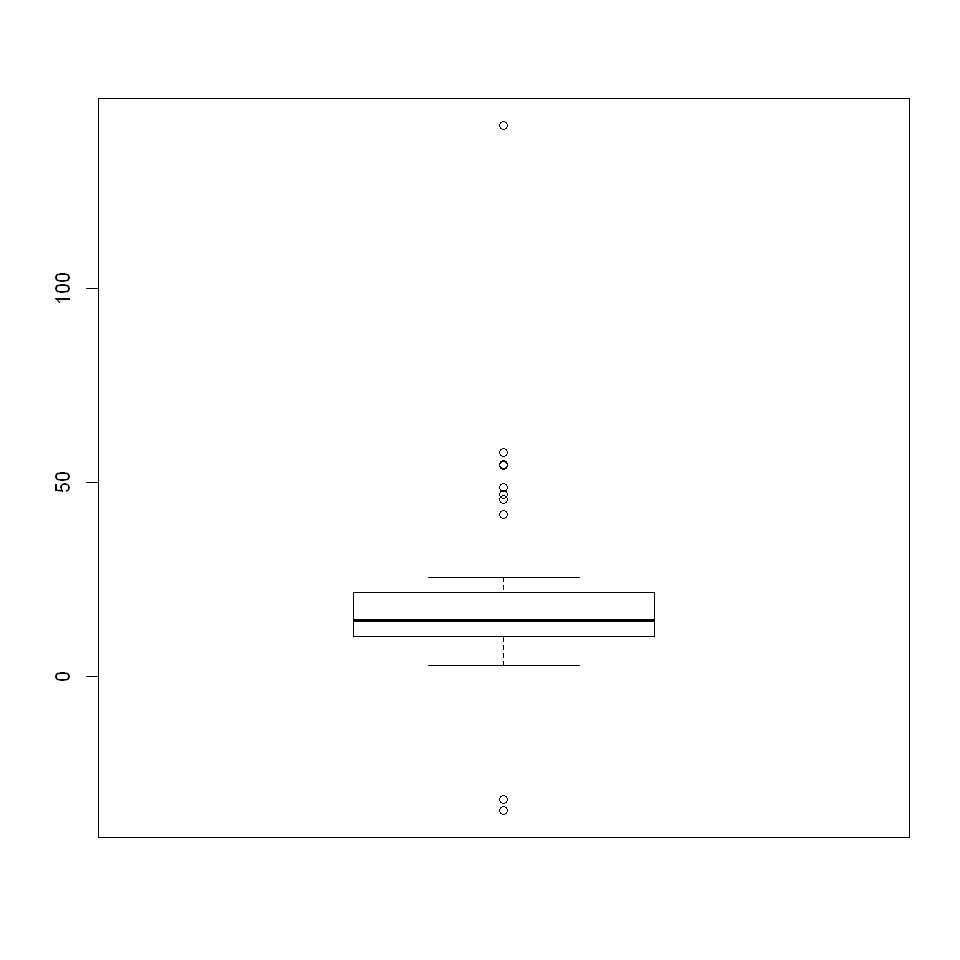

In [901]:
AvgChangeOverPeriodOfInvByAct_out2  <- boxplot(df.na$AvgChangeOverPeriodOfInvByAct)
table(AvgChangeOverPeriodOfInvByAct_out2$out)
length(AvgChangeOverPeriodOfInvByAct_out2$out)

In [858]:
AvgChangeOverPeriodOfInvByAct.out2 <- ifelse(df.na[["AvgChangeOverPeriodOfInvByAct"]] >=41.84 
                                            |df.na[["AvgChangeOverPeriodOfInvByAct"]] <=-31.62, 1, 0)
table(AvgChangeOverPeriodOfInvByAct.out2)

AvgChangeOverPeriodOfInvByAct.out2
   0    1 
1775  409 

In [902]:
AvgChangeOverPeriodOfInvByAct.noout2 <- df.na[["AvgChangeOverPeriodOfInvByAct"]]
AvgChangeOverPeriodOfInvByAct.noout2 <- ifelse(AvgChangeOverPeriodOfInvByAct.out2==1,NA,AvgChangeOverPeriodOfInvByAct.noout2)
head(AvgChangeOverPeriodOfInvByAct.noout2)

[1] NA NA NA NA NA NA

Warning message:
"Removed 409 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 409 rows containing non-finite values (stat_density)."


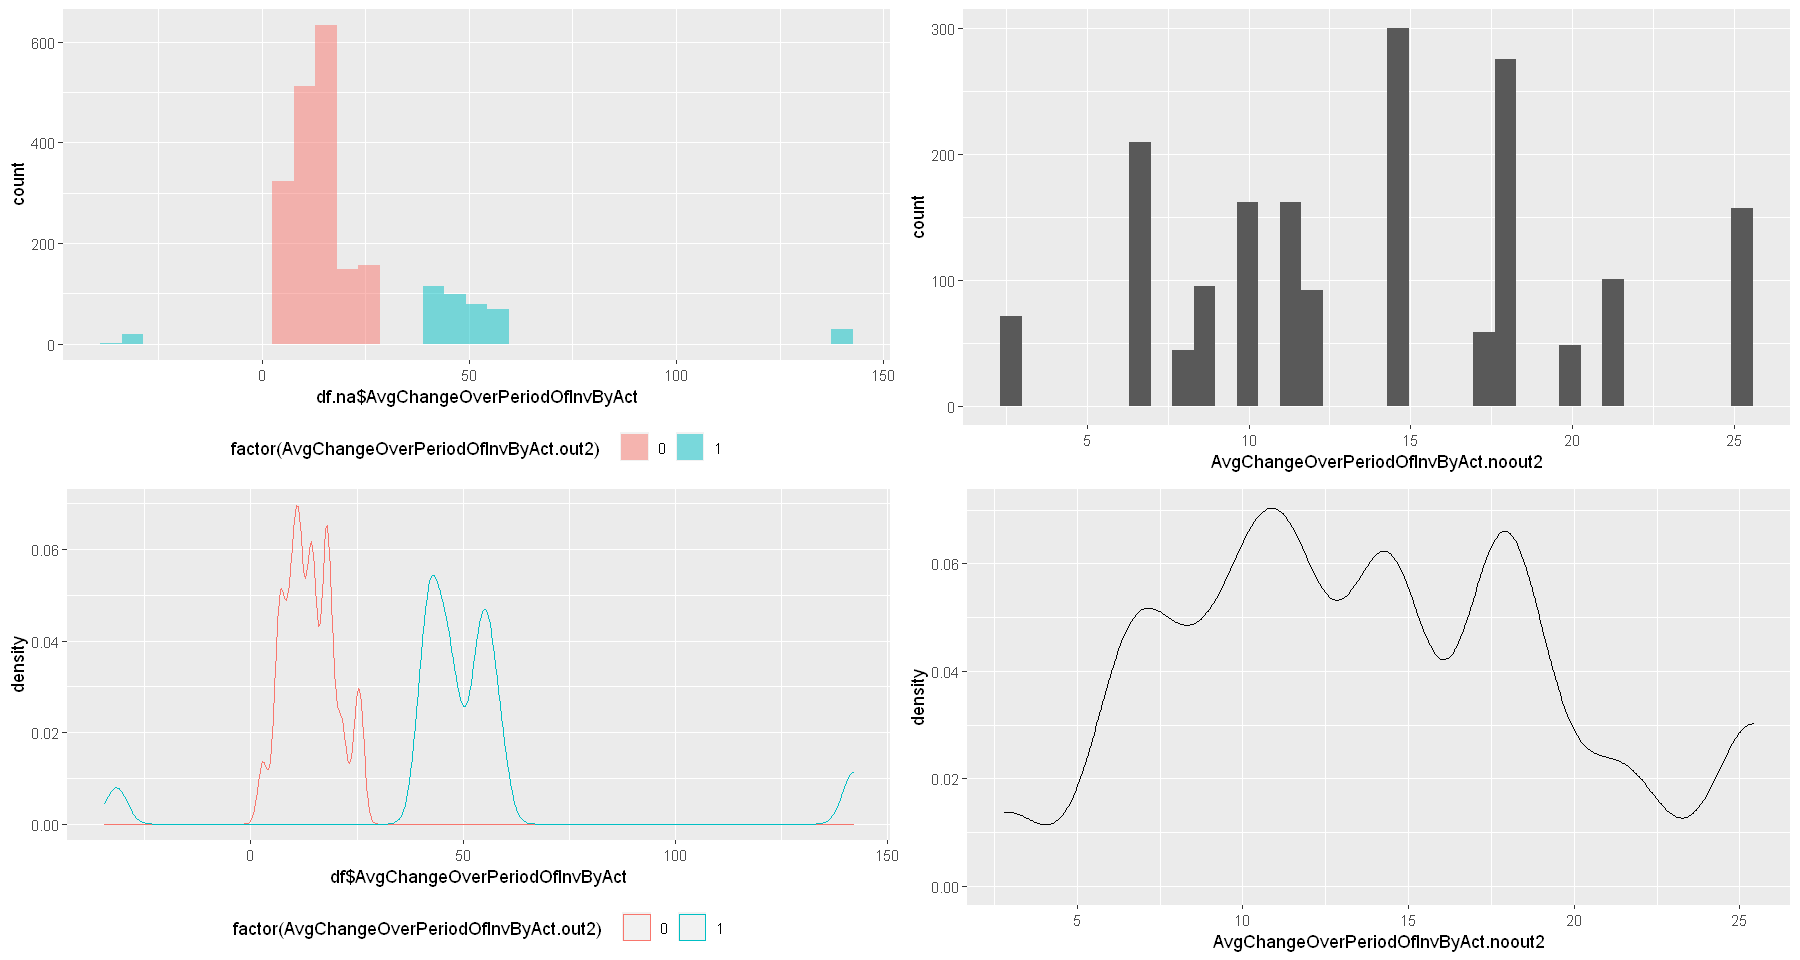

In [903]:
p1 <- ggplot() + geom_histogram(aes(x=df.na$AvgChangeOverPeriodOfInvByAct, fill=factor(AvgChangeOverPeriodOfInvByAct.out2)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=AvgChangeOverPeriodOfInvByAct.noout2),bins=35)
p3 <- ggplot (df.na,aes(x=df$AvgChangeOverPeriodOfInvByAct, group = factor(AvgChangeOverPeriodOfInvByAct.out2), color = factor(AvgChangeOverPeriodOfInvByAct.out2))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df.na,aes(x=AvgChangeOverPeriodOfInvByAct.noout2)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [904]:
t.test(AvgChangeOverPeriodOfInvByAct.out2,AvgChangeOverPeriodOfInvByAct.noout2)


	Welch Two Sample t-test

data:  AvgChangeOverPeriodOfInvByAct.out2 and AvgChangeOverPeriodOfInvByAct.noout2
t = -98.393, df = 1786.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14.02689 -13.47862
sample estimates:
 mean of x  mean of y 
 0.1872711 13.9400282 


In [905]:
cor.test(x=AvgChangeOverPeriodOfInvByAct.out2,y=df.na$ExcessReturnByCamp,method="spearman")$estimate
cor.test(x=AvgChangeOverPeriodOfInvByAct.out2,y=df.na$ExcessReturnByCamp,method="spearman")$p.value
cor.test(x=AvgChangeOverPeriodOfInvByAct.noout2,y=df.na$ExcessReturnByCamp,method="spearman")$estimate
cor.test(x=AvgChangeOverPeriodOfInvByAct.noout2,y=df.na$ExcessReturnByCamp,method="spearman")$p.value



Warning message in cor.test.default(x = AvgChangeOverPeriodOfInvByAct.out2, y = df.na$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"


rho 
-0.02289792

Warning message in cor.test.default(x = AvgChangeOverPeriodOfInvByAct.out2, y = df.na$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"


[1] 0.2934533

Warning message in cor.test.default(x = AvgChangeOverPeriodOfInvByAct.noout2, y = df.na$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"


rho 
0.08868013

Warning message in cor.test.default(x = AvgChangeOverPeriodOfInvByAct.noout2, y = df.na$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"


[1] 0.0002133034


-34.46 -31.62   2.81   6.55   6.68   7.75   8.65   8.81  10.16  10.19  11.29 
     1     20     71     96    113     44     24     71     24    138    162 
 11.95  12.11  14.39  14.49  17.21   17.3  17.97   19.7  21.59  25.41  41.84 
    22     70    253     47     34     25    275     48    101    157    114 
  45.7  47.02  48.81  54.27  54.68  57.79 141.94 
    51     27     21     78     18     50     29 

Warning message in log(df.na$AvgChangeOverPeriodOfInvByAct):
"NaNs produced"


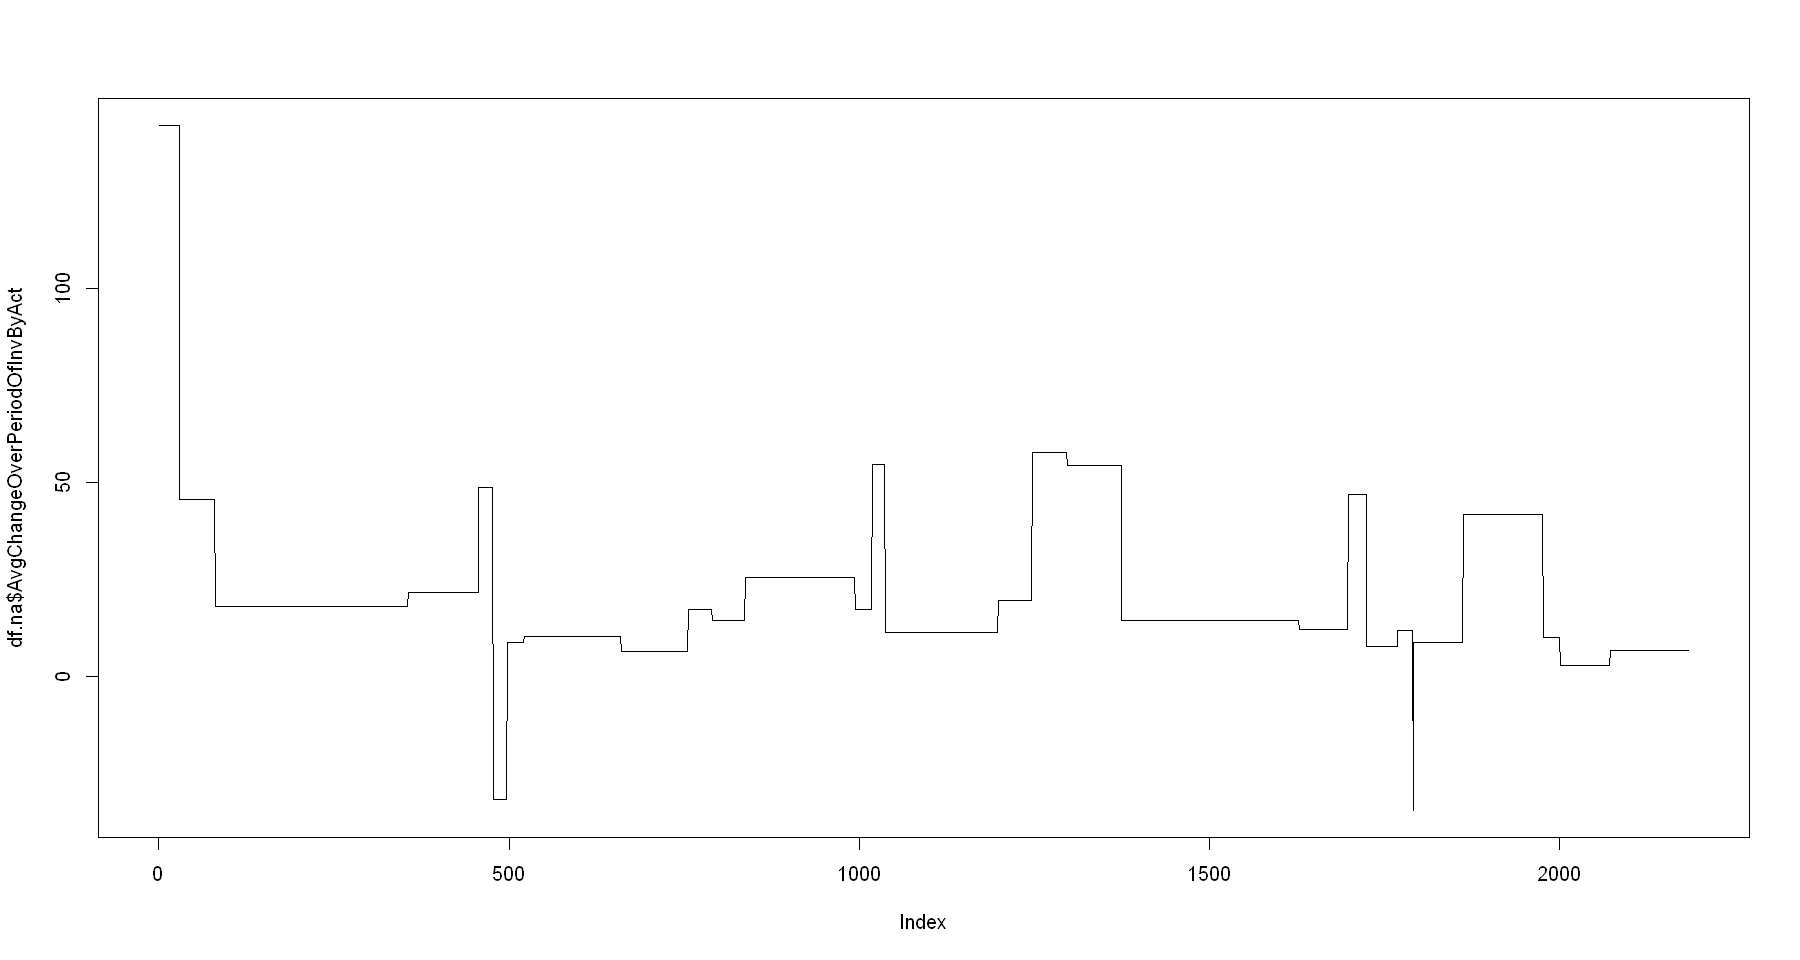

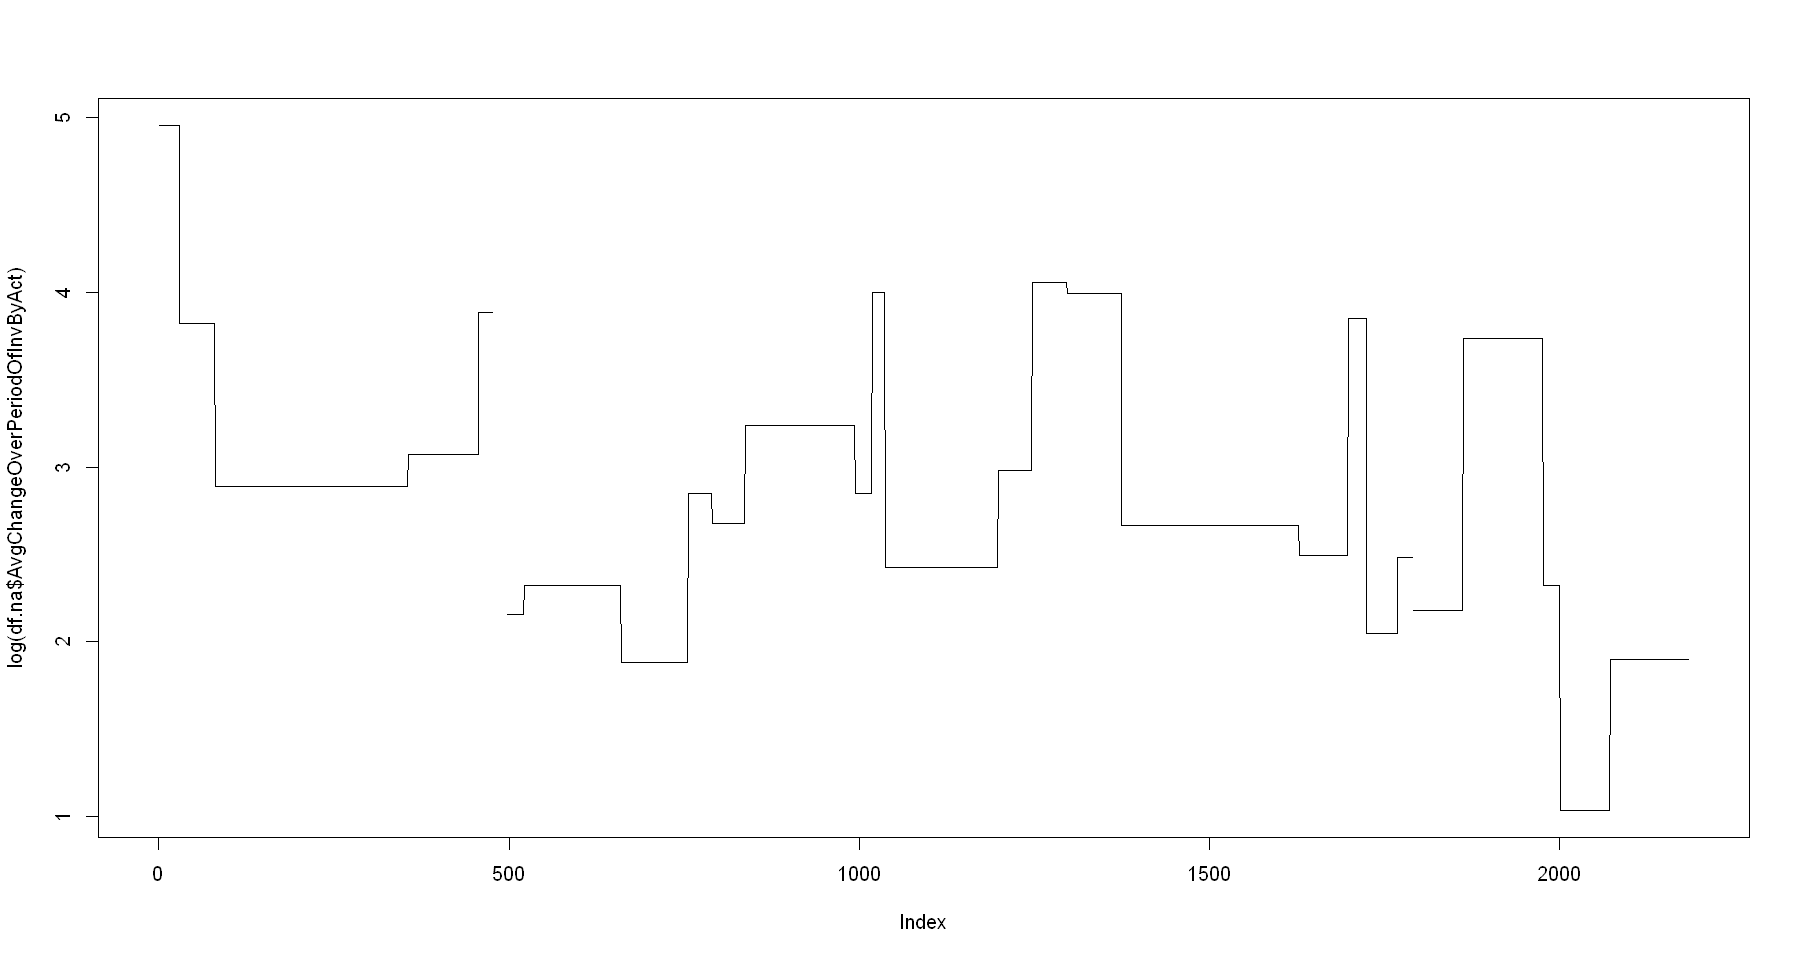

In [918]:
table(df.na$AvgChangeOverPeriodOfInvByAct)
plot(df.na$AvgChangeOverPeriodOfInvByAct,type ="l")
plot(log(df.na$AvgChangeOverPeriodOfInvByAct),type ="l")

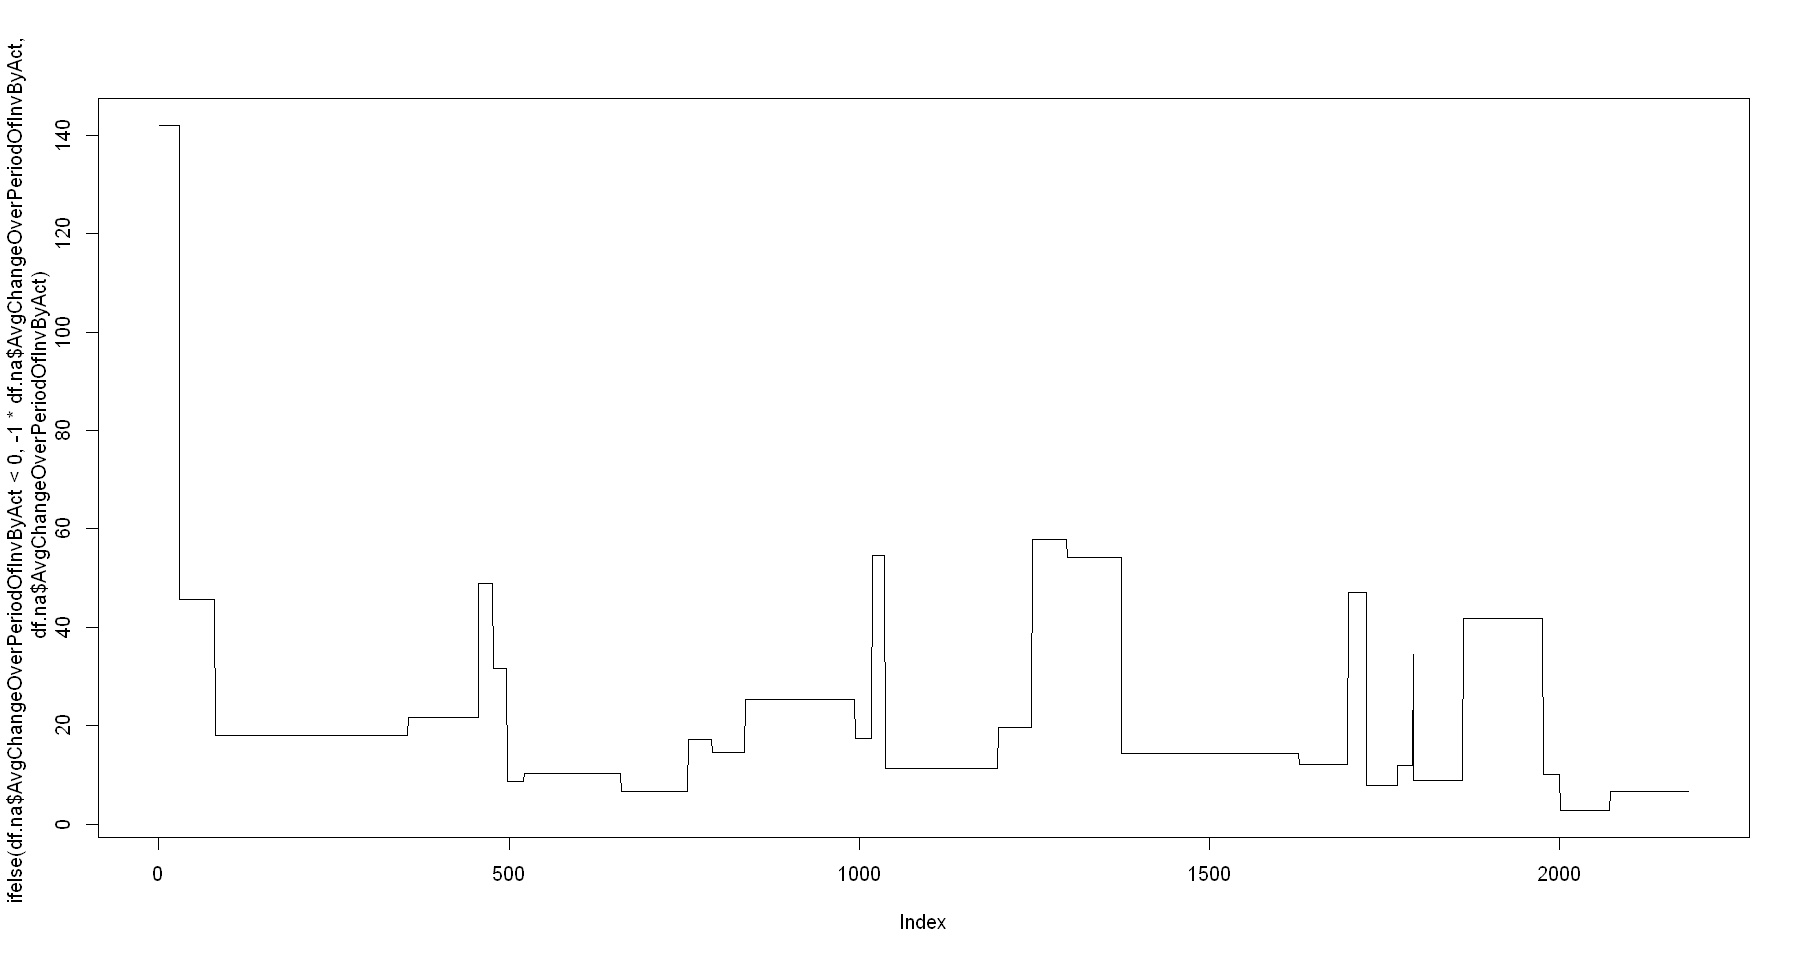

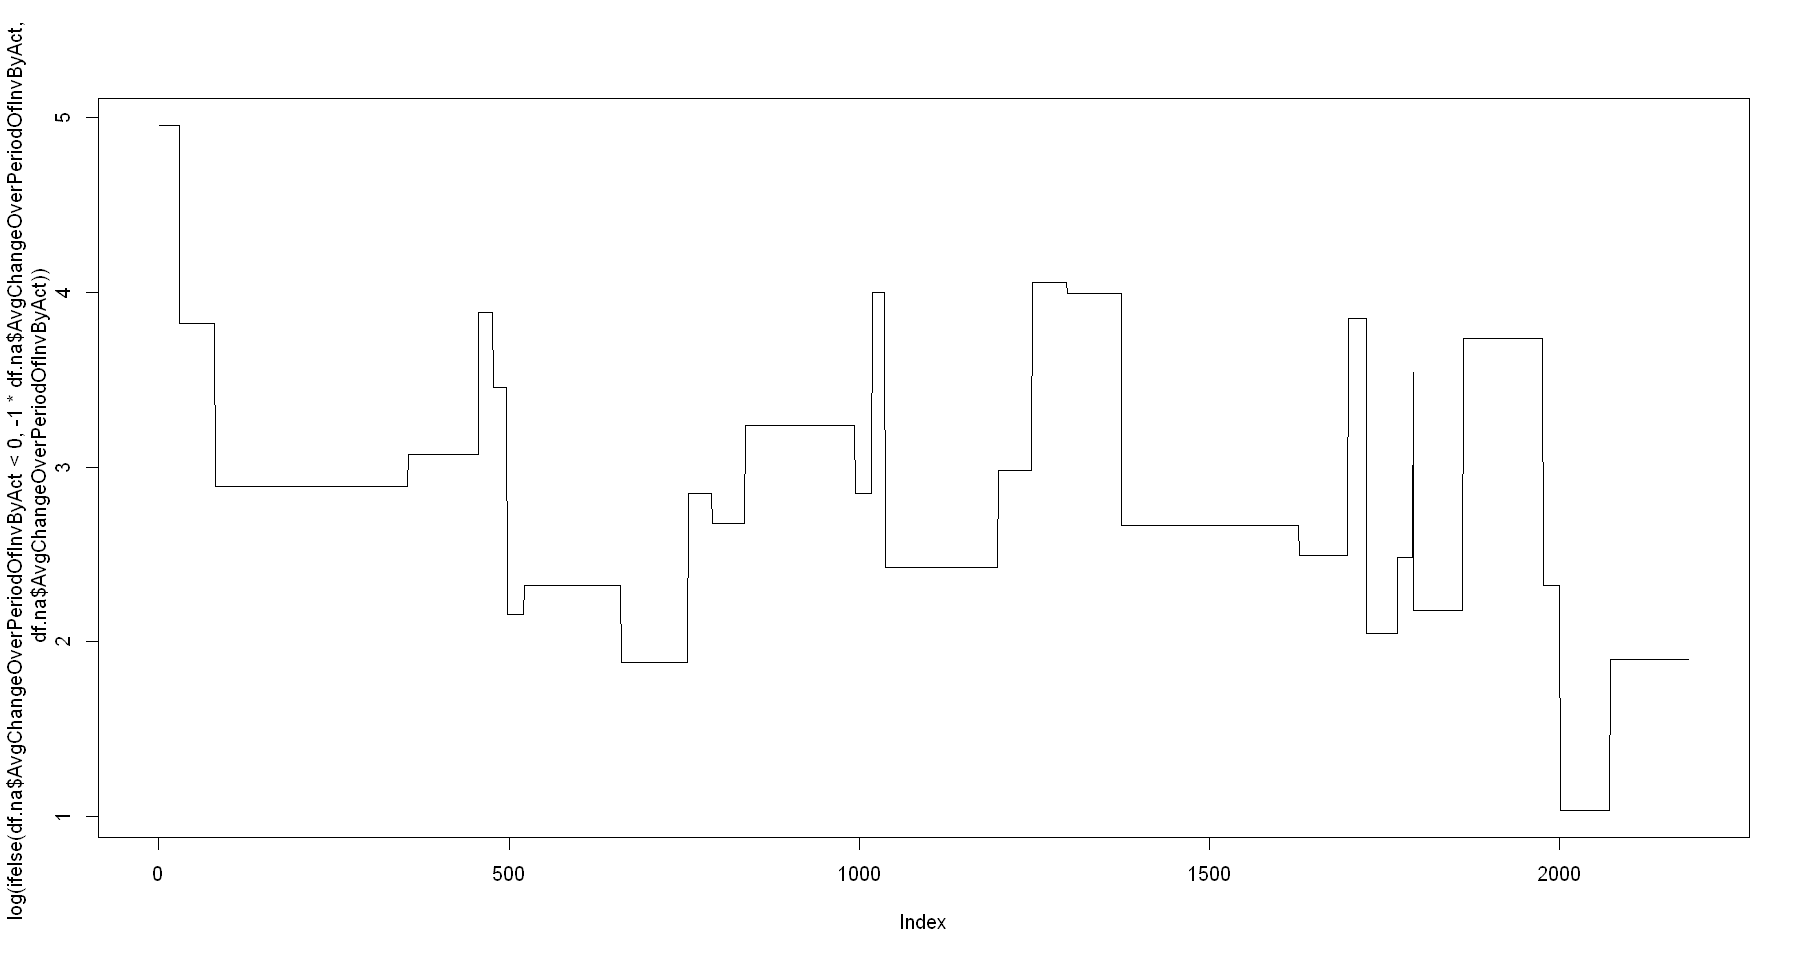

In [919]:
plot(ifelse (df.na$AvgChangeOverPeriodOfInvByAct<0,-1*df.na$AvgChangeOverPeriodOfInvByAct,df.na$AvgChangeOverPeriodOfInvByAct),type="l")
plot(log(ifelse (df.na$AvgChangeOverPeriodOfInvByAct<0,-1*df.na$AvgChangeOverPeriodOfInvByAct,df.na$AvgChangeOverPeriodOfInvByAct)),type="l")

In [929]:
df.na$AvgChangeOverPeriodOfInvByAct <- log(ifelse (df.na$AvgChangeOverPeriodOfInvByAct<0,-min(df.na$AvgChangeOverPeriodOfInvByAct),df.na$AvgChangeOverPeriodOfInvByAct))

In [930]:
df.na

Investor.ID,Activist,ActivistHQ,ActivistRegion,Founded,FirstDateInvestedByActivisit,CurrentHolding,StatusCurrent,StatusExisted,DateExited,...,SeatsGained,SeatsGainedMethod,Ongoing,WithdrewDemands,PartiallySuccessful,Successful,Unsuccessful,CompromiseOrSettlement,Unresolved,Buyer
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
449,Southeastern Asset Management,US,NorthAmerica,1975,2017-02-22,miss,0,1,2017,...,miss,miss,No,No,No,Yes,No,No,No,miss
449,Southeastern Asset Management,US,NorthAmerica,1975,2018-08-15,miss,0,1,2019,...,miss,miss,No,No,No,No,No,No,No,miss
449,Southeastern Asset Management,US,NorthAmerica,1975,2012-01-20,miss,0,1,2014,...,miss,miss,No,No,Yes,No,No,No,No,miss
449,Southeastern Asset Management,US,NorthAmerica,1975,2012-01-20,miss,0,1,2014,...,miss,miss,No,Yes,No,No,No,No,No,miss
449,Southeastern Asset Management,US,NorthAmerica,1975,2008-12-22,miss,0,1,2014,...,miss,miss,No,No,No,No,No,No,No,Martin Marietta Materials Inc
449,Southeastern Asset Management,US,NorthAmerica,1975,2017-11-15,0,1,0,miss,...,1,Settlement,Yes,No,No,Yes,No,No,No,miss
449,Southeastern Asset Management,US,NorthAmerica,1975,2004-12-27,miss,0,1,2011,...,miss,miss,No,No,No,No,No,No,No,miss
449,Southeastern Asset Management,US,NorthAmerica,1975,2010-12-09,1.985,1,0,miss,...,miss,miss,No,Yes,No,No,No,No,No,miss
449,Southeastern Asset Management,US,NorthAmerica,1975,2011-08-26,miss,1,0,miss,...,miss,miss,No,No,No,No,No,No,No,miss


In [933]:
write.csv(df.na,"C:\\Users\\user\\Documents\\Activism\\GlobalActivism-MainActivists.csv",row.names = FALSE )